# Comparing genes

In [1]:
suppressPackageStartupMessages(library(enrichR))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(clusterProfiler))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(org.Mm.eg.db))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(scrabbitr))
suppressPackageStartupMessages(library(edgeR))


source("../data-in/rabbit/load_rabbit.R")

set.seed(44)


Attaching package: ‘scater’


The following object is masked from ‘package:limma’:

    plotMDS



Attaching package: ‘data.table’


The following object is masked from ‘package:SummarizedExperiment’:

    shift


The following object is masked from ‘package:GenomicRanges’:

    shift


The following object is masked from ‘package:IRanges’:

    shift


The following objects are masked from ‘package:S4Vectors’:

    first, second



Attaching package: ‘Matrix’


The following object is masked from ‘package:S4Vectors’:

    expand




## Load data

In [49]:
r_data <- loadRabbitData()
r_data

class: SingleCellExperiment 
dim: 30725 146133 
metadata(0):
assays(2): counts logcounts
rownames(30725): ENSOCUG00000014251 ENSOCUG00000005054 ...
  ENSG00000175602 ENSG00000172324
rowData names(1): V1
colnames(146133): cell_1 cell_2 ... cell_172994 cell_172995
colData names(14): cell barcode ... sizeFactor celltype
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [50]:
r_genes <- read.table("../data-in/rabbit/genes.tsv",sep="\t")
rowData(r_data) <- r_genes
rownames(r_data) <- r_genes$gene_name

In [51]:
m_data <- readRDS("../data-in/mouse/integrated_sce.rds")
m_data

class: SingleCellExperiment 
dim: 23972 430339 
metadata(0):
assays(2): counts logcounts
rownames(23972): ENSMUSG00000001138 ENSMUSG00000001143 ...
  ENSMUSG00000108929 ENSMUSG00000109022
rowData names(0):
colnames(430339): cell_1 cell_2 ... ext_cell_351871 ext_cell_351872
colData names(0):
reducedDimNames(0):
altExpNames(0):

In [7]:
m_genes <- read.table("../data-in/mouse/genes.tsv",sep="\t")
rownames(m_genes) <- m_genes$gene_name
rownames(m_data) <- m_genes$gene_name
head(m_genes)

ERROR: Error in rownames(m_data) <- m_genes$gene_name: object 'm_data' not found


In [ ]:
m_meta <- read.table("../data-in/mouse/meta.tsv",sep="\t")
m_data$celltype <- m_meta$celltype.clustering

In [10]:
rm_one2one <- read.table("../data-in/orthologs/mmusculus.tsv",sep="\t")

In [350]:
# Load macaque data
mf_data <- scrabbitr::loadYang2021("../data-in/datasets/Yang_2021/")
mf_data

class: SingleCellExperiment 
dim: 19367 7194 
metadata(0):
assays(2): counts logcounts
rownames(19367): ENSMFAG00000044637 ENSMFAG00000039056 ...
  ENSMFAG00000003950 ENSMFAG00000022236
rowData names(2): ensembl_id gene_name
colnames(7194): WT_d10_b2_AAACGAATCAGGGATG WT_d10_b2_AAAGAACTCCTGGTCT
  ... WT_d12_b2_TTTGGAGAGTCATGGG WT_d12_b2_TTTGGAGCATGGGATG
colData names(4): celltype stage batch sizeFactor
reducedDimNames(2): PCA UMAP
altExpNames(0):

In [357]:
head(colData(mf_data))

DataFrame with 6 rows and 4 columns
                              celltype    stage    batch sizeFactor
                              <factor> <factor> <factor>  <numeric>
WT_d10_b2_AAACGAATCAGGGATG trophoblast      d10       b2    1.64696
WT_d10_b2_AAAGAACTCCTGGTCT trophoblast      d10       b2    1.66143
WT_d10_b2_AAAGTCCGTCTTCAAG trophoblast      d10       b2    2.16138
WT_d10_b2_AAATGGAGTAGTATAG epiblast         d10       b2    1.74564
WT_d10_b2_AACAACCGTCTCAAGT trophoblast      d10       b2    3.15585
WT_d10_b2_AACAAGAAGGAAAGAC endoderm         d10       b2    3.90776

In [356]:
saveRDS(mf_data, "../data-out/compare_genes/mf_data.rds")

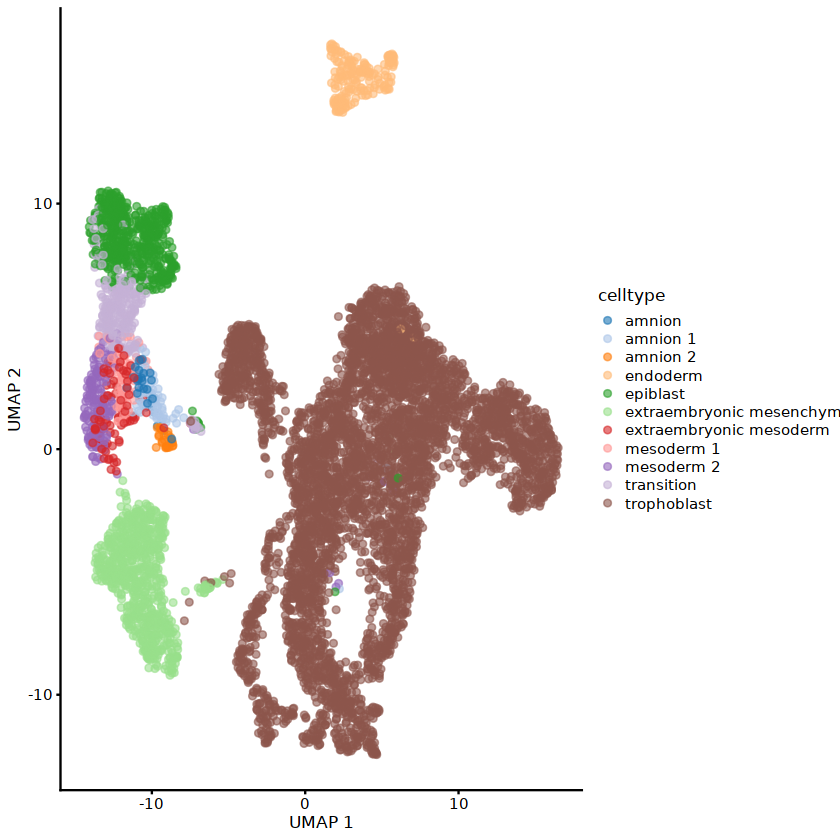

In [355]:
plotUMAP(mf_data,colour_by="celltype")

In [27]:
rh_one2one <- read.table("../data-in/orthologs/hsapiens.tsv",sep="\t",,header=TRUE)
head(rh_one2one)

ref                query 
1 ENSOCUG00000000006 INPP1 
2 ENSOCUG00000000007 GLIPR2
3 ENSOCUG00000000008 CCIN  
4 ENSOCUG00000000009 CLTA  
5 ENSOCUG00000000010 GNE   
6 ENSOCUG00000000012 HADHB

In [47]:
ctype_shared = c('Allantois',
 'Allantois endothelium',
 'Anterior cardiopharyngeal progenitors',
 'Anterior somitic tissues',
 'Cardiomyocytes FHF 1',
 'Cardiomyocytes FHF 2',
 'Cardiopharyngeal progenitors',
 'Caudal mesoderm',
 'Cranial mesoderm',
 'Dermomyotome',
 'EMP',
 #'EPDC',
 'Embryo proper endothelium',
 'Endocardium',
 'Epiblast',
 'Epicardium',
 'Erythroid',
 'Gut tube',
 'Lateral plate mesoderm',
 'Limb mesoderm',
 'MEP',
 'Megakariocytes',
 'Mesenchyme',
 'Mesothelium',
 #'Midgut',
 'Migratory neural crest',
 'NMPs',
 'NMPs/Mesoderm-biased',
 'Nephron progenitors',
 #'Neural tube',
 'Node',
 'Non-neural ectoderm 1',
 'Non-neural ectoderm 2',
 'Non-neural ectoderm 3',
 'Non-neural ectoderm 4',
 'Notochord',
 'Otic placode',
 'PGC',
 'Parietal endoderm',
 'Pharyngeal endoderm',
 'Posterior somitic tissues',
 'Presomitic mesoderm',
 'Primitive Streak',
 'Sclerotome',
 'Somitic mesoderm',
 'Thyroid primordium',
 'Venous endothelium',
 'Visceral endoderm',
 'YS endothelium')

In [54]:
ctype_shared <- intersect(unique(r_data$celltype), unique(m_data$celltype))
ctype_shared

[1] "Epiblast"                             
 [2] "Primitive Streak"                     
 [3] "Nascent mesoderm"                     
 [4] "Haematoendothelial progenitors"       
 [5] "Anterior Primitive Streak"            
 [6] "PGC"                                  
 [7] "Allantois endothelium"                
 [8] "Visceral endoderm"                    
 [9] "Cardiopharyngeal progenitors"         
[10] "Embryo proper endothelium"            
[11] "EMP"                                  
[12] "Placodal ectoderm"                    
[13] "Lateral plate mesoderm"               
[14] "Notochord"                            
[15] "NMPs"                                 
[16] "Non-neural ectoderm 4"                
[17] "Pharyngeal endoderm"                  
[18] "Dermomyotome"                         
[19] "MEP"                                  
[20] "Cranial mesoderm"                     
[21] "Caudal mesoderm"                      
[22] "Mesenchyme"                           
[23] "Anterior somitic tissues"             
[24] "Anterior cardiopharyngeal progenitors"
[25] "Cardiomyocytes FHF 1"                 
[26] "Venous endothelium"                   
[27] "Erythroid"                            
[28] "Mesothelium"                          
[29] "NMPs/Mesoderm-biased"                 
[30] "Cardiomyocytes FHF 2"                 
[31] "YS endothelium"                       
[32] "Sclerotome"                           
[33] "Presomitic mesoderm"                  
[34] "Allantois"                            
[35] "Endocardium"                          
[36] "Somitic mesoderm"                     
[37] "Epicardium"                           
[38] "Posterior somitic tissues"            
[39] "Gut tube"                             
[40] "Nephron progenitors"                  
[41] "Non-neural ectoderm 2"                
[42] "Limb mesoderm"                        
[43] "Thyroid primordium"                   
[44] "Migratory neural crest"               
[45] "Megakariocytes"                       
[46] "Mesothelium-endothelium/Masked"

## edgeR

In [2]:
sce <- readRDS("../data-out/compare_genes/r_downsample.rds")

In [32]:
c("All", unique(sce$celltype))

[1] "All"                                  
 [2] "Epiblast"                             
 [3] "Primitive Streak"                     
 [4] "Nascent mesoderm"                     
 [5] "Haematoendothelial progenitors"       
 [6] "Anterior Primitive Streak"            
 [7] "PGC"                                  
 [8] "Allantois endothelium"                
 [9] "Visceral endoderm"                    
[10] "Cardiopharyngeal progenitors"         
[11] "Embryo proper endothelium"            
[12] "EMP"                                  
[13] "Placodal ectoderm"                    
[14] "Lateral plate mesoderm"               
[15] "Notochord"                            
[16] "NMPs"                                 
[17] "Non-neural ectoderm 4"                
[18] "Pharyngeal endoderm"                  
[19] "Dermomyotome"                         
[20] "MEP"                                  
[21] "Cranial mesoderm"                     
[22] "Caudal mesoderm"                      
[23] "Mesenchyme"                           
[24] "Anterior somitic tissues"             
[25] "Anterior cardiopharyngeal progenitors"
[26] "Cardiomyocytes FHF 1"                 
[27] "Venous endothelium"                   
[28] "Erythroid"                            
[29] "Mesothelium"                          
[30] "NMPs/Mesoderm-biased"                 
[31] "Cardiomyocytes FHF 2"                 
[32] "YS endothelium"                       
[33] "Sclerotome"                           
[34] "Presomitic mesoderm"                  
[35] "Allantois"                            
[36] "Endocardium"                          
[37] "Somitic mesoderm"                     
[38] "Epicardium"                           
[39] "Posterior somitic tissues"            
[40] "Gut tube"                             
[41] "Nephron progenitors"                  
[42] "Non-neural ectoderm 2"                
[43] "Limb mesoderm"                        
[44] "Thyroid primordium"                   
[45] "Migratory neural crest"               
[46] "Megakariocytes"                       
[47] "Mesothelium-endothelium/Masked"

In [34]:
write.table(t(c("All", unique(sce$celltype))), "../data-in/compare_genes/rabbit_celltypes.csv", row.names=FALSE,col.names=FALSE, sep=",")

In [2]:
write.table(t(c(unique(m_sub$celltype))), "../data-in/compare_genes/mouse_celltypes.csv", row.names=FALSE,col.names=FALSE, sep=" ")

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [36]:
46^2

[1] 2116

In [23]:
sce.edgeR <- scrabbitr::prepareEdgeR(sce, "celltype", 
                                     "All", "Hypoblast", 
                                     "sample")

In [27]:
sce_sub <- sce
sce_sub$group <- as.character(colData(sce_sub)[[group_by]])
#sce_sub$group[sce_sub$group != group2] <- 'All'

In [28]:
unique(sce_sub$group)

[1] "Epiblast"                             
 [2] "Primitive Streak"                     
 [3] "Nascent mesoderm"                     
 [4] "Haematoendothelial progenitors"       
 [5] "Anterior Primitive Streak"            
 [6] "PGC"                                  
 [7] "Allantois endothelium"                
 [8] "Visceral endoderm"                    
 [9] "Cardiopharyngeal progenitors"         
[10] "Embryo proper endothelium"            
[11] "EMP"                                  
[12] "Placodal ectoderm"                    
[13] "Lateral plate mesoderm"               
[14] "Notochord"                            
[15] "NMPs"                                 
[16] "Non-neural ectoderm 4"                
[17] "Pharyngeal endoderm"                  
[18] "Dermomyotome"                         
[19] "MEP"                                  
[20] "Cranial mesoderm"                     
[21] "Caudal mesoderm"                      
[22] "Mesenchyme"                           
[23] "Anterior somitic tissues"             
[24] "Anterior cardiopharyngeal progenitors"
[25] "Cardiomyocytes FHF 1"                 
[26] "Venous endothelium"                   
[27] "Erythroid"                            
[28] "Mesothelium"                          
[29] "NMPs/Mesoderm-biased"                 
[30] "Cardiomyocytes FHF 2"                 
[31] "YS endothelium"                       
[32] "Sclerotome"                           
[33] "Presomitic mesoderm"                  
[34] "Allantois"                            
[35] "Endocardium"                          
[36] "Somitic mesoderm"                     
[37] "Epicardium"                           
[38] "Posterior somitic tissues"            
[39] "Gut tube"                             
[40] "Nephron progenitors"                  
[41] "Non-neural ectoderm 2"                
[42] "Limb mesoderm"                        
[43] "Thyroid primordium"                   
[44] "Migratory neural crest"               
[45] "Megakariocytes"                       
[46] "Mesothelium-endothelium/Masked"

In [15]:
min_detection_rate_per_group=0.1
min.logFC=2
threshold_fdr=0.1

# input should already have groups
  groups <- unique(sce.edgeR$group)
  
  # calculate detection rate per gene
  cdr.dt <- data.table(
    gene = rownames(sce.edgeR),
    detection_rate_A = DelayedArray::rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[1]])>0),
    detection_rate_B = DelayedArray::rowMeans(counts(sce.edgeR[,sce$group==groups[2]])>0)
  ) %>% data.table::setnames(c("ens_id",sprintf("detection_rate_%s",groups[1]),sprintf("detection_rate_%s",groups[2])))


In [16]:
# Filter genes by min detection rate per group
  cdr_A <- DelayedArray::rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[1]])>0) >= min_detection_rate_per_group
  #cdr_B <- DelayedArray::rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[2]])>0) >= min_detection_rate_per_group
  #sce.edgeR <- sce.edgeR[cdr_B | cdr_A,]

In [24]:
unique(sce.edgeR$group)

[1] All
Levels: All

In [20]:
sce.edgeR$group==groups[2]

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [12

In [19]:
sce.edgeR[,sce.edgeR$group==groups[2]]


ERROR: Error: logical subscript contains NAs


In [9]:
sce.edgeR <- scrabbitr::prepareEdgeR(sce, "celltype",
                                     "All", "Hypoblast",
                                     "sample")

In [ ]:
compareMarkers <- function(r_markers, m_markers) {
    
    # Filter based on FDR, logFC
    # Identify one-to-one orthologs
    # 
    
    
    
}

In [3]:
# Load rabbit markers
r_epiMarks <- readRDS("../data-out/compare_genes/edgeR_results/rabbit/Epiblast_vs_All.rds")
r_epiMarks$logFC <- -r_epiMarks$logFC
r_epiMarks[order(r_epiMarks$logFC,decreasing=TRUE),][1:10,]

DataFrame with 10 rows and 7 columns
                           ensembl_id          gene_name     logFC    logCPM
                          <character>        <character> <numeric> <numeric>
NRN1L              ENSOCUG00000006342              NRN1L   2.82166   7.37966
DNMT3B             ENSOCUG00000017835             DNMT3B   2.60148   7.57572
ENSOCUG00000029235 ENSOCUG00000029235 ENSOCUG00000029235   2.57824   8.49580
ENSOCUG00000013783 ENSOCUG00000013783 ENSOCUG00000013783   2.24202   7.41914
OTX2               ENSOCUG00000002633               OTX2   2.14043   7.40226
HESX1              ENSOCUG00000005972              HESX1   2.12982   7.40467
ENSG00000187140       ENSG00000187140    ENSG00000187140   1.89623   7.36732
RETREG1            ENSOCUG00000017516            RETREG1   1.88703   7.54399
FGFR4              ENSOCUG00000003380              FGFR4   1.84678   7.35596
TNFAIP6            ENSOCUG00000013688            TNFAIP6   1.81817   7.38892
                           F    PValue 

In [4]:
# Load mouse markers
m_epiMarks <- readRDS("../data-out/compare_genes/edgeR_results/mouse/Epiblast_vs_All.rds")
m_epiMarks$logFC <- -m_epiMarks$logFC
m_epiMarks[order(m_epiMarks$logFC,decreasing=TRUE),][1:10,]

logFC    logCPM   F         PValue FDR
Utf1   4.819012 7.542572 109693.11 0      0  
Slc7a3 4.203636 7.319346  73224.51 0      0  
Pou3f1 3.921021 7.270984  55171.55 0      0  
Pim2   3.540365 7.397410  41936.78 0      0  
Dnmt3b 3.282172 7.978897  28684.65 0      0  
Pou5f1 2.771774 7.853911  21958.44 0      0  
Gng3   2.679892 7.276841  16033.38 0      0  
Dppa5a 2.520821 7.256472  17684.67 0      0  
L1td1  2.491629 7.204778  20623.50 0      0  
Fgf5   2.314140 7.276466  13734.64 0      0

In [5]:
# Filter only positive DEGs
r_epiMarks <- r_epiMarks[r_epiMarks$logFC > 0,]
m_epiMarks <- m_epiMarks[m_epiMarks$logFC > 0,]

In [8]:
# Temp - add ensembl codes to mouse results
m_epiMarks$mgene <- rownames(m_epiMarks)
m_epiMarks$ensembl_id <- m_genes[rownames(m_epiMarks),"ensembl_id"]

In [11]:
# Identify one-to-one orthologs
r_epiMarksO2O <- r_epiMarks[r_epiMarks$ensembl_id %in% rm_one2one$ref,]
m_epiMarksO2O <- m_epiMarks[m_epiMarks$ensembl_id %in% rm_one2one$query,]

In [12]:
# Combine markers
rownames(r_epiMarksO2O) <- rm_one2one[r_epiMarksO2O$ensembl_id,"query"]
rownames(m_epiMarksO2O) <- m_epiMarksO2O$ensembl_id
shared_epiMarks <- merge(r_epiMarksO2O,m_epiMarksO2O,by=0,all=F)

In [14]:
# Remove DEGs with low logFC
logFC_thresh <- 0.1
shared_epiMarks <- shared_epiMarks[shared_epiMarks$logFC.x > logFC_thresh | shared_epiMarks$logFC.y > logFC_thresh,]

In [15]:
# Assign genes to be unique or shared across species
shared_epiMarks$class <- ""

shared_epiMarks$class[(shared_epiMarks$FDR.x < 0.01) & (shared_epiMarks$logFC.x > logFC_thresh)] <- "rabbit_unique"
shared_epiMarks$class[(shared_epiMarks$FDR.y < 0.01) & (shared_epiMarks$logFC.y > logFC_thresh)] <- "mouse_unique"

shared_epiMarks$class[(shared_epiMarks$FDR.x < 0.01) & (shared_epiMarks$FDR.y < 0.01) &
                  sign(shared_epiMarks$logFC.x)==sign(shared_epiMarks$logFC.y) &
               (abs(shared_epiMarks$logFC.x) > logFC_thresh) & 
                (abs(shared_epiMarks$logFC.y) > logFC_thresh)] <- "shared"

shared_epiMarks <- shared_epiMarks[(shared_epiMarks$FDR.x < 0.01) | (shared_epiMarks$FDR.y < 0.01),]
shared_epiMarks$class <- as.factor(shared_epiMarks$class)

In [16]:
head(shared_epiMarks[order(shared_epiMarks$logFC.x,decreasing=TRUE),])

DataFrame with 6 rows and 16 columns
           Row.names       ensembl_id.x          gene_name   logFC.x  logCPM.x
         <character>        <character>        <character> <numeric> <numeric>
1 ENSMUSG00000031765 ENSOCUG00000029235 ENSOCUG00000029235   2.57824   8.49580
2 ENSMUSG00000021848 ENSOCUG00000002633               OTX2   2.14043   7.40226
3 ENSMUSG00000022270 ENSOCUG00000017516            RETREG1   1.88703   7.54399
4 ENSMUSG00000031762 ENSOCUG00000021126 ENSOCUG00000021126   1.76630   7.41260
5 ENSMUSG00000055799 ENSOCUG00000008749             TCF7L1   1.74002   7.70328
6 ENSMUSG00000071658 ENSOCUG00000009468               GNG3   1.72506   7.50256
        F.x  PValue.x     FDR.x   logFC.y  logCPM.y        F.y     PValue.y
  <numeric> <numeric> <numeric> <numeric> <numeric>  <numeric>    <numeric>
1   8215.48         0         0  1.032030   7.84145   665.2630 3.69985e-146
2  10364.58         0         0  2.049369   7.28684  6586.6777  0.00000e+00
3   6374.35         0      

In [209]:
freqs <- table(shared_epiMarks$class)

In [344]:
df <- data.frame(from=c("Rabbit", "Rabbit", "Mouse"), to = c("Mouse", "Rabbit", "Mouse"), value = c(freqs["shared"], freqs["rabbit_unique"], freqs["mouse_unique"]))

In [104]:
suppressPackageStartupMessages(library(circlize))
#df <- data.frame(from=c("Rabbit","Rabbit","Mouse"), to=c("Mouse","Macaque", "Macaque"), value=c(100,30,20))
df <- data.frame(from=c("Rabbit","Rabbit","Mouse","Rabbit","Mouse","Macaque"), to=c("Mouse","Macaque", "Macaque","Rabbit","Mouse","Macaque"), value=c(10,5,2,10,15,10))

df$col <- ""
df$col[df[,1] == "Rabbit"] <- "#0000FF"
df$col[df[,1] == "Mouse"] <- "#FF0000"
df$col[df[,1] == "Macaque"] <- "#00FF00"

df$alpha <- "10"
df$alpha[df[,2] == "Macaque"] <- "80"
df$alpha[df[,1] == df[,2]] <- "10"

grid.col = c("Rabbit"="#0000FF", "Mouse"= "#FF0000", "Macaque"="#00FF00")

circos.clear()
circos.par(gap.after = 15)

pdf("../plots/compare_genes/test_chord.pdf")
chordDiagram(df, big.gap=30, grid.col = grid.col, col = paste0(df$col, df$alpha))
dev.off()

png 
  2

In [24]:
sample(1:nrow(shared_epiMarks))

[1]  499  929   62  636  768    9  511  938 1096 1069  917  774  974  247
  [15]  829  782 1173  631  674   71  293  439  360 1025 1158  785  574  498
  [29]  243  645  672  781  258    2  859 1020 1102  206  872 1176 1125  807
  [43]  330  809 1197  956  825 1135  803  884  148  315  712  706  647  303
  [57]  327  927  760 1021  277  841  306  926  138 1183 1006  963  236  801
  [71]  487  117  537   67  400 1196  677  380  813  347  555  331 1152  478
  [85]  441  529  115  817  762  170   50   42  294  786  370   74  179  999
  [99] 1023  364  255  231   41  241    1  128   49  406  533 1169   93  983
 [113]  181 1067  368 1089  448   31  897  765  431   29  424  477 1193  139
 [127]  156  868  951  256  715 1157 1142  918  398  505 1030  681   76  943
 [141]  640 1079  223 1055  967   82   55  491 1121  161 1035  214  758  994
 [155]  633  777  653  646  232  826  931  502 1120 1016   56 1065  429  597
 [169]  675 1180  649  309  524  152  221  308  340  157  989  171  456  480
 [183]  693  885  159  471  472  527  362  285  627  662  514  375  893  698
 [197]  131  174   59  392 1007  305  379  991 1070  496  796  359  109 1014
 [211] 1113  183  504  942   34  390  228  545  510  969 1052  233  387   36
 [225] 1008  733  882 1082  977  981 1019  961  742  729  175  352  997  508
 [239]  739  382  573  932  851 1047  854  376  166  402 1078  946  414  357
 [253]  913 1042 1134  668 1029  905  147 1171  433   18  242  145  323  191
 [267]  146 1191  728  522 1013  666  108  136 1147  716  691 1057 1015 1003
 [281]  846  473  610  923   17  612  952 1107  709   68 1127  342  836  189
 [295]   79 1091   63  193   46  484  420 1031 1105  453  812  326  740  638
 [309]  582  160 1073 1184   38  642  630  476  389   19 1199  470  907  984
 [323] 1155  287  262   94  658  263   33 1167 1186  590  290  438  464  264
 [337] 1201   47 1048  657  492  292 1037  212  407 1056  394  386  483  605
 [351] 1124  129  204  644  187 1009  871 1182  405  348  561  199  269 1104
 [365]  322 1129   30  584 1185 1138  517   95  749  566  965  755  457 1098
 [379]   83  135  757    5  771 1123  769  714 1087 1044  563  953 1189  536
 [393]  779  412  954 1108 1005  669  865  314  396  925  891  604  366   48
 [407]  481  746  571   81  821 1163  460   24  132  153  230 1164 1077  355
 [421]  333  114  227  458  488  690  608  295  800 1128  550  353  861  103
 [435]   28  730  184 1137 1165   87  987   58 1050  844   72  908  892  838
 [449]  660  248  321  600   39  643  810   97  688   43  799  267  122  828
 [463] 1148  150  661  165  556  883  860   89  365  202  849  753  253  857
 [477]  856   13  718  270  163  335  992  530  580  570   60  344  120 1051
 [491]  827   64  717   80  701  958   37  634  705   84  224  949  544  873
 [505]  377  723  107  962   11  996  349 1040  679  215  795  226 1161  621
 [519]  744  901  955  764  275 1058  930  133  906  154  286  123 1038 1032
 [533]  469 1046  188  372  547  683  721  685  516  427 1053  451 1133  410
 [547]   61  238  968  125   20  875  759 1131  842  595  339 1076  354  449
 [561]  252  503 1092  445  495  468  724 1194  442  618  519   90 1000  591
 [575]  430  461  877  182  820  791  806  783  982 1095  700  567  614 1190
 [589]  466 1166 1072  792  316  603  876  928  886  572 1141  548  565  689
 [603]   78  848   70 1198  325  490  512  659 1119  418  100  240  708  641
 [617]  832   99  748  775  437  632  606  976  273  542  990  789  664   73
 [631]  200  588 1002  966  850  543  167   40  361  898  178  593   66 1084
 [645] 1143   26  676  626  112  778  780  162  531  219  711  581  425  337
 [659]  235  245  436  707   14 1150  452  639  745 1071  419  864  378 1059
 [673]  540 1060  912  391 1145  896  874  980  957  867 1026  249  144  845
 [687]  888  978 1117  301  417  399  116  811  272  562  670  935  320  808
 [701]  939 1039  403 1049  947   53 1085  805  251 1027 1081  118  794  462
 [715]  367  763  655  559   35  741  319  557  622 1174  950  743  105  575

In [103]:
options(repr.plot.width = 4, repr.plot.height = 3.5, repr.plot.res = 150)
suppressPackageStartupMessages(library(VennDiagram))

r_set <- shared_epiMarks[shared_epiMarks$class != "mouse_unique","Row.names"]
m_set <- shared_epiMarks[shared_epiMarks$class != "rabbit_unique","Row.names"]
mf_set <- c(paste0("gene_", 1:100), shared_epiMarks[sample(1:nrow(shared_epiMarks),100,replace=FALSE),"Row.names"])


p <- venn.diagram(
  x = list(r_set, m_set,mf_set),
  category.names = c("Rabbit" , "Mouse","Macaque"),
    filename=NULL,
    fill = c(alpha("#0000FF",0.3), alpha('#FF0000',0.3), alpha("#00FF00",0.3)),
    cat.default.pos = "outer",
    cat.pos = c(-45, 45,180),
    cat.dist = c(0.05, 0.05,0.05),
    sub="Epiblast",
    sub.cex=1.5,
    sub.pos = c(0.5,1.2),
    ddisable.logging = TRUE)

pdf("../plots/compare_genes/test_venn.pdf")
grid::grid.draw(p)
dev.off()


png 
  2

In [ ]:
?venn.diagram

In [121]:
r_ct <- r_data[,r_data$celltype %in% c("Allantois","")]

In [7]:
r_sum <- aggregateAcrossCells(r_data,id=colData(r_data)[,c("celltype","sample")])

In [9]:
head(colData(r_sum))

DataFrame with 6 rows and 17 columns
         cell     barcode    sample       stage     batch doub.density
  <character> <character> <integer> <character> <integer>    <numeric>
1          NA          NA         7         GD8         1           NA
2          NA          NA         8         GD8         1           NA
3          NA          NA         9         GD8         1           NA
4          NA          NA        10         GD8         1           NA
5          NA          NA        11         GD8         1           NA
6          NA          NA        14         GD9         1           NA
    doublet  stripped   cluster cluster.sub cluster.stage cluster.theiler
  <logical> <logical> <integer>   <numeric>     <numeric>       <logical>
1     FALSE     FALSE        NA          NA            NA              NA
2     FALSE     FALSE        NA          NA            NA              NA
3     FALSE     FALSE        NA          NA            NA              NA
4     FALSE     FALSE    

In [12]:
dge <- DGEList(counts(r_sum), samples=colData(r_sum),group=r_sum$celltype)

In [13]:
keep <- filterByExpr(dge)
deg <- dge[keep,]

In [14]:
dge <- calcNormFactors(dge)


In [15]:
design <- model.matrix(~ 0 + dge$samples$celltype + dge$samples$sample)

In [17]:
dge <- estimateDisp(dge, design = design)

In [ ]:
fit <- glmQLFit(dge, design = design, robust=TRUE)


In [199]:
qlf <- glmQLFTest(fit,coef=2)

In [ ]:
topTags(qlf,n=nrow(dge))$table

In [ ]:
dge <- calcNormFactors(dge)
design <- model.matrix(~L$condt)


In [92]:
r_sub

class: SingleCellExperiment 
dim: 30229 89040 
metadata(0):
assays(2): counts logcounts
rownames(30229): WDR31 RNF183 ... ENSG00000175602 ENSG00000172324
rowData names(2): ensembl_id gene_name
colnames(89040): cell_52186 cell_740 ... cell_108349 cell_127695
colData names(14): cell barcode ... sizeFactor celltype
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [11]:
min_detection_rate_per_group=0.1

In [8]:
sce.edgeR <- scrabbitr::prepareEdgeR(r_sub, "celltype",
                                     "Epiblast", "All",
                                     "sample")

In [16]:
sce.edgeR

class: SingleCellExperiment 
dim: 30229 89040 
metadata(0):
assays(2): counts logcounts
rownames(30229): WDR31 RNF183 ... ENSG00000175602 ENSG00000172324
rowData names(2): ensembl_id gene_name
colnames(89040): cell_52186 cell_740 ... cell_108349 cell_127695
colData names(15): cell barcode ... celltype group
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [13]:
# input should already have groups
  groups <- unique(sce.edgeR$group)

  # calculate detection rate per gene
  cdr.dt <- data.table(
    gene = rownames(sce.edgeR),
    detection_rate_A = rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[1]])>0),
    detection_rate_B = rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[2]])>0)
  ) %>% data.table::setnames(c("ens_id",sprintf("detection_rate_%s",groups[1]),sprintf("detection_rate_%s",groups[2])))


  # Filter genes by min detection rate per group
  cdr_A <- rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[1]])>0) >= min_detection_rate_per_group
  cdr_B <- rowMeans(counts(sce.edgeR[,sce.edgeR$group==groups[2]])>0) >= min_detection_rate_per_group
  sce <- sce.edgeR[cdr_B | cdr_A,]


In [17]:
head(cdr.dt)

ens_id  detection_rate_Epiblast detection_rate_All
1 WDR31   0.01539469              9.408399e-03      
2 RNF183  0.00000000              5.814832e-05      
3 PRPF4   0.66819522              4.538244e-01      
4 CDC26   0.94136915              7.804552e-01      
5 SLC31A1 0.20635441              9.556096e-02      
6 FKBP15  0.15230920              9.540977e-02

In [19]:
?data.table:

No documentation for ‘rowMeans’ in specified packages and libraries:
you could try ‘??rowMeans’

## Compute shared/unique marker genes

In [44]:
# Downsample so similar number of each cell type
r_ds <- vector()
m_ds <- vector()

for (celltype in c) {
    r_cells <- colnames(r_data[,r_data$celltype==celltype])
    r_ncells <- length(r_cells)
    
    m_cells <-  colnames(m_data[,m_data$celltype==celltype])
    m_ncells <- length(m_cells)
    
    m_sample <- sample(m_cells,min(r_ncells,m_ncells))
    m_ds <- c(m_ds, m_sample)
        
    r_sample <- sample(r_cells,min(r_ncells,m_ncells))
    r_ds <- c(r_ds, r_sample)
}

r_sub <- r_data[,r_ds]
m_sub <- m_data[,m_ds]

In [91]:
saveRDS(r_sub, "../data-out/compare_genes/r_downsample.rds")
saveRDS(m_sub, "../data-out/compare_genes/m_downsample.rds")

In [30]:
r_sub <- readRDS("../data-out/compare_genes/r_downsample.rds")
m_sub <- readRDS("../data-out/compare_genes/m_downsample.rds")

In [31]:
head(colData(m_sub))

DataFrame with 6 rows and 17 columns
               celltype        cell    sample       stage stage.mapped
            <character> <character> <integer> <character>  <character>
cell_43165     Epiblast  cell_43165        18        E6.5         E6.5
cell_41550     Epiblast  cell_41550        18        E6.5         E6.5
cell_108681    Epiblast cell_108681        31        E7.0         E7.0
cell_29920     Epiblast  cell_29920        15        E7.0         E7.0
cell_2432      Epiblast   cell_2432         5        E6.5         E6.5
cell_42920     Epiblast  cell_42920        18        E6.5         E6.5
            stage.collapsed stage.mapped.collapsed somite_count    tube_name
                <character>            <character>  <character>  <character>
cell_43165             E6.5                   E6.5 Undetermined Undetermined
cell_41550             E6.5                   E6.5 Undetermined Undetermined
cell_108681            E7.0                   E7.0 Undetermined Undetermined
cell_29920

In [ ]:
rownames(m_meta) <- m_meta$cell
colData(m_sub) <- m_meta[colnames(m_sub),]
m_sub$celltype <- m_sub$celltype.clustering


In [22]:
test <- m_meta[colnames(m_sub),]
colData(m_sub) <- cbind(colData(m_sub),test)

In [25]:
colData(m_sub) <- colData(m_sub)[,-11]

In [56]:
head(m_genes)

ensembl_id         gene_name
Cnnm3  ENSMUSG00000001138 Cnnm3    
Lman2l ENSMUSG00000001143 Lman2l   
Ddx18  ENSMUSG00000001674 Ddx18    
Rgs20  ENSMUSG00000002459 Rgs20    
Nab1   ENSMUSG00000002881 Nab1     
Tbc1d8 ENSMUSG00000003134 Tbc1d8

In [57]:
head(rownames(m_sub))

[1] "Cnnm3"  "Lman2l" "Ddx18"  "Rgs20"  "Nab1"   "Tbc1d8"

In [60]:
rowData(m_sub) <- m_genes[rownames(m_sub),]

In [27]:
m_sub

class: SingleCellExperiment 
dim: 22799 89040 
metadata(0):
assays(2): counts logcounts
rownames(22799): Cnnm3 Lman2l ... Cc2d2b Olfr1432
rowData names(0):
colnames(89040): cell_43165 cell_41550 ... ext_cell_81201 cell_40951
colData names(17): celltype cell ... cluster.sub celltype.clustering
reducedDimNames(0):
altExpNames(0):

In [63]:
saveRDS(m_sub, "../data-out/compare_genes/m_downsample.rds")

### Remove cell-cycle related genes

In [8]:
go_cellcycle <- c('GO:0007049', # cell cycle
                   'GO:0007059', # chromosome segregation
                   'GO:0006266', # DNA ligation
                   'GO:0000819', # sister chromatid segregation
                   'GO:0032508', # DNA duplex unwinding
                   'GO:1905462', # regulation of DNA duplex unwinding
                   'GO:0030261', # chromosome condensation
                   'GO:0010389', # regulation of G2/M transition of mitotic cell cycle
                   'GO:0072686', # mitotic spindle'
                   'GO:0006335', # DNA replication-dependent nucleosome assembly
                   'GO:0007052', # mitotic spindle organization
                   'GO:0000281', # mitotic cytokinesis
                   'GO:0000132', # establishment of mitotic spindle orientation
                   'GO:0000786', # nucleosome
                   'GO:0000278', # mitotic cell cycle
                   'GO:0007094', # mitotic spindle assembly checkpoint signaling
                   'GO:0045930', # negative regulation of mitotic cell cycle
                   'GO:0000086', # G2/M transition of mitotic cell cycle
                   'GO:0045740', # positive regulation of DNA replication
                   'GO:0051782', # negative regulation of cell division
                   'GO:0006270', # DNA replication initiation
                   'GO:0006261', # DNA-dependent DNA replication
                   'GO:0007051', # spindle organization
                   'GO:0007098', # centrosome cycle
                   'GO:0006260', # DNA replication
                   'GO:0071897', # DNA biosynthetic process
                   'GO:0006275', # regulation of DNA replication
                   'GO:0031297', # replication fork processing
                   'GO:0022402'#, # cell cycle process
                  )

r_mart <- useMart('ensembl', dataset='ocuniculus_gene_ensembl', host='www.ensembl.org')
m_mart <- useMart('ensembl', dataset='mmusculus_gene_ensembl', host='www.ensembl.org')

r_cellcycle <- getBM(
    attributes = c('ensembl_gene_id','external_gene_name'), 
    filters    = 'go', 
    values     = go_cellcycle,
    mart       = r_mart)

m_cellcycle <- getBM(
    attributes = c('ensembl_gene_id','external_gene_name'), 
    filters    = 'go', 
    values     = go_cellcycle,
    mart       = m_mart)

In [10]:
write.table(r_cellcycle,"../data-in/rabbit/cc_genes.tsv", sep="\t")
write.table(m_cellcycle,"../data-in/mouse/cc_genes.tsv", sep="\t")


In [15]:
r_mito <- getBM(
    attributes = c('ensembl_gene_id','external_gene_name'), 
    filters    = 'chromosome_name', 
    values     = "MT",
    mart       = r_mart)


m_mito <- getBM(
    attributes = c('ensembl_gene_id','external_gene_name'), 
    filters    = 'chromosome_name', 
    values     = "MT",
    mart       = m_mart)


In [18]:
write.table(r_mito,"../data-in/rabbit/mito_genes.tsv", sep="\t")
write.table(m_mito,"../data-in/mouse/mito_genes.tsv", sep="\t")


In [68]:
r_sub  <- r_sub[!(r_genes$ensembl_id %in% r_cellcycle$ensembl_gene_id) ,]
r_sub

class: SingleCellExperiment 
dim: 30229 89040 
metadata(0):
assays(2): counts logcounts
rownames(30229): WDR31 RNF183 ... ENSG00000175602 ENSG00000172324
rowData names(2): ensembl_id gene_name
colnames(89040): cell_52186 cell_740 ... cell_108349 cell_127695
colData names(14): cell barcode ... sizeFactor celltype
reducedDimNames(3): UMAP TSNE PCA
altExpNames(0):

In [70]:
m_sub  <- m_sub[!(m_genes$ensembl_id %in% m_cellcycle$ensembl_gene_id) ,]
m_sub

class: SingleCellExperiment 
dim: 22799 89040 
metadata(0):
assays(2): counts logcounts
rownames(22799): Cnnm3 Lman2l ... Cc2d2b Olfr1432
rowData names(0):
colnames(89040): cell_43165 cell_41550 ... ext_cell_81201 cell_40951
colData names(1): celltype
reducedDimNames(0):
altExpNames(0):

### Get rabbit shared cell type markers

In [71]:
# Get rabbit cell type markers
#rownames(r_sub) <- r_genes$gene_name #temp
r_markers <- scran::findMarkers(r_sub, groups=r_sub$celltype, pval.type="any",direction="up")
head(r_markers$`Epiblast`[,1:4],10)

DataFrame with 10 rows and 4 columns
                         Top   p.value       FDR summary.logFC
                   <integer> <numeric> <numeric>     <numeric>
EPCAM                      1         0         0       2.75570
POU5F1                     1         0         0       3.44946
FABP7                      1         0         0       3.17619
ENSOCUG00000013783         1         0         0       1.31840
DNMT3B                     1         0         0       2.24319
RETREG1                    1         0         0       1.39566
PKM                        1         0         0       2.78609
NRN1L                      1         0         0       1.01202
UPP1                       1         0         0       1.18149
CLDN6                      1         0         0       2.75665

In [72]:
# Export rabbit markers
saveRDS(r_markers,"../data-out/compare_genes/r_markers_up_any_nocc.rds")

In [20]:
# Load rabbit markers
r_markers <- readRDS("../data-out/compare_genes/r_markers_up_any_nocc.rds")

### Get mouse shared cell type markers

In [73]:
m_markers <- scran::findMarkers(m_sub, groups=m_sub$celltype, pval.type="any",direction="up")
head(m_markers$`Epiblast`[,1:4],10)

DataFrame with 10 rows and 4 columns
               Top   p.value       FDR summary.logFC
         <integer> <numeric> <numeric>     <numeric>
Dnmt3b           1         0         0       3.56653
Pim2             1         0         0       2.65397
Slc7a3           1         0         0       2.28562
Pgk1             1         0         0       3.88707
Marcksl1         1         0         0       3.72552
Utf1             1         0         0       3.72814
Tdgf1            1         0         0       1.58158
Pou5f1           1         0         0       3.70744
Ptma             2         0         0       2.28763
Pou3f1           2         0         0       1.78827

In [74]:
# Export mouse markers
saveRDS(m_markers,"../data-out/compare_genes/m_markers_up_any_nocc.rds")

In [21]:
# Load rabbit markers
m_markers <- readRDS("../data-out/compare_genes/m_markers_up_any_nocc.rds")

## Gene set enrichment


Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying KEGG_2021_Human... Done.
Parsing results... Done.


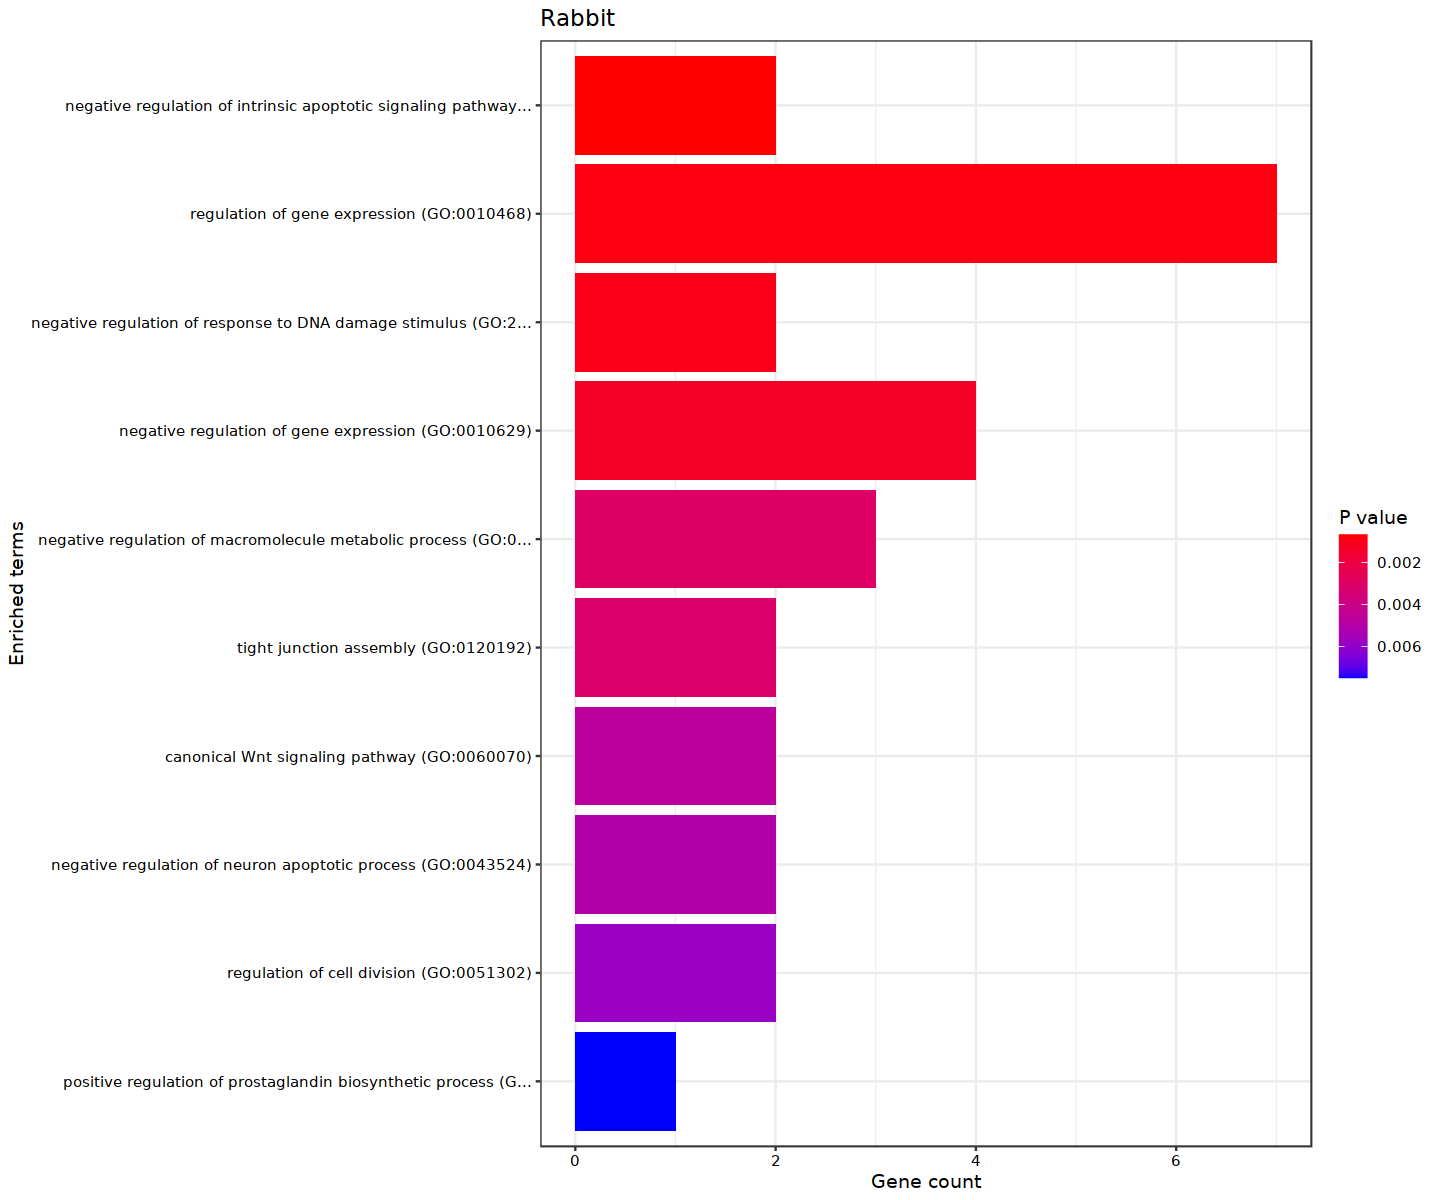

In [81]:
gene_lists = c("GO_Molecular_Function_2021","GO_Biological_Process_2021","MSigDB_Hallmark_2020","KEGG_2021_Human")

enriched <- enrichr(rownames(r_markers$`Epiblast`)[1:30], gene_lists)
plotEnrich(enriched[[2]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")

In [36]:
# Load precomputed markers
r_markers <- readRDS("../data-out/compare_genes/r_markers_up_some.rds")
m_markers <- readRDS("../data-out/compare_genes/m_markers_up_some.rds")

#r_markers <- readRDS("../data-out/compare_genes/r_markers.rds")
#m_markers <- readRDS("../data-out/compare_genes/m_markers.rds")

In [146]:
celltype <- "Erythroid" 
rct_markers <- r_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  mct_markers <- m_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  
  # Add gene name/ensembl id info
  rct_markers$rgene <- rownames(rct_markers)
  mct_markers$mgene <- rownames(mct_markers)
  
  rct_markers$rensembl <- r_genes[rownames(rct_markers),"ensembl_id"]
  mct_markers$mensembl <- m_genes[rownames(mct_markers),"ensembl_id"]
  
  # Subset one-to-one orthologs
  rct_markers <- rct_markers[rct_markers$rensembl %in% rm_one2one$ref,]
  mct_markers <- mct_markers[mct_markers$mensembl %in% rm_one2one$query,]

In [138]:
head(rm_one2one)

ref                query             
ENSOCUG00000000006 ENSOCUG00000000006 ENSMUSG00000026102
ENSOCUG00000000007 ENSOCUG00000000007 ENSMUSG00000028480
ENSOCUG00000000008 ENSOCUG00000000008 ENSMUSG00000070999
ENSOCUG00000000009 ENSOCUG00000000009 ENSMUSG00000028478
ENSOCUG00000000010 ENSOCUG00000000010 ENSMUSG00000028479
ENSOCUG00000000025 ENSOCUG00000000025 ENSMUSG00000032548

In [36]:
rct_markers <- r_markers[["Epiblast"]][,c("p.value","FDR","summary.logFC")]
rct_markers$rgene <- rownames(rct_markers)
rct_markers$rensembl <- r_genes[rownames(rct_markers),"ensembl_id"]

In [39]:
rct_markers <- rct_markers[rct_markers$rensembl %in% rm_one2one$ref,]

In [39]:
celltype <- "Epiblast"
rct_markers <- r_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
mct_markers <- m_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  
 # Add gene name/ensembl id info
rct_markers$rgene <- rownames(rct_markers)
mct_markers$mgene <- rownames(mct_markers)
  
rct_markers$rensembl <- r_genes[rownames(rct_markers),"ensembl_id"]
mct_markers$mensembl <- m_genes[rownames(mct_markers),"ensembl_id"]

In [41]:
rct_markers <- rct_markers[rct_markers$rensembl %in% rm_one2one$ref,]

In [55]:
rm_markers <- lapply(ctype_shared,function(celltype,logFC_thresh=0.2){

  rct_markers <- r_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  mct_markers <- m_markers[[celltype]][,c("p.value","FDR","summary.logFC")]
  
  # Add gene name/ensembl id info
  rct_markers$rgene <- rownames(rct_markers)
  mct_markers$mgene <- rownames(mct_markers)
  
  rct_markers$rensembl <- r_genes[rownames(rct_markers),"ensembl_id"]
  mct_markers$mensembl <- m_genes[rownames(mct_markers),"ensembl_id"]
      
  # Subset one-to-one orthologs
  rct_markers <- rct_markers[rct_markers$rensembl %in% rm_one2one$ref,]
  mct_markers <- mct_markers[mct_markers$mensembl %in% rm_one2one$query,]
  
  rownames(rct_markers) <- rm_one2one[rct_markers$rensembl,"query"]
  rownames(mct_markers) <- mct_markers$mensembl
  
  # Merge together markers
  markers <- merge(rct_markers,mct_markers,by=0,all=F)
  
  # Remove non-significant degs
  markers <- markers[(markers$p.value.x < 0.05 & abs(markers$summary.logFC.x) > logFC_thresh)| 
                     (markers$p.value.y < 0.05 & abs(markers$summary.logFC.y) > logFC_thresh),]


  
  markers <- markers[order(markers$FDR.x,-markers$summary.logFC.x,decreasing = F),]
  markers <- markers[,c("rgene","rensembl","mgene",
                        "mensembl","p.value.x","p.value.y","FDR.x","FDR.y",
                        "summary.logFC.x","summary.logFC.y")]
  
  # Assign unique or shared
  markers$class <- ""
  markers$class[(markers$p.value.x < 0.05) & (markers$p.value.y < 0.05) &
                  sign(markers$summary.logFC.x)==sign(markers$summary.logFC.y) &
               (abs(markers$summary.logFC.x) > logFC_thresh) & 
                (abs(markers$summary.logFC.y) > logFC_thresh)] <- "shared"
    
  markers$class[(markers$p.value.x < 0.05) & (markers$p.value.y > 0.05)] <- "rabbit unique"
  markers$class[(markers$p.value.y < 0.05) & (markers$p.value.x > 0.05)] <- "mouse unique"
  markers$class <- as.factor(markers$class)
  
  return(markers)
  
}) 
names(rm_markers) <- ctype_shared


[1] "Epiblast"
[1] "Primitive Streak"
[1] "Nascent mesoderm"
[1] "Haematoendothelial progenitors"
[1] "Anterior Primitive Streak"
[1] "PGC"
[1] "Allantois endothelium"
[1] "Visceral endoderm"
[1] "Cardiopharyngeal progenitors"
[1] "Embryo proper endothelium"
[1] "EMP"
[1] "Placodal ectoderm"
[1] "Lateral plate mesoderm"
[1] "Notochord"
[1] "NMPs"
[1] "Non-neural ectoderm 4"
[1] "Pharyngeal endoderm"
[1] "Dermomyotome"
[1] "MEP"
[1] "Cranial mesoderm"
[1] "Caudal mesoderm"
[1] "Mesenchyme"
[1] "Anterior somitic tissues"
[1] "Anterior cardiopharyngeal progenitors"
[1] "Cardiomyocytes FHF 1"
[1] "Venous endothelium"
[1] "Erythroid"
[1] "Mesothelium"
[1] "NMPs/Mesoderm-biased"
[1] "Cardiomyocytes FHF 2"
[1] "YS endothelium"
[1] "Sclerotome"
[1] "Presomitic mesoderm"
[1] "Allantois"
[1] "Endocardium"
[1] "Somitic mesoderm"
[1] "Epicardium"
[1] "Posterior somitic tissues"
[1] "Gut tube"
[1] "Nephron progenitors"
[1] "Non-neural ectoderm 2"
[1] "Limb mesoderm"
[1] "Thyroid primordium"
[1] "Mi

In [157]:
r_markers$NMPs[1:10,1:4]

DataFrame with 10 rows and 4 columns
                        p.value          FDR summary.logFC logFC.Allantois
                      <numeric>    <numeric>     <numeric>       <numeric>
CDX4                0.00000e+00  0.00000e+00      2.969684         2.94372
URAD               8.83680e-255 1.35755e-250      1.452934         1.45535
CLDN6              3.50469e-209 3.58939e-205      1.988825         2.28064
CDX2               7.40513e-188 5.68807e-184      1.053533         1.06024
ENSOCUG00000007501 1.15714e-178 7.11065e-175      0.863849         1.16351
ENSOCUG00000004741 5.11998e-169 2.62186e-165      1.338016         1.26990
SLC2A1             1.95485e-165 8.58040e-162      1.661975         1.35363
HOXA7              4.03102e-148 1.54816e-144      1.080695         1.09282
HOXB9              1.53021e-146 5.22398e-143      1.055544         1.10344
EPCAM              3.12939e-141 9.61504e-138      1.147133         1.34238

In [57]:
enrichr_dbs = c("GO_Molecular_Function_2021","GO_Biological_Process_2021","MSigDB_Hallmark_2020","Transcription_Factor_PPIs")

In [44]:
library(biomaRt)
ochs_homologs <- scrabbitr::getEnsemblHomologs("ocuniculus",rowData(r_data)[,"ensembl_id"],"hsapiens")

[1] "Retrieving homologs from Ensembl. This may take a few minutes..."


Ensembl site unresponsive, trying uswest mirror

Ensembl site unresponsive, trying asia mirror



In [45]:
ochs_one2one <- ochs_homologs[ochs_homologs$hsapiens_homolog_orthology_type == "ortholog_one2one",]
ochs_one2one <- ochs_one2one[,c("ensembl_gene_id", "hsapiens_homolog_ensembl_gene")]
colnames(ochs_one2one) <- c("rabbit","human")
rownames(ochs_one2one) <- ochs_one2one$rabbit

In [79]:

alignments <- grep("ENSG000",rm_markers$Epiblast$rensembl,value=TRUE)

rownames(ochs_one2one) <- ochs_one2one$rabbit
markers_hs <- ochs_one2one[rm_markers$Epiblast$rensembl,"human"]
markers_hs <- markers_hs[!is.na(markers_hs)]
markers_hs <- c(markers_hs, alignments)
head(markers_hs)

[1] "ENSG00000164434" "ENSG00000184697" "ENSG00000119888" "ENSG00000164985"
[5] "ENSG00000160973" "ENSG00000134363"

In [55]:
getCelltypeEnriched <- function(rm_markers, celltype,
                                gene_list="GO_Biological_Process_2021",logFC_thresh=0) {
    
    ct_marks <- rm_markers[[celltype]]

    mct_genes <- ct_marks[ct_marks$class=="mouse unique",]
    mct_genes <- mct_genes[mct_genes$summary.logFC.y > logFC_thresh,]
    mct_genes <- mct_genes[order(mct_genes$FDR.y),"mgene"]
    
    rct_genes <- ct_marks[ct_marks$class=="rabbit unique",]
    rct_genes <- rct_genes[rct_genes$summary.logFC.x > logFC_thresh,]
    rct_genes <- rct_genes[order(rct_genes$FDR.x),"rgene"]
    
    # Convert to human orthologs
    #alignments <- grep("ENSG000",rct_genes,value=TRUE)
   #rct_genes <- ochs_one2one[rm_markers$Epiblast$rensembl,"human"]
    #rct_genes <- rct_genes[!is.na(rct_genes)]
    #rct_genes <- c(rct_genes, alignments)
    
    rmct_genes <- ct_marks[ct_marks$class=="shared",]
    rmct_genes <- rmct_genes[(rmct_genes$summary.logFC.y > logFC_thresh) & (rmct_genes$summary.logFC.x > logFC_thresh),]
    rmct_genes <- rmct_genes[order(rmct_genes$FDR.y,rmct_genes$FDR.x),"mgene"]
    
    m_enriched <- enrichr(mct_genes, gene_list)
    r_enriched <- enrichr(rct_genes, gene_list)
    mr_enriched <- enrichr(rmct_genes, gene_list)
    
    return(list(m_enriched=m_enriched,r_enriched=r_enriched,
                shared_enriched=mr_enriched))
}
    

plotCelltypeEnriched <- function(rm_markers, celltype, gene_list) {            
    enriched <- getCelltypeEnriched(rm_markers, celltype,gene_list)
    p1 <- plotEnrich(enriched$r_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")
    p2 <- plotEnrich(enriched$m_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Mouse")
    p3 <- plotEnrich(enriched$shared_enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Shared")
    p <- grid.arrange(p1,p2,p3)
    return(p)

}

In [76]:
query <- rm_markers$Epiblast[(rm_markers$Epiblast$class == "rabbit unique") ,"rgene"]

In [67]:
alignments <- grep("ENSG000",query,value=TRUE)

query_hs <- ochs_one2one[query,"human"]
query_hs <- query_hs[!is.na(query_hs)]
query_hs <- c(query_hs, alignments)

In [69]:
ego <- enrichGO(gene          = query_hs,
                OrgDb         = org.Hs.eg.db,
                keyType       = "ENSEMBL",
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)

In [73]:
head(ego,20)

ID        
GO:0042254 GO:0042254
GO:0006364 GO:0006364
GO:0016072 GO:0016072
GO:0062012 GO:0062012
GO:0140053 GO:0140053
GO:0006401 GO:0006401
GO:0034470 GO:0034470
GO:0032543 GO:0032543
GO:1903311 GO:1903311
GO:0006415 GO:0006415
GO:0070125 GO:0070125
GO:0070126 GO:0070126
GO:0006695 GO:0006695
GO:1902653 GO:1902653
GO:0000375 GO:0000375
GO:0016126 GO:0016126
GO:0000377 GO:0000377
GO:0000398 GO:0000398
GO:0006402 GO:0006402
GO:1904874 GO:1904874
           Description                                                                         
GO:0042254 ribosome biogenesis                                                                 
GO:0006364 rRNA processing                                                                     
GO:0016072 rRNA metabolic process                                                              
GO:0062012 regulation of small molecule metabolic process                                      
GO:0140053 mitochondrial gene expression                                                       
GO:0006401 RNA catabolic process                                                               
GO:0034470 ncRNA processing                                                                    
GO:0032543 mitochondrial translation                                                           
GO:1903311 regulation of mRNA metabolic process                                                
GO:0006415 translational termination                                                           
GO:0070125 mitochondrial translational elongation                                              
GO:0070126 mitochondrial translational termination                                             
GO:0006695 cholesterol biosynthetic process                                                    
GO:1902653 secondary alcohol biosynthetic process                                              
GO:0000375 RNA splicing, via transesterification reactions                                     
GO:0016126 sterol biosynthetic process                                                         
GO:0000377 RNA splicing, via transesterification reactions with bulged adenosine as nucleophile
GO:0000398 mRNA splicing, via spliceosome                                                      
GO:0006402 mRNA catabolic process                                                              
GO:1904874 positive regulation of telomerase RNA localization to Cajal body                    
           GeneRatio BgRatio   pvalue       p.adjust     qvalue      
GO:0042254 49/626    343/21081 5.383212e-20 2.467664e-16 2.045054e-16
GO:0006364 39/626    255/21081 3.509258e-17 8.043219e-14 6.665743e-14
GO:0016072 39/626    268/21081 1.989739e-16 3.040320e-13 2.519637e-13
GO:0062012 52/626    494/21081 2.329666e-15 2.669797e-12 2.212569e-12
GO:0140053 28/626    178/21081 5.221787e-13 4.117419e-10 3.412273e-10
GO:0006401 48/626    493/21081 5.389292e-13 4.117419e-10 3.412273e-10
GO:0034470 45/626    449/21081 1.080560e-12 7.076124e-10 5.864272e-10
GO:0032543 25/626    146/21081 1.321835e-12 7.574116e-10 6.276978e-10
GO:1903311 41/626    386/21081 1.743346e-12 8.879443e-10 7.358756e-10
GO:0006415 22/626    116/21081 3.549344e-12 1.627019e-09 1.348377e-09
GO:0070125 20/626    98/21081  8.283448e-12 3.451939e-09 2.860762e-09
GO:0070126 20/626    99/21081  1.009663e-11 3.856912e-09 3.196380e-09
GO:0006695 18/626    79/21081  1.289368e-11 4.221759e-09 3.498743e-09
GO:1902653 18/626    79/21081  1.289368e-11 4.221759e-09 3.498743e-09
GO:0000375 42/626    438/21081 2.616243e-11 7.995238e-09 6.625979e-09
GO:0016126 18/626    85/21081  4.786674e-11 1.371382e-08 1.136520e-08
GO:0000377 41/626    435/21081 7.753688e-11 1.966303e-08 1.629556e-08
GO:0000398 41/626    435/21081 7.753688e-11 1.966303e-08 1.629556e-08
GO:0006402 42/626    454/21081 8.150035e-11 1.966303e-08 1.629556e-08
GO:1904874 9/626     16/21081  1.611003e-10 3.692418e-08 3.060057e-08
           geneID                                              

Warning message:
“ggrepel: 49 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


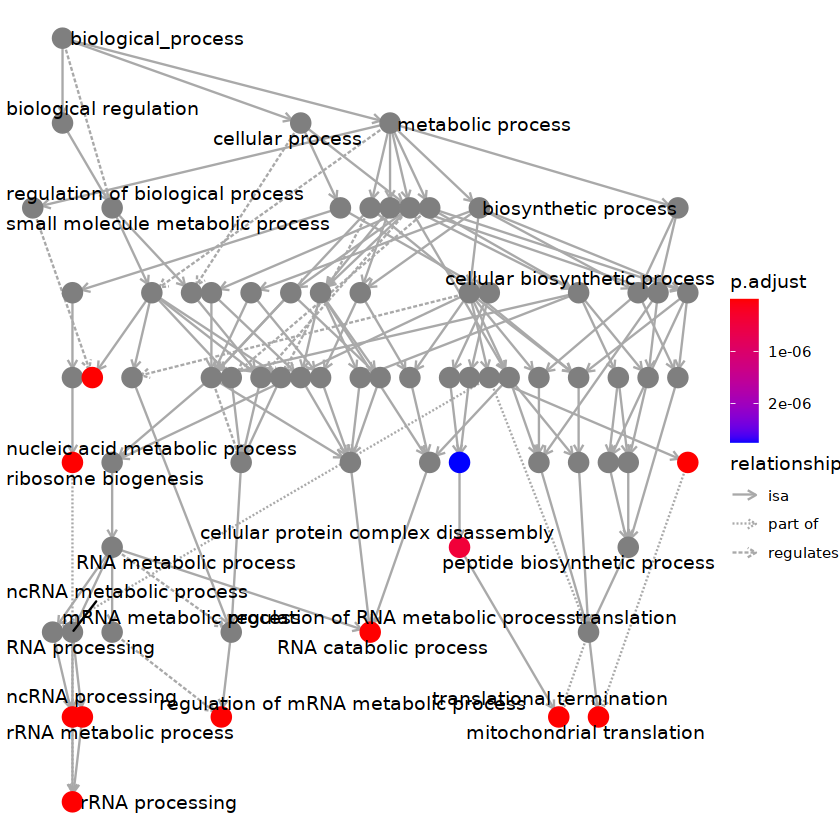

In [71]:
goplot(ego)


In [67]:
data(geneList, package="DOSE")
head(geneList)

4312     8318    10874    55143    55388      991 
4.572613 4.514594 4.418218 4.144075 3.876258 3.677857

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

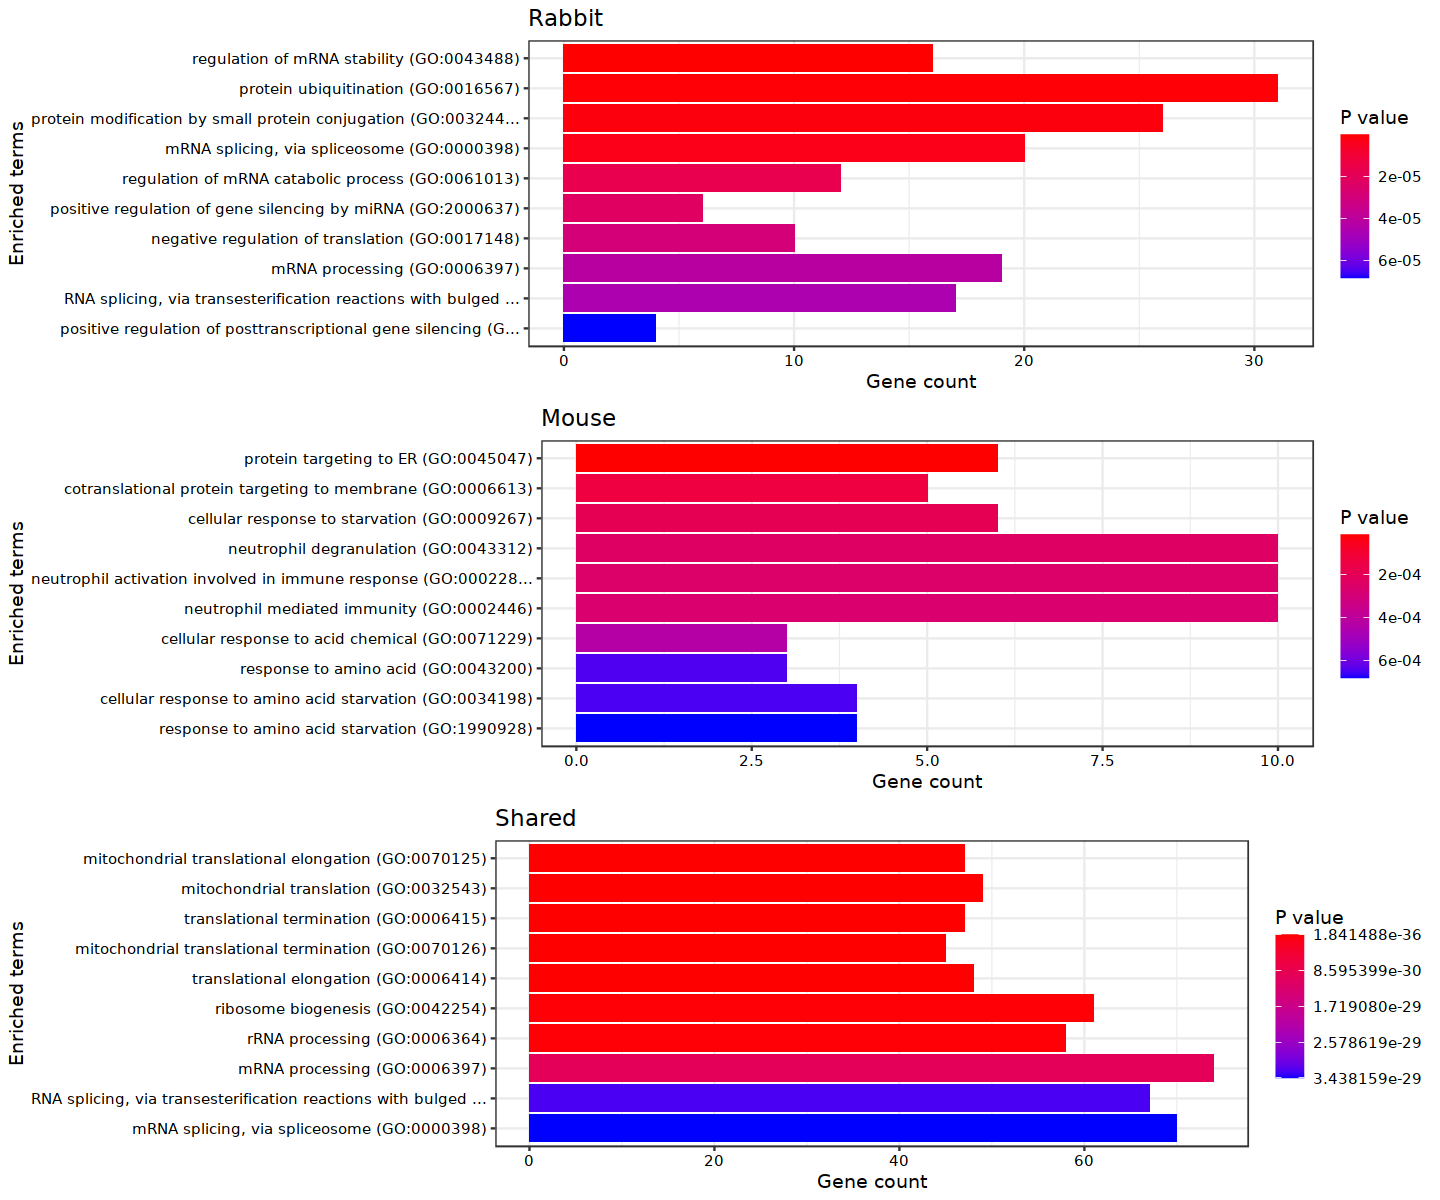

In [83]:
options(repr.plot.width=12, repr.plot.height=10)

plotCelltypeEnriched(rm_markers,"Epiblast", enrichr_dbs[2])

In [120]:
 ct_marks <- rm_markers[["Erythroid"]]

    mct_genes <- ct_marks[ct_marks$class=="mouse unique",]
    mct_genes <- mct_genes[mct_genes$summary.logFC.y > 0,]
    mct_genes <- mct_genes[order(mct_genes$FDR.y),"mgene"]
    
    rct_genes <- ct_marks[ct_marks$class=="rabbit unique",]
    rct_genes <- rct_genes[rct_genes$summary.logFC.x > 0,]
    rct_genes <- rct_genes[order(rct_genes$FDR.x),"rgene"]
    
    # Convert to human orthologs
    #alignments <- grep("ENSG000",rct_genes,value=TRUE)
   #rct_genes <- ochs_one2one[rm_markers$Epiblast$rensembl,"human"]
    #rct_genes <- rct_genes[!is.na(rct_genes)]
    #rct_genes <- c(rct_genes, alignments)
    
    rmct_genes <- ct_marks[ct_marks$class=="shared",]
    rmct_genes <- rmct_genes[(rmct_genes$summary.logFC.y > 0) & (rmct_genes$summary.logFC.x > 0),]
    rmct_genes <- rmct_genes[order(rmct_genes$FDR.y,rmct_genes$FDR.x),"mgene"]

In [124]:
rct_genes

[1] "ADA"                "AZIN2"              "ENSOCUG00000021010"
  [4] "GATA1"              "RGS10"              "ENSOCUG00000013551"
  [7] "KYAT3"              "NFE2"               "USP15"             
 [10] "SLC29A1"            "TUBB1"              "FAM78A"            
 [13] "GPR4"               "EPB41"              "AFP"               
 [16] "ENSOCUG00000012726" "GSTO1"              "RIMS2"             
 [19] "WAPL"               "CTSE"               "TAL1"              
 [22] "ZFAND2B"            "MYC"                "ENSOCUG00000007043"
 [25] "GFI1B"              "SLC16A10"           "PITHD1"            
 [28] "WSCD1"              "SNCA"               "ENSOCUG00000005749"
 [31] "LMO2"               "TTR"                "MPP1"              
 [34] "STK26"              "RPL4"               "CAT"               
 [37] "JAK2"               "CYP1B1"             "TSC22D4"           
 [40] "ENSOCUG00000008793" "EPHB4"              "PHGDH"             
 [43] "SMAP2"              "ABCB6"              "SLC43A3"           
 [46] "ENSOCUG00000021951" "TRIM58"             "ENSOCUG00000022009"
 [49] "SPHK1"              "ADGRG1"             "TMEM9B"            
 [52] "SLC41A1"            "MATN1"              "CPEB4"             
 [55] "REPS2"              "DRC7"               "ENSOCUG00000017021"
 [58] "ENSOCUG00000026440" "MAPK15"             "ENSOCUG00000023913"
 [61] "LHX5"               "SLC32A1"            "BIRC7"             
 [64] "SDSL"               "SLFN14"             "PIP5K1B"           
 [67] "ENSOCUG00000021929" "EMX2"               "RUNDC3A"           
 [70] "TSPO2"              "SUSD1"              "CMAS"              
 [73] "DENND4A"            "BTF3"               "ENSOCUG00000029429"
 [76] "CTSB"               "GLUL"               "HERC1"             
 [79] "HIPK1"              "APOA2"              "RPL12"             
 [82] "KATNB1"             "SMOX"               "BMP2K"             
 [85] "SNX3"               "RIPOR3"             "AIF1"              
 [88] "PRKCB"              "ENSOCUG00000005039" "PHF19"             
 [91] "SGMS2"              "EIF3A"              "CLUH"              
 [94] "ADCY10"             "SLC30A1"            "ENSOCUG00000013943"
 [97] "LRWD1"              "EPRS1"              "ENSOCUG00000008202"
[100] "TACC1"              "MRPL24"             "APOA1"             
[103] "KATNA1"             "DSEL"               "VPS13C"            
[106] "ACAT1"              "RPL14"              "SECISBP2L"         
[109] "ENSOCUG00000010524" "PRKAR2B"            "TMEM245"           
[112] "APOA4"              "ENSOCUG00000003469" "SPOPL"             
[115] "ACOT8"              "ENSOCUG00000010855" "B2M"               
[118] "ADGRG6"             "PCBP1"              "GCDH"              
[121] "AFF1"               "RPS5"               "UCHL5"             
[124] "NAPEPLD"            "SPPL2A"             "COX3"              
[127] "COX1"               "MACO1"              "SH2B3"             
[130] "NDRG2"              "ENSOCUG00000029235" "ENSOCUG00000021109"
[133] "SLC48A1"            "SAV1"               "ENSOCUG00000004999"
[136] "GADD45A"            "ENSOCUG00000022412" "APOB"              
[139] "ATG16L2"            "ENSOCUG00000010089" "RHOBTB3"           
[142] "MAP2K3"             "UBXN1"              "ARPC1B"            
[145] "BACH1"              "BNIP3L"             "INTS6L"            
[148] "ENSOCUG00000001606" "IQSEC1"             "R3HDM1"            
[151] "ENSOCUG00000021847" "APIP"               "PRKAA1"            
[154] "EGFL8"              "ENSOCUG00000024833" "RPS6"              
[157] "NUP50"              "IDH2"               "ENSOCUG00000025664"
[160] "NFE2L2"             "BTG2"               "ENSOCUG00000010546"
[163] "MBD2"               "SPECC1"             "PSPH"              
[166] "AARS1"              "ZFP36L2"            "ENSOCUG00000013786"
[169] "BTRC"               "ISCA2"              "ENSOCUG00000027082"
[172] "ITGA4"              "ATP5F1E"            "TTC27"             


In [129]:
m_markers$Erythroid[10:20,1:3]

DataFrame with 11 rows and 3 columns
                   p.value          FDR summary.logFC
                 <numeric>    <numeric>     <numeric>
Hba-a1        1.18077e-134 2.83054e-131      7.532620
Hbq1b         3.26568e-123 7.11680e-120      0.560070
6030468B19Rik 3.94062e-117 7.87204e-114      0.430690
Hbb-y         1.23097e-116 2.26992e-113      8.637186
Slc25a37      1.69243e-116 2.89792e-113      3.149516
Kel           4.42714e-114 7.07517e-111      0.413833
Slc25a21      2.25836e-113 3.38359e-110      0.574336
Asb17os       1.79736e-110 2.53449e-107      0.244543
Hbb-bh1       1.95393e-110 2.60220e-107      8.998872
Ube2l6        2.65793e-109 3.35347e-106      0.870150
Hba-x         1.80853e-102  2.16770e-99      9.590579

In [131]:
rm_markers$Erythroid["Hba-a1",]

ERROR: Error: cannot subset by character when rownames are NULL


In [130]:
rm_markers$Erythroid[rm_markers$Erythroid$class=="mouse unique",]

DataFrame with 26 rows and 11 columns
                 rgene           rensembl       mgene           mensembl
           <character>        <character> <character>        <character>
1             CDC42EP3 ENSOCUG00000013011    Cdc42ep3 ENSMUSG00000036533
2                 NCF4 ENSOCUG00000021337        Ncf4 ENSMUSG00000071715
3   ENSOCUG00000022150 ENSOCUG00000022150       Rpl17 ENSMUSG00000062328
4   ENSOCUG00000030064 ENSOCUG00000030064       Rpl24 ENSMUSG00000098274
5   ENSOCUG00000017531 ENSOCUG00000017531     Rpl36al ENSMUSG00000049751
...                ...                ...         ...                ...
22               DDIT3 ENSOCUG00000023877       Ddit3 ENSMUSG00000025408
23  ENSOCUG00000017013 ENSOCUG00000017013       Nol12 ENSMUSG00000033099
24              CITED4 ENSOCUG00000015927      Cited4 ENSMUSG00000070803
25  ENSOCUG00000017755 ENSOCUG00000017755        Mpst ENSMUSG00000071711
26                ARF5 ENSOCUG00000024365        Arf5 ENSMUSG00000020440
    p.value.x

In [107]:
m_markers$Epiblast["Pou5f1",1:3]

DataFrame with 1 row and 3 columns
         p.value       FDR summary.logFC
       <numeric> <numeric>     <numeric>
Pou5f1  0.958657         1     -0.037365

In [117]:
enriched <- getCelltypeEnriched(rm_markers, "Erythroid",gene_list=enrichr_dbs,logFC_thresh=0)

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
Parsing results... Done.


In [ ]:
rm_markers$

In [118]:
head(enriched$r_enriched[[3]],20)

Term                      Overlap P.value      Adjusted.P.value Old.P.value
1  Myc Targets V1            40/200  2.523354e-19 1.211210e-17     0          
2  heme Metabolism           35/200  3.463860e-15 8.313265e-14     0          
3  Oxidative Phosphorylation 31/200  3.754902e-12 6.007843e-11     0          
4  Myc Targets V2            15/58   9.914383e-10 1.189726e-08     0          
5  mTORC1 Signaling          26/200  9.714893e-09 9.326297e-08     0          
6  E2F Targets               24/200  1.669011e-07 1.335209e-06     0          
7  G2-M Checkpoint           21/200  8.343475e-06 5.721240e-05     0          
8  Unfolded Protein Response 15/113  1.003434e-05 6.020603e-05     0          
9  Adipogenesis              19/200  8.776237e-05 4.680660e-04     0          
10 Mitotic Spindle           16/199  1.866977e-03 8.961492e-03     0          
11 Fatty Acid Metabolism     13/158  3.945350e-03 1.721607e-02     0          
12 Xenobiotic Metabolism     15/200  4.904740e-03 1.961896e-02     0          
13 Pperoxisome               9/104   1.111626e-02 3.932935e-02     0          
14 Complement                14/200  1.147106e-02 3.932935e-02     0          
15 Hedgehog Signaling        4/36    3.678381e-02 1.177082e-01     0          
16 DNA Repair                10/150  3.959677e-02 1.187903e-01     0          
17 Bile Acid Metabolism      8/112   4.420250e-02 1.248071e-01     0          
18 p53 Pathway               12/200  5.102686e-02 1.360716e-01     0          
19 Coagulation               9/138   5.520894e-02 1.394752e-01     0          
20 Apoptosis                 10/161  5.873938e-02 1.409745e-01     0          
   Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0                    7.204819   308.535778    
2  0                    6.065906   201.972778    
3  0                    5.213229   137.149409    
4  0                    9.747696   202.087919    
5  0                    4.214322    77.752580    
6  0                    3.834225    59.836390    
7  0                    3.283714    38.399850    
8  0                    4.264832    49.086076    
9  0                    2.929266    27.361912    
10 0                    2.428898    15.261823    
11 0                    2.484785    13.753824    
12 0                    2.248970    11.959019    
13 0                    2.617327    11.776259    
14 0                    2.084619     9.313927    
15 0                    3.440000    11.361279    
16 0                    1.971593     6.366290    
17 0                    2.121132     6.615754    
18 0                    1.762514     5.244189    
19 0                    1.924076     5.573336    
20 0                    1.826918     5.178663    
   Genes                                                                                                                                                                                                                                
1  HDDC2;SLC25A3;KARS1;DDX21;GSPT1;HSPD1;MYC;PCBP1;POLD2;USP1;RPL14;PSMD1;IARS1;CCT5;CCT4;NOP56;DDX18;CCT2;XRCC6;NCBP1;RPS5;RPS6;EIF2S2;EIF2S1;SRPK1;GNL3;TUFM;RSL1D1;PSMC6;EPRS1;IMPDH2;CANX;TCP1;VDAC3;NHP2;MCM4;MCM5;ETF1;HPRT1;EIF3B
2  BTG2;USP15;NARF;ABCB6;EPB41;GMPS;NR3C1;BACH1;GATA1;BTRC;CTSE;DCAF11;FBXO9;CTSB;SNCA;MPP1;MAP2K3;CAST;NFE2;BNIP3L;SMOX;SLC10A3;LMO2;SLC30A1;GAPVD1;KLF3;RCL1;TSPO2;TFDP2;TAL1;CAT;BMP2K;TRIM58;TOP1;TMEM9B                            
3  SLC25A3;ACAA2;MRPS11;MRPS12;NDUFB2;MRPS30;PDHB;HSD17B10;ACAT1;TIMM50;ATP5F1A;AIFM1;OPA1;ACADM;ATP6V1E1;ATP6V1D;COX8A;HSPA9;NDUFA6;MTX2;IDH2;IMMT;ATP5F1C;ATP5F1E;LRPPRC;UQCRQ;UQCRC1;VDAC3;NDUFS2;SUCLG1;ISCU                        
4  NOP56;DDX18;NOC4L;WDR43;GNL3;TBRG4;HSPD1;RCL1;EXOSC5;MYBBP1A;MYC;MCM4;MPHOSPH10;MCM5;RRP12                                                                                                                                           
5  BTG2;PSMD12;GMPS;SLC1A5;AURKA;HSPD1;SERP1;PHGDH;ATP6V1D;PSPH;MAP2K3;HSPA9;RRM2;IMMT;EIF2S2;UCHL5;WARS1;PSMC6;EPRS1;DDIT4;CANX;

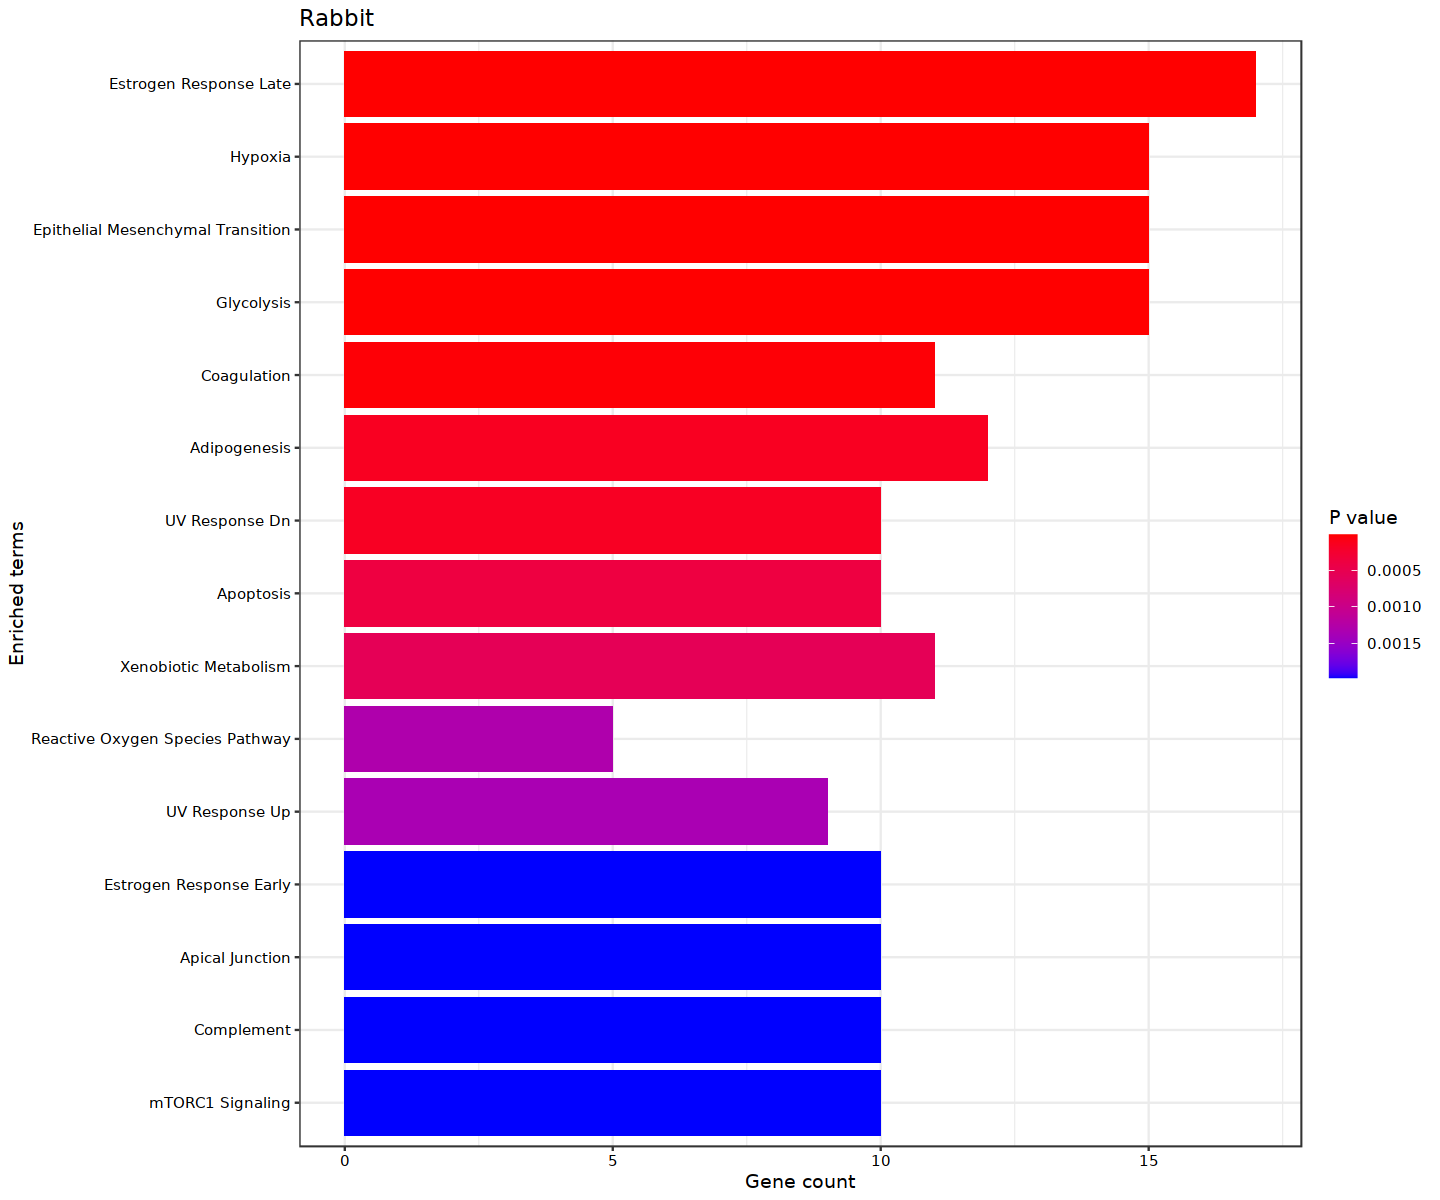

In [114]:
plotEnrich(enriched$r_enriched[[3]], showTerms = 15, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")

In [ ]:
p1 <- scater::plotReducedDim(r_data, "UMAP", colour_by="CDX2") + scale_color_viridis(direction=-1)
p2 <- scater::plotReducedDim(m_data, "UMAP", colour_by="Cdx2") + scale_color_viridis(direction=-1)
grid.arrange(p1,p2,nrow=1)

## Plot shared/unique markers

In [22]:
# TODO: Add to scrabbitr
getGeneMeansFast <- function(gene, mat, celltypes){
  expr <- mat[gene,]
  medians = aggregate(formula = expr ~ celltypes, FUN = mean)
  out = matrix(medians$expr, nrow = 1, dimnames = list(gene, medians$celltypes))
  return(out)
}

getExpressionFast <- function(sce,genes,group_by="celltype",norm="min-max") {
  genes <- genes[!is.na(genes)]
  mat <- logcounts(sce)[genes,]
  means <- lapply(genes, getGeneMeansFast, mat = mat, celltypes = sce[[group_by]])
  combined <- do.call(rbind,means)
  celltypes <- colnames(combined)
  if(norm=="min-max") {
    combined <- sweep(combined, 1, apply(combined, 1, max), "/")
  } else if(norm=="z-scale") {
    combined <- t(apply(combined, 1, scale))
    colnames(combined) <- celltypes
  } 
  return(combined)
}

In [23]:
# Plot shared/unique heatmap
getSharedUniqueMarkers <- function(merge.markers,N=1) {

  rchosen <- NULL
  mchosen <- NULL
  
  ncelltypes <- length(names(merge.markers))
  rshared <- mshared <- runiq <- muniq <- setNames(data.frame(matrix(ncol = ncelltypes,
                                                   nrow = N)),names(merge.markers))
  for (celltype in names(merge.markers)) {
    markers <- merge.markers[[celltype]]
    
    # Make sure genes not already chosen
    markers <- markers[!(markers$rgene%in%rchosen) &
                         !(markers$mgene%in%mchosen),]
    
    markers <- markers[order(pmax(markers[,"FDR.x"],
                             markers[,"FDR.y"]),
                             decreasing=F),]
    
    rshared_markers <- markers[markers$class=="shared","rgene"][1:N]
    mshared_markers <- as.character(markers[markers$class=="shared","mgene"][1:N])
    
    markers <- markers[order(markers[,"FDR.x"],
                             decreasing=F),]
    runiq_markers <- markers[markers$class=="rabbit unique","rgene"][1:N]
    
    markers <- markers[order(markers[,"FDR.y"],
                             decreasing=F),]
    muniq_markers <- markers[markers$class=="mouse unique","mgene"][1:N]
    
    rshared[[celltype]] <- rshared_markers
    mshared[[celltype]] <- mshared_markers
    runiq[[celltype]] <- runiq_markers
    muniq[[celltype]] <- muniq_markers
    
    rchosen <- c(rchosen,rshared_markers,runiq_markers)
    mchosen <- c(mchosen,mshared_markers,muniq_markers)
  }
  
  return(list(rshared=rshared,mshared=mshared,runiq=runiq,muniq=muniq))
    
}

In [86]:
hm.genes <- getSharedUniqueMarkers(rm_markers)

r_hm.genes <- c(rbind(as.character(as.vector(hm.genes$rshared)), 
                       as.character(as.vector(hm.genes$runiq))))

m_hm.genes <- c(rbind(as.character(as.vector(hm.genes$mshared)), 
                       as.character(as.vector(hm.genes$muniq))))

In [89]:
r_hm.exp <- getExpressionFast(r_data, r_hm.genes, norm="min-max")
m_hm.exp <- getExpressionFast(m_data, m_hm.genes, norm="min-max")

Warning message:
“Heatmap/annotation names are duplicated: Mean expression”


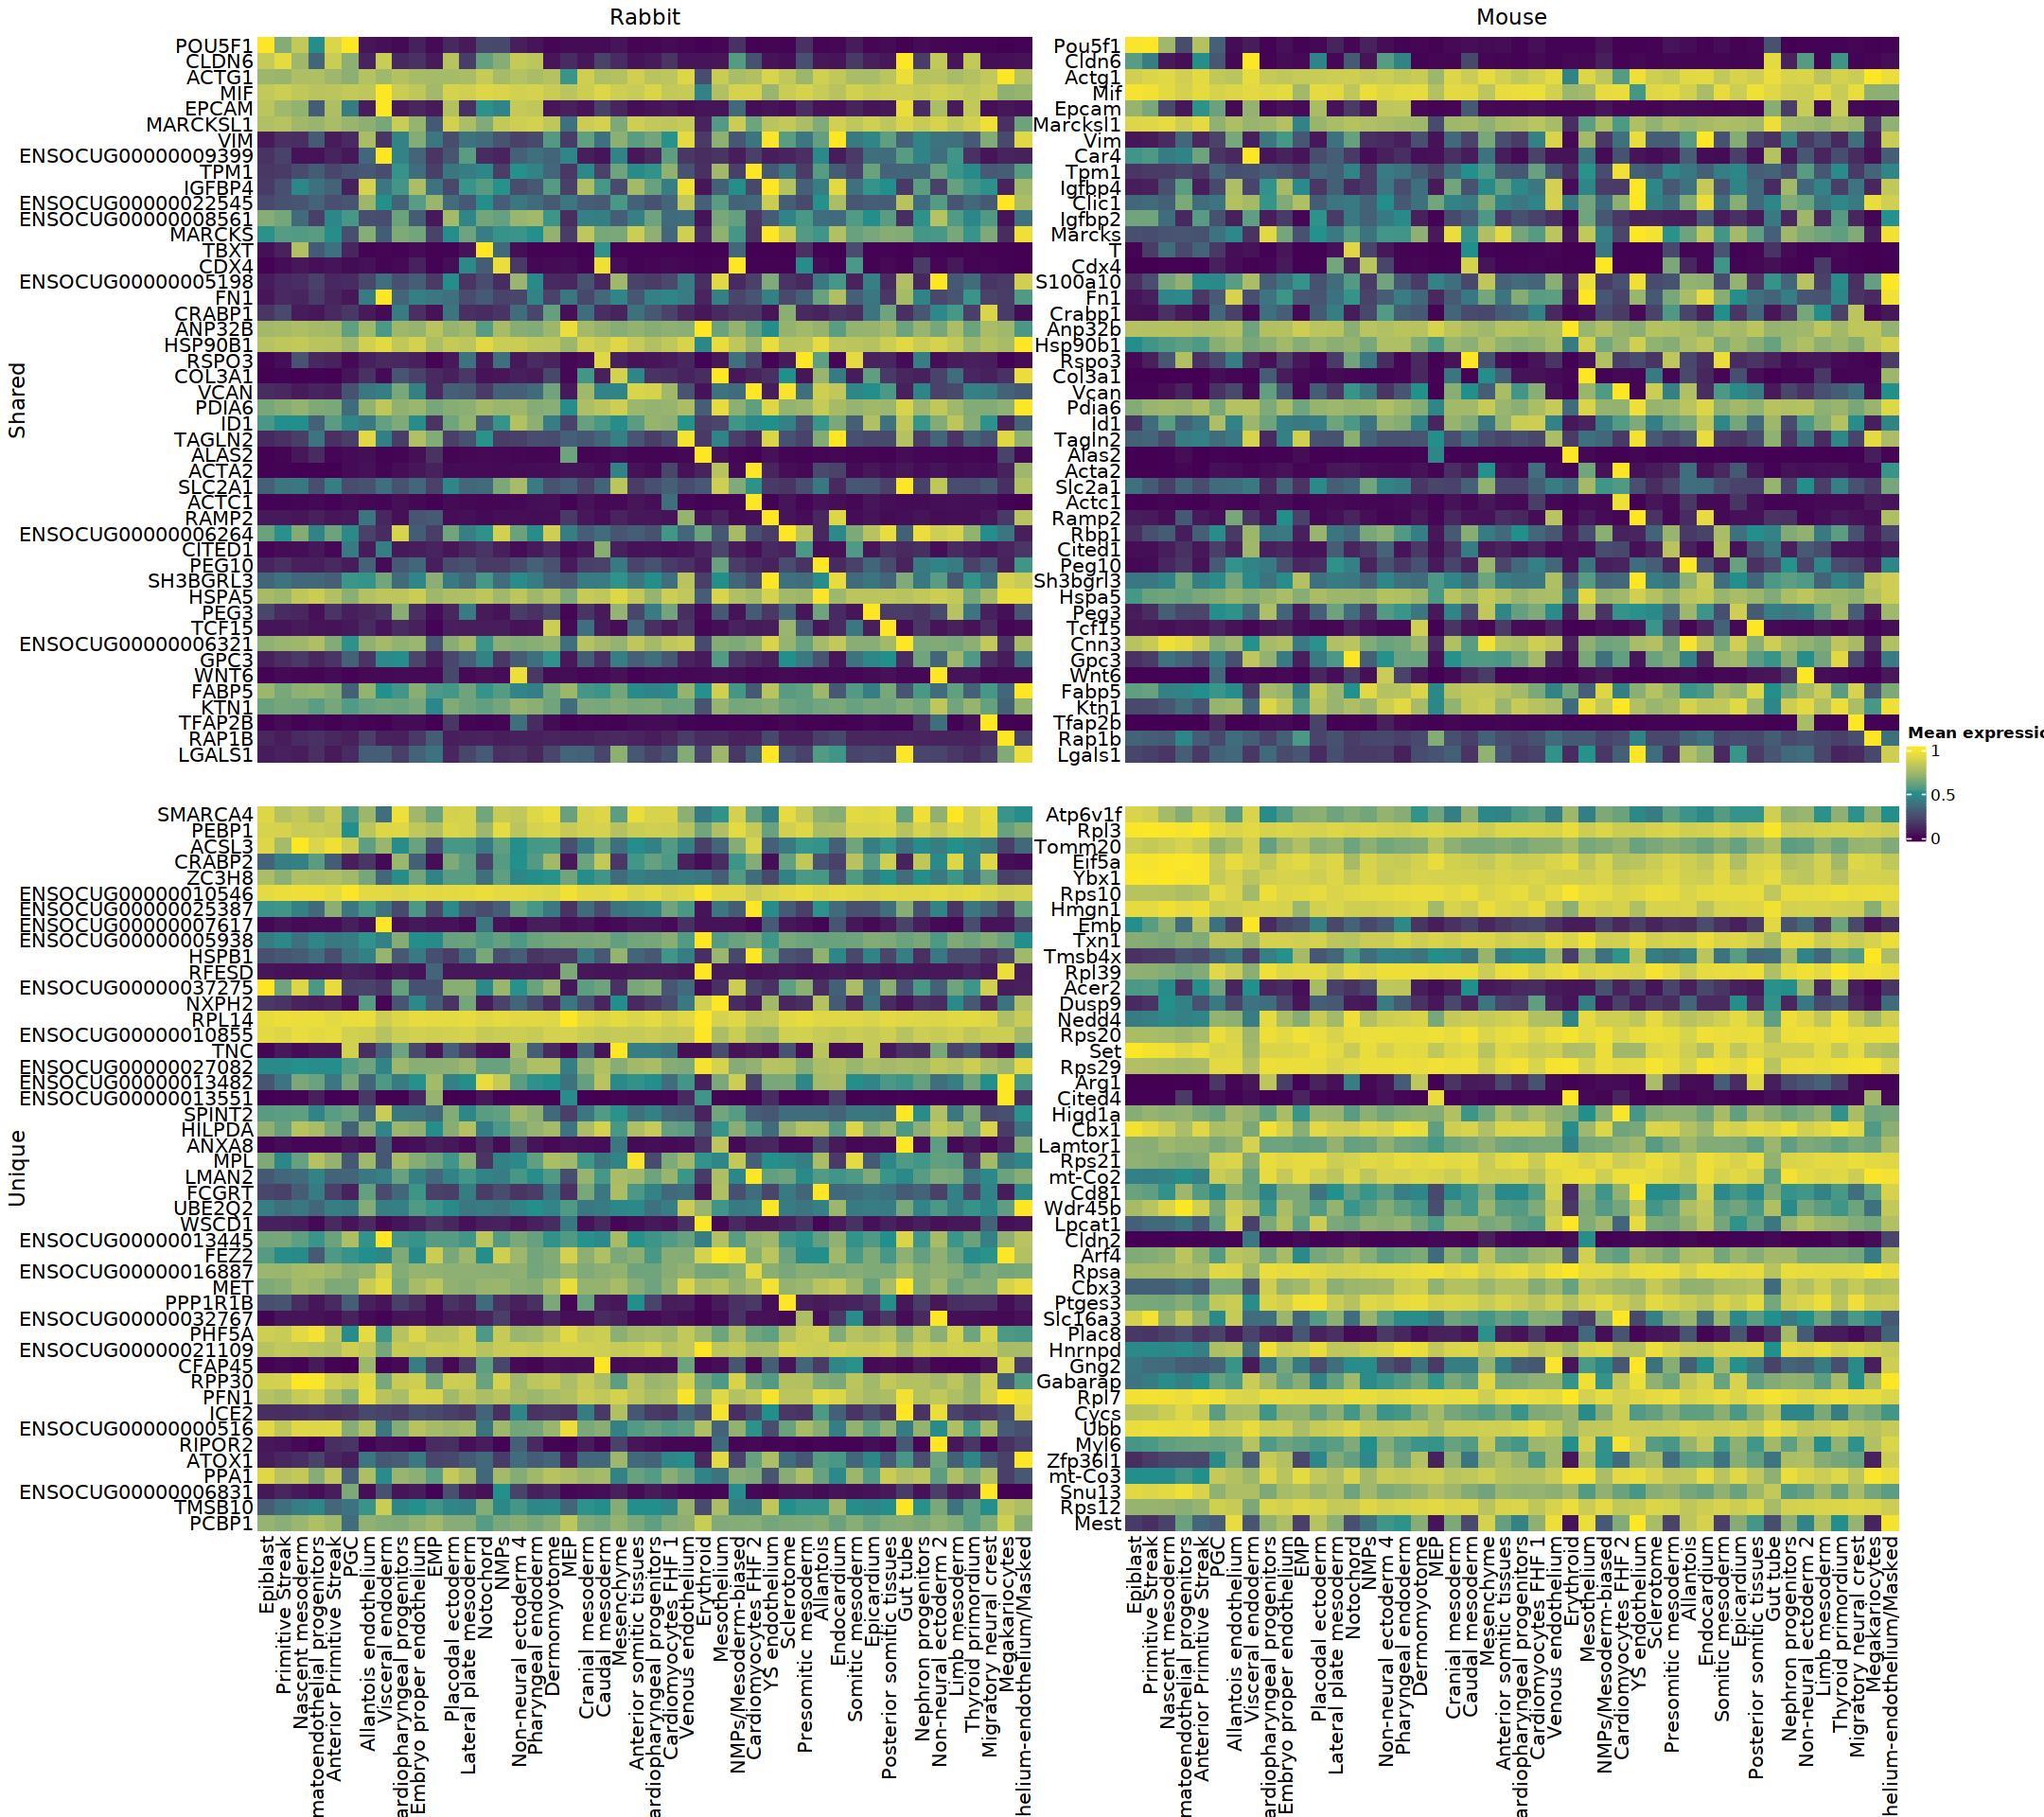

In [90]:
options(repr.plot.width=18, repr.plot.height=16)

p1 <- Heatmap(r_hm.exp[,ctype_shared],
        name = "Mean expression",
        cluster_rows = F,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit",
        row_names_side = "left",
        row_split = ifelse(r_hm.genes[!is.na(r_hm.genes)] %in% hm.genes$rshared,"Shared", "Unique"),
        row_labels = rownames(r_hm.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))

p2 <- Heatmap(m_hm.exp[,ctype_shared],
        name = "Mean expression",
        cluster_rows = F,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Mouse",
        row_names_side = "left",
        row_split = ifelse(m_hm.genes[!is.na(m_hm.genes)] %in% hm.genes$mshared,"Shared", "Unique"),
        row_labels = rownames(m_hm.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))


p <- p1 + p2
draw(p, auto_adjust = FALSE)

In [84]:
rm_markers$Epiblast[rm_markers$Epiblast$class=="rabbit unique","rgene"]

[1] "ARHGAP29"           "KTN1"               "HSPH1"             
  [4] "ENSOCUG00000037275" "ENSOCUG00000025387" "ITSN1"             
  [7] "SBNO1"              "KIF5B"              "EIF3A"             
 [10] "LRPPRC"             "CNIH4"              "KDM1A"             
 [13] "PEBP1"              "USO1"               "JAK1"              
 [16] "PRRC2C"             "USP7"               "SOD1"              
 [19] "MAP4K4"             "S100A13"            "SLC5A3"            
 [22] "HMGCR"              "PRR14L"             "SMARCA4"           
 [25] "IARS1"              "DLGAP5"             "COX3"              
 [28] "PLEKHA8"            "ABCF1"              "CYTB"              
 [31] "TRIM39"             "ARID4B"             "ZNF146"            
 [34] "BMS1"               "KDM3A"              "DYNC2H1"           
 [37] "S100PBP"            "COX1"               "CPD"               
 [40] "XPC"                "UTRN"               "PUS7L"             
 [43] "COX2"               "PDCD11"             "MYRIP"             
 [46] "ADD3"               "FGFR4"              "YES1"              
 [49] "PEX5"               "DZIP1"              "ENSOCUG00000022850"
 [52] "ENSOCUG00000027081" "UACA"               "USP33"             
 [55] "TNFAIP6"            "UTP6"               "KDM5A"             
 [58] "TAF15"              "HYOU1"              "SNRNP200"          
 [61] "THRAP3"             "PPFIBP1"            "ACAT1"             
 [64] "ABRACL"             "RHOBTB3"            "CAPRIN1"           
 [67] "ENSOCUG00000013068" "ENSOCUG00000005736" "SF1"               
 [70] "ARHGAP11A"          "ATP2B1"             "DDX42"             
 [73] "BAZ2B"              "UBAP2L"             "UBTF"              
 [76] "KANSL1L"            "PPIP5K2"            "SLC4A7"            
 [79] "WAC"                "LXN"                "SYT6"              
 [82] "FXR1"               "SUCO"               "CMC1"              
 [85] "ENSOCUG00000024398" "ELF1"               "GOLGB1"            
 [88] "VPS35"              "RSPH14"             "ATP2A2"            
 [91] "XPO1"               "DSP"                "YLPM1"             
 [94] "PCMTD1"             "RASA1"              "CCDC186"           
 [97] "ZMYM4"              "CASK"               "BARD1"             
[100] "SEMA6D"             "EFL1"               "PPP4R3A"           
[103] "CDKL5"              "RTF1"               "EIF4G1"            
[106] "PTPRA"              "TBC1D9B"            "ENSOCUG00000022489"
[109] "KIF1B"              "URB2"               "NCK2"              
[112] "RABGAP1L"           "TNIK"               "NIPSNAP2"          
[115] "ENSOCUG00000012833" "SMCHD1"             "PHF14"             
[118] "PMM2"               "MTREX"              "PAXIP1"            
[121] "BRD8"               "ENSOCUG00000001500" "HUWE1"             
[124] "CNOT1"              "VGLL4"              "ENSOCUG00000016690"
[127] "CNOT10"             "ATP5MC3"            "CAND1"             
[130] "COP1"               "XRN2"               "INTS8"             
[133] "DDX23"              "TAF10"              "PLIN2"             
[136] "SART3"              "ZNF652"             "TNPO1"             
[139] "YME1L1"             "SPEN"               "CUL1"              
[142] "PIK3C2A"            "AP3B2"              "GLG1"              
[145] "TGS1"               "ENSOCUG00000000186" "PUM1"              
[148] "DCHS1"              "PALB2"              "NSMAF"             
[151] "MYLIP"              "TPP2"               "PAPSS1"            
[154] "MPP5"               "EPB41L5"            "TNRC6A"            
[157] "CCDC50"             "HSF2"               "ENPP1"             
[160] "LTA4H"              "LRP6"               "ZC3H18"            
[163] "SDS"                "UBTD2"              "ACAA2"             
[166] "PSMD1"              "ENSOCUG00000003188" "CCDC171"           
[169] "GCN1"               "ENSOCUG00000013484" "CSDE1"             
[172] "VCP"                "TBC1D31"            "ENSOCUG00000007690"


In [102]:
epi_hm.rgenes <- c("FABP7","RABGAP1L","COX3","FABP5","CYTB", "ID3", "EMB","GLRX5","PFN1","SLC7A3","TRH","SFRP2" )  
#rownames(m_genes) <- m_genes$ensembl_id
epi_hm.mgenes <- c('Fabp7','Rabgap1l','mt-Co3','Fabp5','mt-Cytb','Id3','Emb','Glrx5','Pfn1','Slc7a3',"Trh", "Sfrp2")

In [93]:
m_genes[rm_one2one[r_genes[epi_hm.rgenes,"ensembl_id"],"query"],"gene_name"]

[1] "Fabp7"    "Rabgap1l" "mt-Co3"   "Fabp5"    "mt-Cytb"  "Id3"     
 [7] "Emb"      "Glrx5"    "Pfn1"     "Slc7a3"

In [43]:
rm_markers$Epiblast[rm_markers[[celltype]]$class == "mouse unique",]

ERROR: Error: subscript is a logical vector with out-of-bounds TRUE values


In [60]:
celltype <-'Gut tube'

epi_hm.rgenes <- c(rm_markers[[celltype]][rm_markers[[celltype]]$class == "rabbit unique","rgene"][1:10],
                   rm_markers[[celltype]][rm_markers[[celltype]]$class == "mouse unique","rgene"][1:10])
epi_hm.mgenes <- c(rm_markers[[celltype]][rm_markers[[celltype]]$class == "rabbit unique","mgene"][1:10],
                   rm_markers[[celltype]][rm_markers[[celltype]]$class == "mouse unique","mgene"][1:10])

In [61]:
r_hm.exp <- getExpressionFast(r_data, epi_hm.rgenes, norm="none")
m_hm.exp <- getExpressionFast(m_data, epi_hm.mgenes, norm="none")

In [62]:
df <- data.frame(Rabbit=r_hm.exp[,celltype], Mouse=m_hm.exp[,celltype])

Warning message:
“The input is a data frame, convert it to the matrix.”


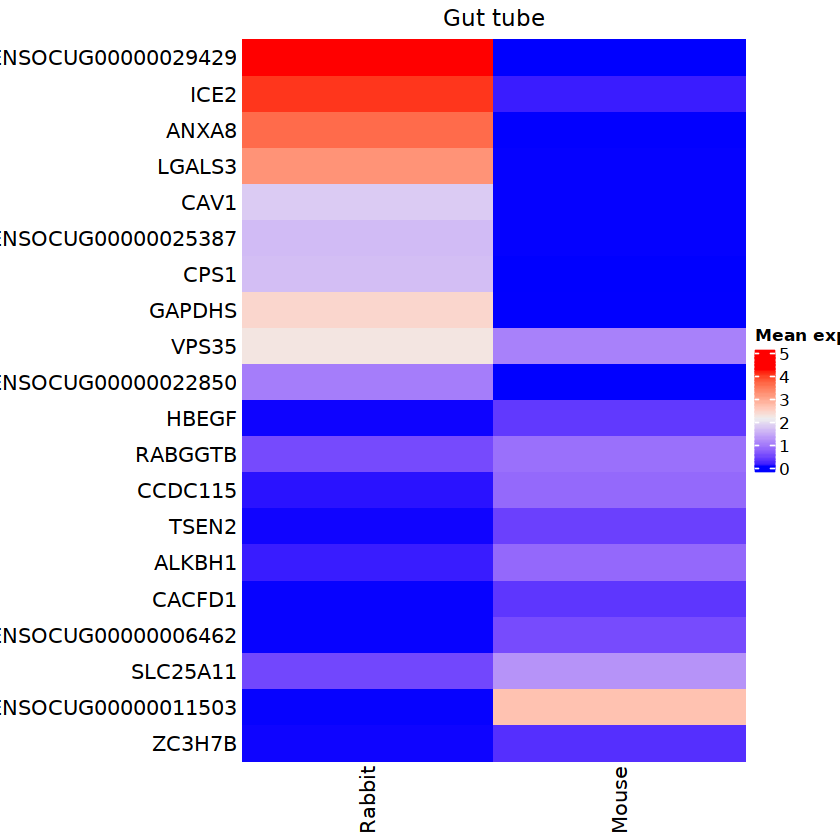

In [63]:
#pdf(file=paste0("../plots/compare_genes/", celltype,"_shared_unique_heatmap.pdf"))

Heatmap(df,
        name = "Mean exp",
        cluster_rows = F,
        show_row_dend = F,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = celltype,
        row_names_side = "left",
        row_labels = rownames(df),
        row_gap = unit(10, "mm"))

#dev.off()


In [98]:
r_hm.norm <- r_hm.exp[,"Epiblast"]/max(r_hm.exp[,"Epiblast"])
m_hm.norm <- m_hm.exp[,"Epiblast"]/max(m_hm.exp[,"Epiblast"])
df <- data.frame(Rabbit=r_hm.norm, Mouse=m_hm.norm)
df

Rabbit      Mouse      
FABP7    0.487895662 0.006616915
RABGAP1L 0.414354042 0.002632588
COX3     1.000000000 0.543548671
FABP5    0.713167159 0.410251945
CYTB     0.897992405 0.596688502
ID3      0.002114780 0.509792417
EMB      0.003570261 0.455146985
GLRX5    0.003602098 0.441918198
PFN1     0.561040570 1.000000000
SLC7A3   0.027631568 0.393409771

## Integration 

In [2]:
# Load SAMAP clustering and species-specific clusters
r_clusts <- read.table("../data-out/integration/oc_samap_clusters_res10.tsv",sep="\t",row.names=1,header=TRUE)
species_clusts <- read.table("../data-out/integration/species_specific_clusters_res10.tsv",sep="\t",header=TRUE)[,2:3]
head(species_clusts)

leiden_clusters species
1  0              mo     
2  2              mo     
3  3              mo     
4  5              mo     
5 11              mo     
6 18              ra

In [10]:
r_data$samap_clusts <- r_clusts$leiden_clusters
r_data$rabbit_specific <- r_data$samap_clusts %in% species_clusts[species_clusts$species=="ra","leiden_clusters"]

In [52]:
head(r_data$samap_clusts)

leiden_clusters
cell_1 96             
cell_2 72             
cell_4 96             
cell_5 74             
cell_6  9             
cell_9 72

In [53]:
head(species_clusts[species_clusts$species=="ra","leiden_clusters"])

[1] 18 25 51 61 62 72

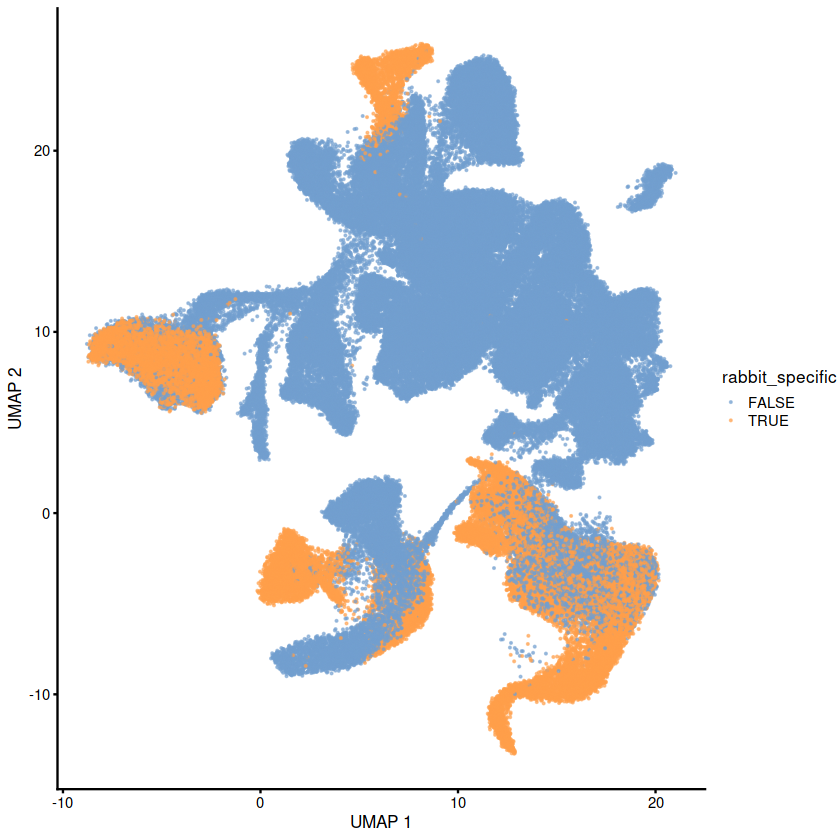

In [56]:
plotReducedDim(r_data, "UMAP", colour_by="rabbit_specific",point_size=0.1)

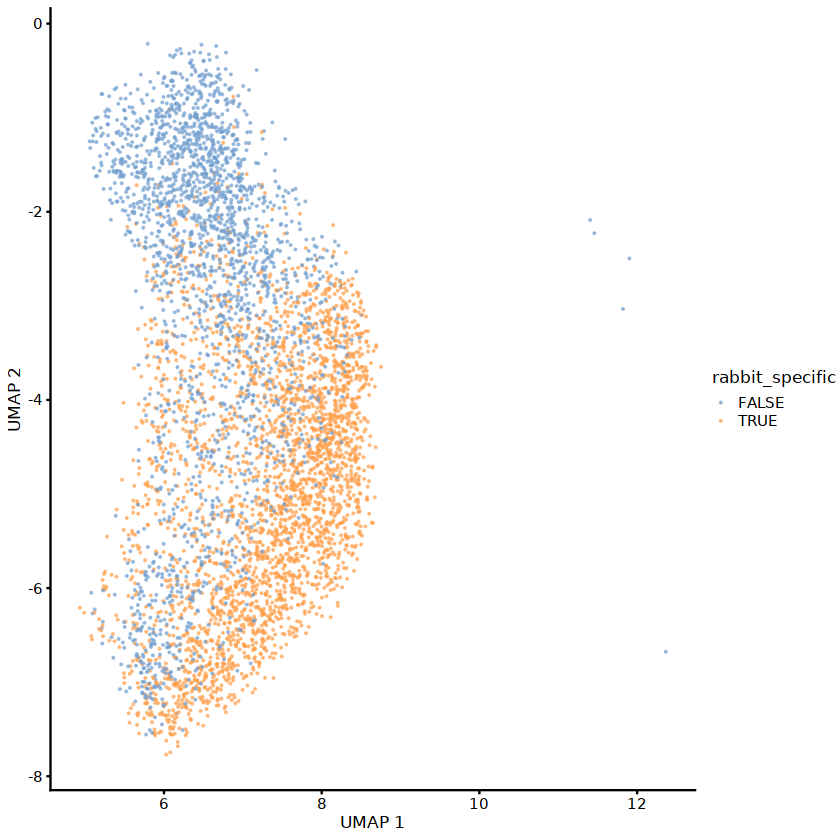

In [11]:
r_hypo <- r_data[,r_data$celltype=="Hypoblast"]

plotReducedDim(r_hypo, "UMAP", colour_by="rabbit_specific",point_size=0.1)

In [ ]:
# Unique hypoblast cluster
r_hypo <- r_data[,r_data$celltype=="Hypoblast"]
markers <- scran::findMarkers(r_hypo,groups=r_hypo$rabbit_specific, pval.type="all",direction="up")
markers[["TRUE"]][1:10,1:3]

In [101]:
query_markers <- markers[["TRUE"]]
query_genes <- rownames(query_markers[query_markers$FDR < 0.001 ,])

In [107]:
query_markers[1:10,1:4]

DataFrame with 10 rows and 4 columns
                     p.value       FDR summary.logFC logFC.FALSE
                   <numeric> <numeric>     <numeric>   <numeric>
HMGCS1                     0         0      2.165818    2.165818
FDPS                       0         0      2.048352    2.048352
NSDHL                      0         0      1.767507    1.767507
ACAT2                      0         0      2.440277    2.440277
ENSOCUG00000001375         0         0      1.709646    1.709646
SQLE                       0         0      1.251187    1.251187
CYP51A1                    0         0      1.129885    1.129885
ENSOCUG00000015316         0         0      1.659137    1.659137
INSIG1                     0         0      0.730589    0.730589
MSMO1                      0         0      1.603546    1.603546

In [120]:
query_genes[1:200]

[1] "HMGCS1"             "FDPS"               "NSDHL"             
  [4] "ACAT2"              "ENSOCUG00000001375" "SQLE"              
  [7] "CYP51A1"            "ENSOCUG00000015316" "INSIG1"            
 [10] "MSMO1"              "ENSOCUG00000023661" "TFEC"              
 [13] "TFPI"               "ENSOCUG00000002750" "ACSL4"             
 [16] "HMGCR"              "ENSOCUG00000022412" "SRGN"              
 [19] "ENSOCUG00000007493" "ENSOCUG00000009848" "ENSOCUG00000022961"
 [22] "FABP5"              "ENSOCUG00000006530" "FDFT1"             
 [25] "ENSOCUG00000023626" "ENSOCUG00000016268" "LDLR"              
 [28] "GPX2"               "ENSOCUG00000034533" "RPL10"             
 [31] "ENSOCUG00000008407" "ENSOCUG00000003802" "ENSOCUG00000015255"
 [34] "ENSOCUG00000014801" "ENSOCUG00000031505" "FUT8"              
 [37] "ENSOCUG00000008818" "PFDN5"              "PRMT1"             
 [40] "ENSOCUG00000024057" "ELOVL6"             "ERG28"             
 [43] "IL17RD"             "SC5D"               "ENSOCUG00000010089"
 [46] "ENSOCUG00000031735" "LSS"                "ENSOCUG00000000590"
 [49] "EBNA1BP2"           "EMILIN2"            "GNL1"              
 [52] "ACSS2"              "ENSOCUG00000007018" "ENSOCUG00000028047"
 [55] "ATIC"               "EFR3A"              "YES1"              
 [58] "PEBP1"              "RPS3A"              "ENSOCUG00000003891"
 [61] "ENSOCUG00000011117" "ENSOCUG00000008518" "WNT11"             
 [64] "MRPL39"             "MGST1"              "ZNF34"             
 [67] "CCT8"               "ENSOCUG00000004373" "ENSOCUG00000011373"
 [70] "BAX"                "PPA1"               "PPID"              
 [73] "TLCD1"              "LXN"                "ENSOCUG00000002053"
 [76] "ENSOCUG00000024434" "ACSL3"              "ENSOCUG00000013555"
 [79] "ENSOCUG00000021755" "ENSOCUG00000025904" "ENSOCUG00000013268"
 [82] "PGD"                "AACS"               "TARS1"             
 [85] "ENSOCUG00000016628" "MRPL18"             "IER3"              
 [88] "SLC7A9"             "MPP1"               "HSPD1"             
 [91] "CRYGD"              "ENSOCUG00000009140" "ENSOCUG00000006321"
 [94] "IDH1"               "ENAH"               "ENSOCUG00000037275"
 [97] "ID2"                "TKT"                "ENSOCUG00000026859"
[100] "ENSOCUG00000017653" "ENSOCUG00000011529" "RND3"              
[103] "HSPA9"              "ENSOCUG00000026627" "ENSOCUG00000003862"
[106] "RGS14"              "CCT5"               "DDX39B"            
[109] "ENSOCUG00000010375" "ANP32B"             "GAR1"              
[112] "ENSG00000122224"    "ENSOCUG00000002074" "PRXL2A"            
[115] "ENSOCUG00000017928" "NXF1"               "PDHA1"             
[118] "ENSOCUG00000030756" "KYAT3"              "SSB"               
[121] "AMOTL1"             "COMTD1"             "ZNF146"            
[124] "ENSG00000163132"    "SLC10A4"            "LYAR"              
[127] "ENSOCUG00000011557" "BMP2"               "MANF"              
[130] "ENSOCUG00000029520" "ENSOCUG00000022355" "COLEC12"           
[133] "PDHB"               "ENSOCUG00000013171" "ENSOCUG00000025345"
[136] "MIPOL1"             "ENSOCUG00000004483" "ENSOCUG00000035555"
[139] "ACLY"               "ENSOCUG00000008507" "AIMP2"             
[142] "ENSOCUG00000005749" "DLAT"               "ENSOCUG00000021400"
[145] "DPEP1"              "SSR2"               "PSIP1"             
[148] "ENSOCUG00000005026" "ENSOCUG00000007501" "CCT7"              
[151] "EPRS1"              "LBR"                "ENSOCUG00000017674"
[154] "ENSOCUG00000010552" "CAPRIN1"            "SIGMAR1"           
[157] "KANSL1L"            "ENSOCUG00000005899" "PSMC2"             
[160] "ENSOCUG00000002594" "UAP1"               "SEPTIN11"          
[163] "MRPS25"             "RANBP1"             "RPP30"             
[166] "ELOA"               "SYNCRIP"            "ENSOCUG00000032417"
[169] "UPP1"               "PRKAR2A"            "ENSOCUG00000007825"
[172] "GMPS"               "PROCR"              "TIMM50"            


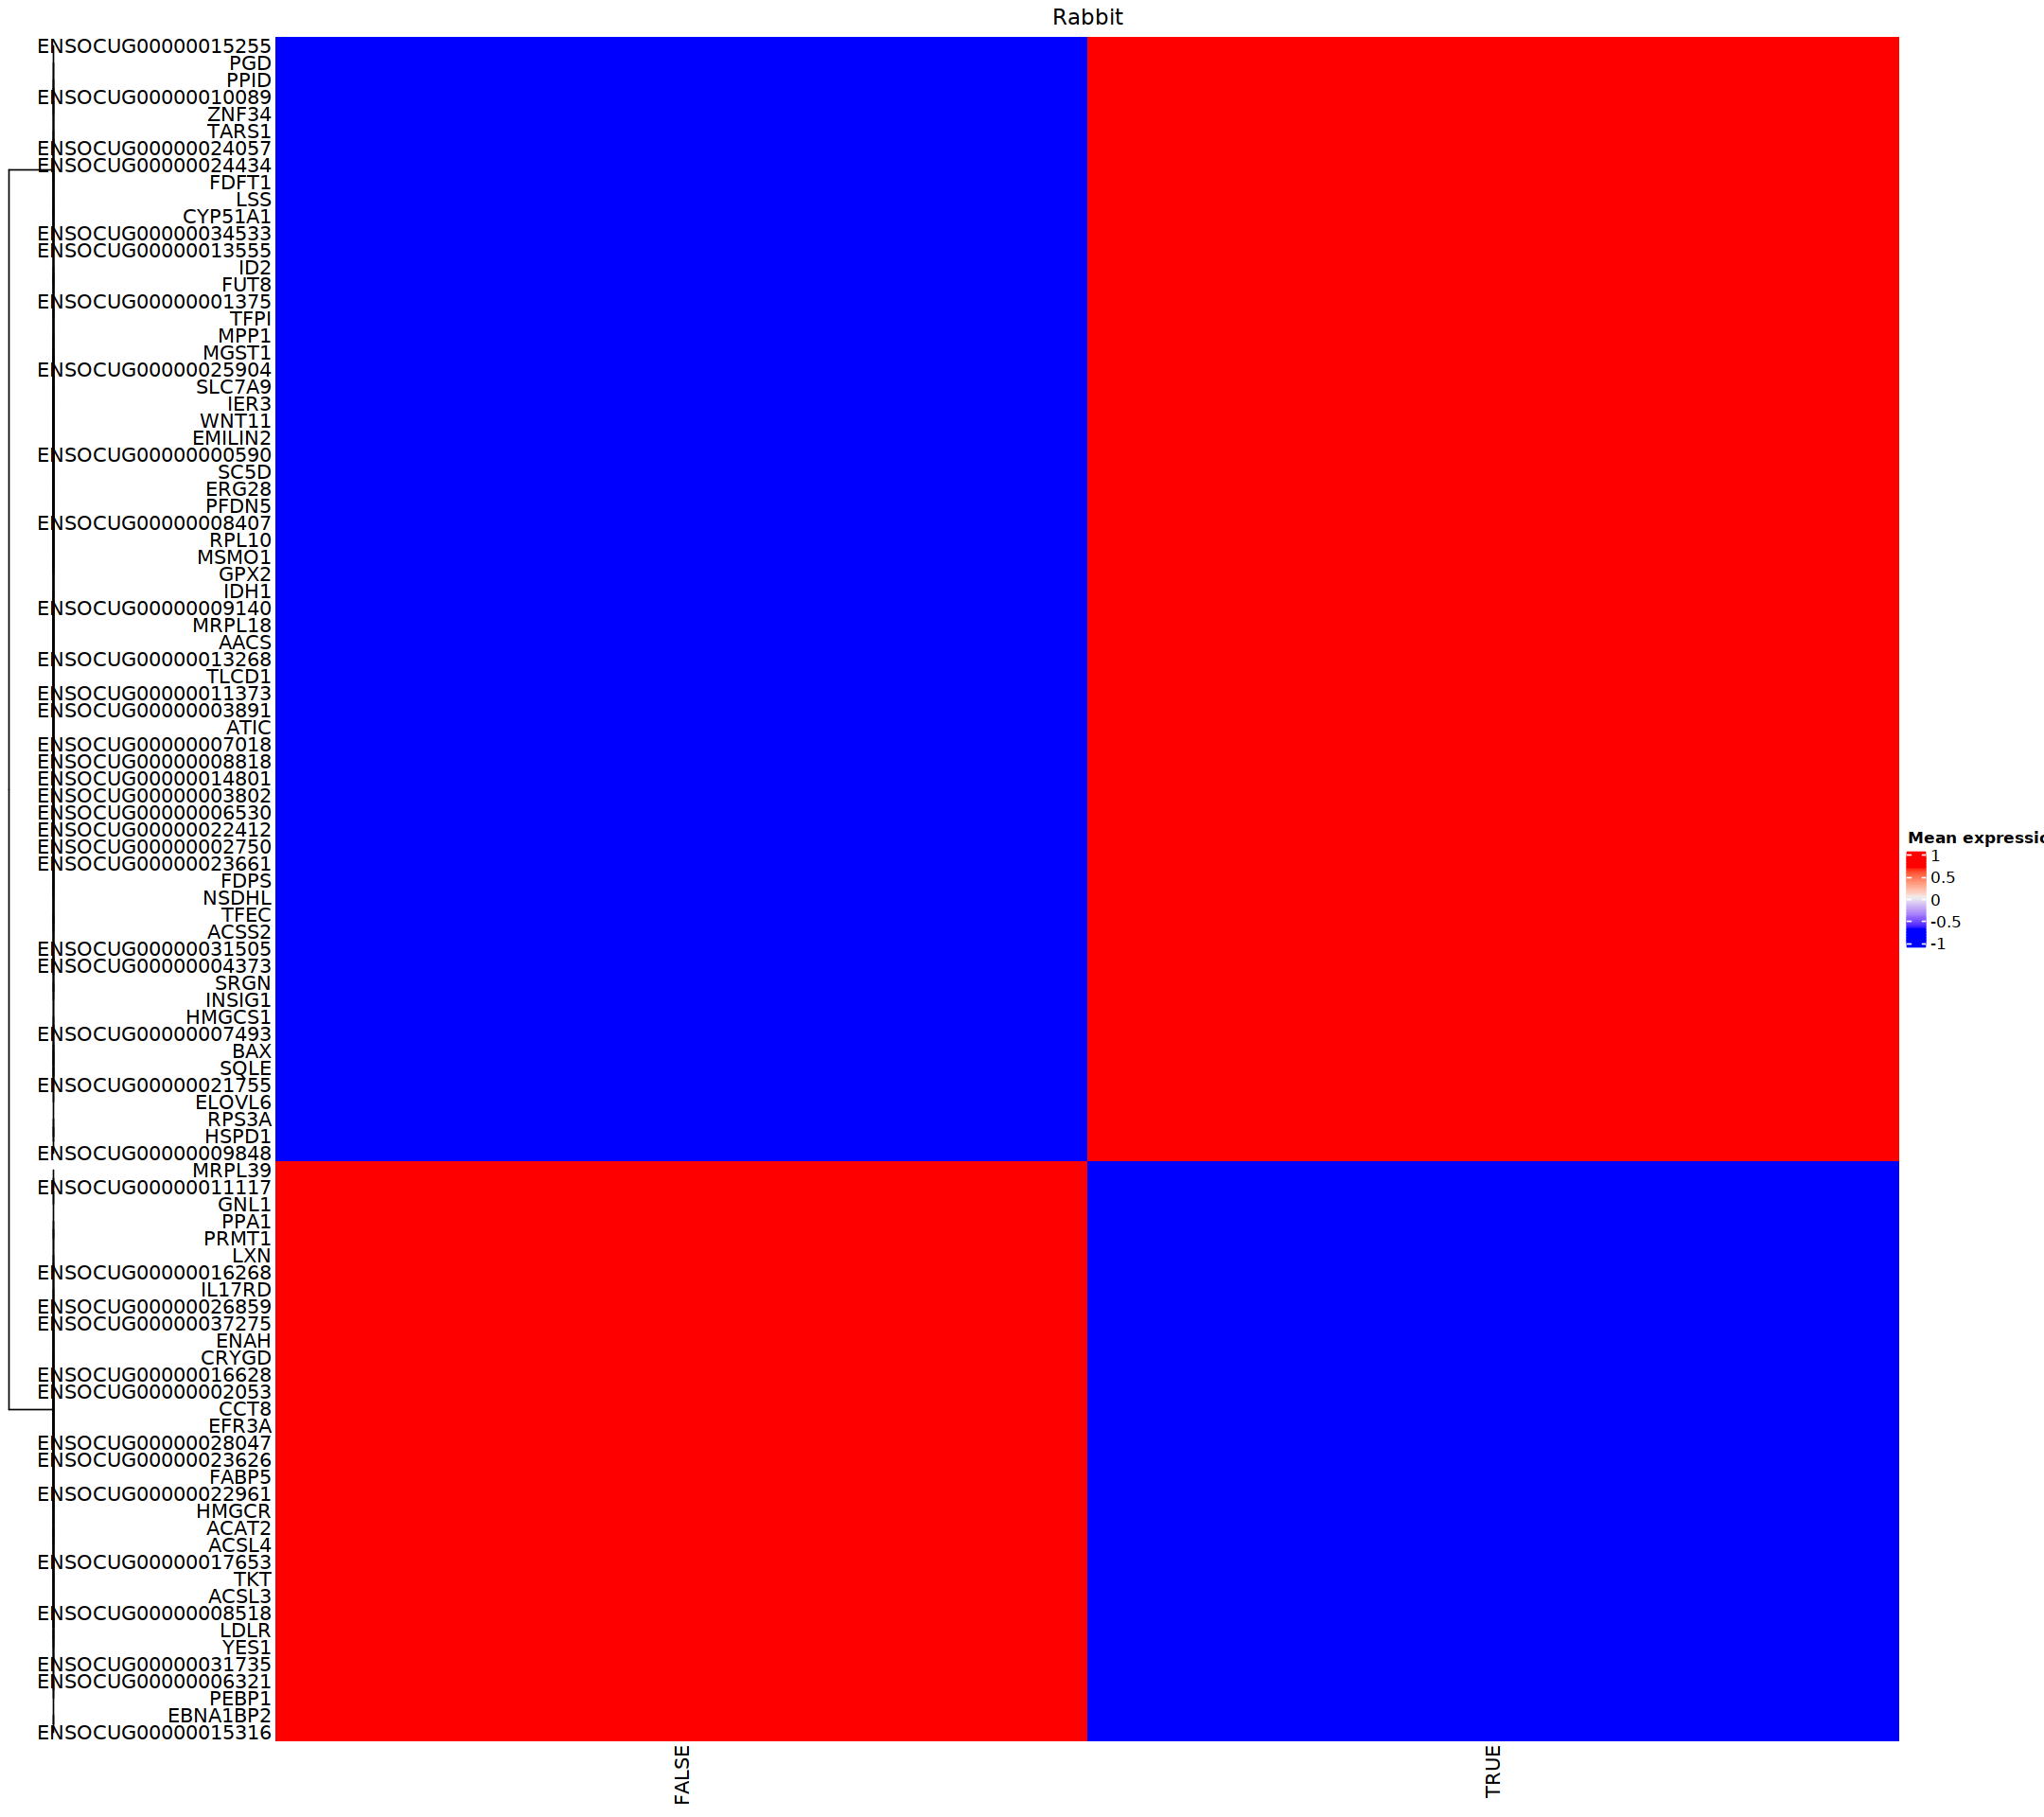

In [116]:
options(repr.plot.width=18, repr.plot.height=16)

r_hypo.exp <- getExpressionFast(r_data, query_genes[1:100], group_by="rabbit_specific",norm="z-scale")

Heatmap(r_hypo.exp,
        name = "Mean expression",
        cluster_rows = T,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit specific hypoblast",
        row_names_side = "left",
        row_labels = rownames(r_hypo.exp),
        row_gap = unit(10, "mm"))

In [74]:
enriched <- enrichr(query_genes, c("GO_Molecular_Function_2021","GO_Biological_Process_2021","MSigDB_Hallmark_2020"))


Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


ERROR: Error in plotEnrich(enriched, showTerms = 15, numChar = 60, y = "Count", : df is malformed - must be a data frame


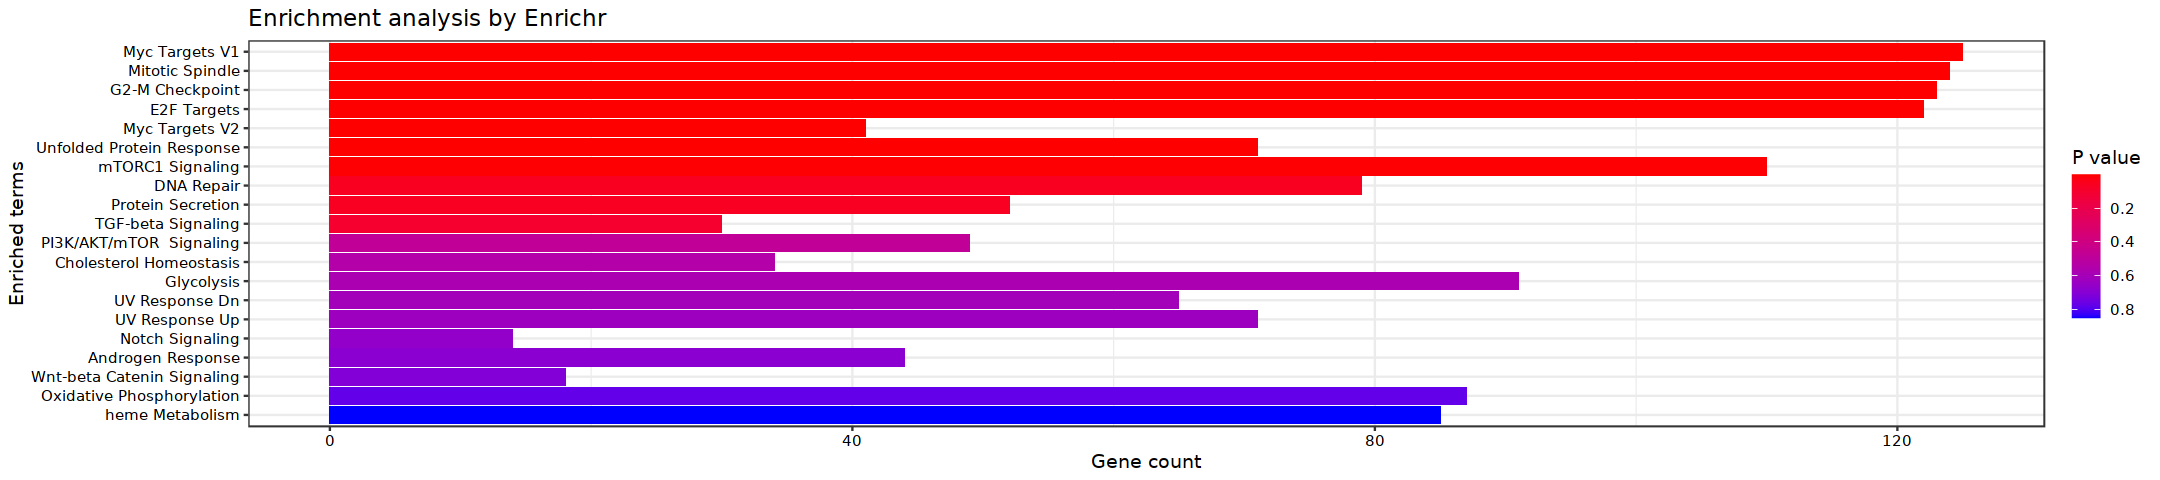

In [79]:
plotEnrich(enriched[[3]])

In [84]:
enriched[[3]][15:20,]

Term                       Overlap P.value   Adjusted.P.value Old.P.value
15 UV Response Up             71/158  0.6281905 0.9999955        0          
16 Notch Signaling            14/32   0.6624108 0.9999955        0          
17 Androgen Response          44/100  0.6859618 0.9999955        0          
18 Wnt-beta Catenin Signaling 18/42   0.7088249 0.9999955        0          
19 Oxidative Phosphorylation  87/200  0.7765479 0.9999955        0          
20 heme Metabolism            85/200  0.8524408 0.9999955        0          
   Old.Adjusted.P.value Odds.Ratio Combined.Score
15 0                    0.9608088  0.4466914     
16 0                    0.9158609  0.3772150     
17 0                    0.9249766  0.3486545     
18 0                    0.8830460  0.3038974     
19 0                    0.9058330  0.2290824     
20 0                    0.8692642  0.1387793     
   Genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
15 H2AX;BTG3;FEN1;BTG2;ALAS1;BTG1;TFRC;CLTB;HNRNPU;AQP3;GLS;CCND3;HTR7;SPR;UROD;PPAT;CASP3;HYAL2;KCNH2;STARD3;RFC4;PRKCD;SIGMAR1;FOS;RHOB;CDC34;POLG2;TST;PRPF3;PPIF;TYRO3;IL6ST;FKBP4;TARS1;SQSTM1;ATF3;NUP58;RRAD;MAOA;RPN1;TGFBRAP1;CEBPG;DDX21;FURIN;CLCN2;HSPA13;RXRB;CYB5R1;STIP1;NXF1;PPP1R2;BCL2L11;EPCAM;BAK1;POLR2H;NKX2-5;ATP6V1C1;MARK2;KLHDC3;ASNS;CDC5L;PDAP1;HSPA2;NFKBIA;NR4A1;BMP2;EIF5;PSMC3;AGO2;POLE3;PPT1                                                                                                                                        
16 NOTCH3;FBXW11;PSEN2;CUL1;DTX2;PRKCA;SAP30;APH1A;LFNG;KAT2A;HES1;ST3GAL6;SKP1;PPARD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
17 SLC26A2;INSIG1;ABHD2;SRF;NGLY1;STK39;GNAI3;PTPN21;UAP1;HMGCR;NDRG1;CDC14B;UBE2J1;ELK4;AKAP12;LMAN1;CCND3;ANKH;PGM3;DNAJB9;PTK2B;ITGAV;RRP12;PDLIM5;SLC38A2;RAB4A;XRCC6;HMGCS1;HOMER2;XRCC5;NCOA4;ZBTB10;SORD;ARID5B;DHCR24;ACSL3;PIAS1;CDK6;APPBP2;CENPN;SGK1;SEC24D;PLPP1;FKBP5                                                                                                                                                                                                                                                                                   
18 HDAC5;HDAC2;WNT5B;MAML1;TCF7;PSEN2;CUL1;AXIN2;RBPJ;DKK1;NKD1;KAT2A;HEY1;HEY2;DVL2;NUMB;CTNNB1;PPARD                                                                                                                                                                                                                                                                                                                                                                                                                                                                
19 MRPS15;SLC25A3;MTRR;ALAS1;MRPS11;MRPS12;HCCS;ETFA;PHB2;MRPL35;MTRF1;AIFM1;OPA1;MPC1;IDH3B;ACADM;DLAT;IDH3A;TOMM70;PDHX;ATP6V0E1;MRPS22;SDHB;SUPV3L1;AFG3L2;OXA1L;POR;NDUFS4;UQCRC1;VDAC3;NDUFS3;VDAC2;NDUFS2;SUCLG1;NDUFS1;SLC25A11;FXN;ISCU;OAT;RETSAT;NDUFB6;ABCB7;NDUFB5;TIMM9;ETFDH;ATP5MC3;HTRA2;MRPL15;TIMM10;MRPS30;PDHB;COX5A;HSD17B10;MRPL11;ACAT1;TIMM50;L

In [16]:
r_data$celltype_temp <- r_data$celltype
r_data$celltype_temp[r_data$celltype == "Hypoblast" & r_data$rabbit_specific] <- "Hypoblast_Query"
markers_all <- scran::findMarkers(r_data,groups=r_data$celltype_temp, pval.type="all",direction="up")


In [118]:
rownames(markers$Hypoblast_Query)[1:100]

NULL

In [67]:
r_data$hypo_query <- "Other"
r_data$hypo_query[r_data$celltype == "Hypoblast" & r_data$rabbit_specific] <- "Hypoblast_Query"
r_data$hypo_query[r_data$celltype == "Hypoblast" & !r_data$rabbit_specific] <- "Hypoblast"

hypo_query.markers <- scran::findMarkers(r_data,groups=r_data$hypo_query, pval.type="all",direction="up")


In [123]:
rownames(hypo_query.markers$Hypoblast_Query)[1:100]

[1] "HMGCS1"             "FDPS"               "NSDHL"             
  [4] "ACAT2"              "ENSOCUG00000001375" "SQLE"              
  [7] "CYP51A1"            "ENSOCUG00000015316" "INSIG1"            
 [10] "MSMO1"              "ENSOCUG00000023661" "TFEC"              
 [13] "TFPI"               "ENSOCUG00000002750" "ACSL4"             
 [16] "HMGCR"              "ENSOCUG00000022412" "SRGN"              
 [19] "ENSOCUG00000007493" "ENSOCUG00000009848" "FABP5"             
 [22] "ENSOCUG00000006530" "FDFT1"              "ENSOCUG00000023626"
 [25] "LDLR"               "GPX2"               "ENSOCUG00000034533"
 [28] "RPL10"              "ENSOCUG00000008407" "ENSOCUG00000014801"
 [31] "ENSOCUG00000031505" "FUT8"               "ENSOCUG00000008818"
 [34] "PFDN5"              "ENSOCUG00000024057" "ELOVL6"            
 [37] "ERG28"              "IL17RD"             "SC5D"              
 [40] "ENSOCUG00000010089" "ENSOCUG00000031735" "LSS"               
 [43] "ENSOCUG00000000590" "EMILIN2"            "GNL1"              
 [46] "ACSS2"              "ATIC"               "EFR3A"             
 [49] "YES1"               "PEBP1"              "RPS3A"             
 [52] "ENSOCUG00000003891" "ENSOCUG00000008518" "WNT11"             
 [55] "MGST1"              "ENSOCUG00000004373" "ENSOCUG00000011373"
 [58] "BAX"                "PPID"               "TLCD1"             
 [61] "LXN"                "ENSOCUG00000002053" "ENSOCUG00000024434"
 [64] "ACSL3"              "ENSOCUG00000013555" "ENSOCUG00000021755"
 [67] "ENSOCUG00000025904" "ENSOCUG00000013268" "PGD"               
 [70] "MRPL39"             "AACS"               "ENSOCUG00000003802"
 [73] "MRPL18"             "IER3"               "SLC7A9"            
 [76] "MPP1"               "HSPD1"              "CRYGD"             
 [79] "IDH1"               "ID2"                "ENSOCUG00000026859"
 [82] "ENSOCUG00000017653" "ENSOCUG00000011529" "HSPA9"             
 [85] "RGS14"              "EBNA1BP2"           "ENSG00000122224"   
 [88] "PRXL2A"             "PDHA1"              "ENSOCUG00000030756"
 [91] "KYAT3"              "AMOTL1"             "COMTD1"            
 [94] "SLC10A4"            "ENSOCUG00000016268" "ENSOCUG00000011557"
 [97] "BMP2"               "MANF"               "PDHB"              
[100] "MIPOL1"

In [130]:
hypo_query.markers$Hypoblast_Query[10:20,1:5]

DataFrame with 11 rows and 5 columns
                        p.value          FDR summary.logFC logFC.Hypoblast
                      <numeric>    <numeric>     <numeric>       <numeric>
MSMO1               0.00000e+00  0.00000e+00      1.603546        1.603546
ENSOCUG00000023661  0.00000e+00  0.00000e+00      1.729248        1.729248
TFEC                0.00000e+00  0.00000e+00      1.650917        1.650917
TFPI                0.00000e+00  0.00000e+00      1.758815        1.758815
ENSOCUG00000002750  0.00000e+00  0.00000e+00      1.308201        1.308201
ACSL4               0.00000e+00  0.00000e+00      0.759950        0.759950
HMGCR               0.00000e+00  0.00000e+00      0.921024        0.921024
ENSOCUG00000022412 6.92341e-316 1.25130e-312      1.057476        1.057476
SRGN               8.83125e-316 1.50745e-312      1.484154        1.484154
ENSOCUG00000007493 7.01306e-314 1.13409e-310      0.637571        0.637571
ENSOCUG00000009848 7.56100e-309 1.16156e-305      1.064849     

In [131]:
hypo_query.markers$Hypoblast_Query["BMP2",1:5]

DataFrame with 1 row and 5 columns
         p.value          FDR summary.logFC logFC.Hypoblast logFC.Other
       <numeric>    <numeric>     <numeric>       <numeric>   <numeric>
BMP2 4.1103e-145 1.30195e-142      0.641383        0.641383     1.03125

In [ ]:
markers$Hypoblast_Query$logFC.Mesenchyme

In [38]:
rownames(markers$Hypoblast_Query[abs(markers$Hypoblast_Query$logFC.Mesenchyme) < 0.5,])[1:50]

[1] "PAPPA"              "ENSOCUG00000027176" "ENSOCUG00000030756"
 [4] "TMEM97"             "ENSOCUG00000033876" "CCDC134"           
 [7] "ENSG00000164983"    "ENSOCUG00000026252" "SMIM4"             
[10] "ENSOCUG00000005442" "TARBP1"             "ENSOCUG00000008933"
[13] "LRRC28"             "ENSOCUG00000022250" "ENSOCUG00000024434"
[16] "CTSC"               "MPPED2"             "AACS"              
[19] "SLC31A1"            "LMBRD1"             "MS4A13"            
[22] "PDHX"               "SNRPC"              "AMOTL1"            
[25] "ENSOCUG00000021439" "BCO2"               "ENSOCUG00000000179"
[28] "LAMTOR3"            "LRATD2"             "ENSOCUG00000008266"
[31] "C9orf85"            "ENSOCUG00000029474" "ENSOCUG00000034533"
[34] "ENSOCUG00000013162" "SLC25A15"           "PGD"               
[37] "ACSM3"              "ECHDC1"             "DNAJC6"            
[40] "ENSOCUG00000025086" "ENSOCUG00000017490" "ETFDH"             
[43] "ENSOCUG00000027438" "TMEM126A"           "UBA5"              
[46] "IDH3B"              "DDX1"               "ENSOCUG00000028075"
[49] "ENSOCUG00000021494" "PCCB"

In [35]:
markers$Hypoblast_Query[order(markers$Hypoblast_Query$logFC.Allantois),1:3]

DataFrame with 30725 rows and 3 columns
                     p.value       FDR summary.logFC
                   <numeric> <numeric>     <numeric>
PEG10                      1         1      -3.47321
ENSOCUG00000026099         1         1      -3.31440
VIM                        1         1      -3.25545
TPM1                       1         1      -3.13853
COL3A1                     1         1      -3.10009
...                      ...       ...           ...
APOC1                      1         1     -1.563498
ENSOCUG00000010524         1         1     -2.404218
CPS1                       1         1     -0.297867
DAB2                       1         1     -0.391827
APOA1                      1         1     -1.547070

In [33]:
markers$Hypoblast_Query["BMP2","logFC.Allantois"]

[1] 0.4902598

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



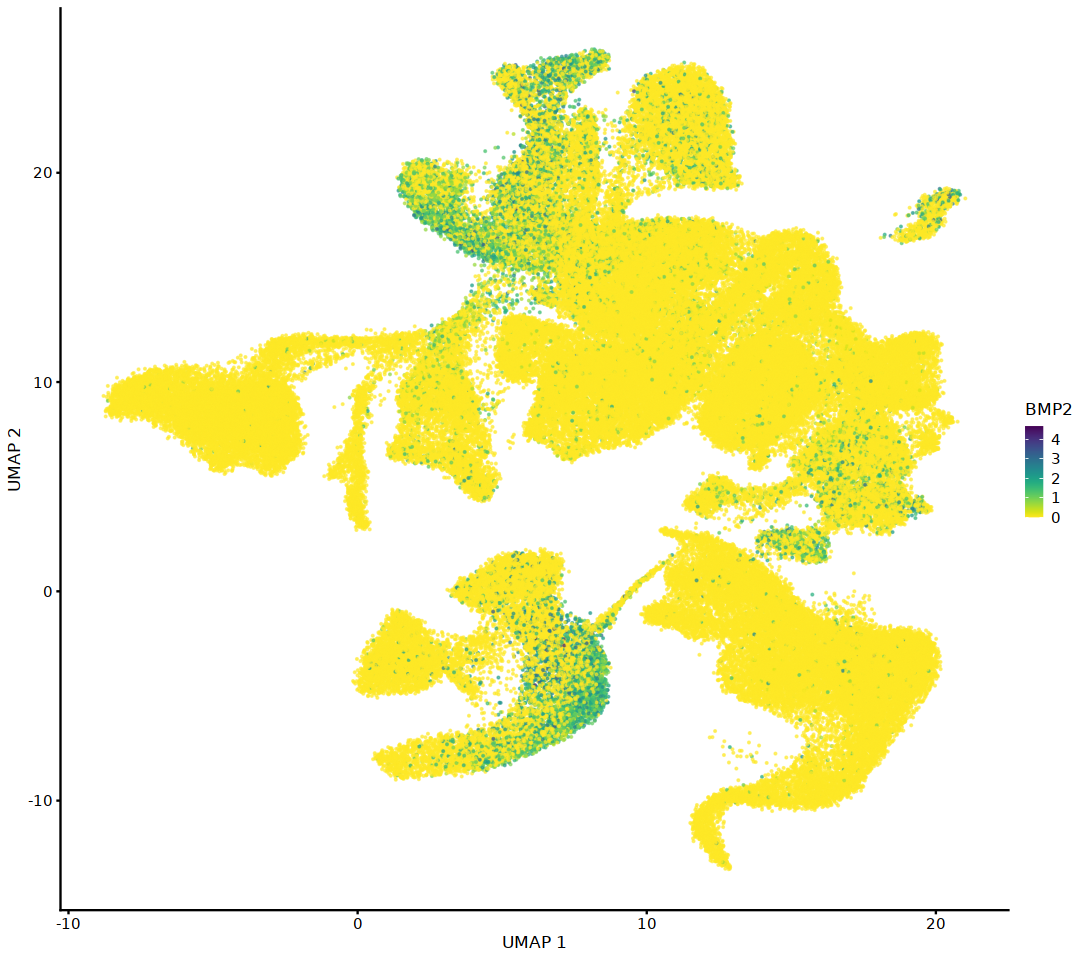

In [136]:
options(repr.plot.width=9, repr.plot.height=8)
plotReducedDim(r_data, "UMAP", colour_by="BMP2",point_size=0.1) + scale_colour_viridis("BMP2",direction=-1)

In [47]:
rownames(markers$Hypoblast_Query)[1:50]

[1] "GPX2"               "TFEC"               "WNT11"             
 [4] "COMTD1"             "PAPPA"              "ENSOCUG00000006530"
 [7] "ENSOCUG00000010360" "ENSOCUG00000011557" "HMGCS1"            
[10] "TLCD1"              "FDPS"               "DPEP1"             
[13] "ENSOCUG00000027176" "COX5A"              "NSDHL"             
[16] "AGMAT"              "ACAT2"              "MTFP1"             
[19] "SQLE"               "STARD4"             "HNF1B"             
[22] "TIMM8B"             "MFSD1"              "RGS14"             
[25] "ATP1B3"             "SLC25A16"           "MRPS36"            
[28] "SUCLG1"             "SLC9A3R1"           "ENSOCUG00000009713"
[31] "ENSOCUG00000009574" "CYP51A1"            "ENSOCUG00000034419"
[34] "ENSOCUG00000030756" "NDUFAB1"            "PISD"              
[37] "INSIG1"             "ENSG00000187569"    "TMEM97"            
[40] "BMP2"               "MTX1"               "MTCH2"             
[43] "NDUFAF6"            "ENSOCUG00000023816" "ENSOCUG00000033876"
[46] "NIPSNAP2"           "ENSOCUG00000028032" "ENSOCUG00000029140"
[49] "ENSOCUG00000031606" "MRPS28"

In [127]:
markers$Hypoblast_Query

NULL

ERROR: Error in parse(text = x, srcfile = src): <text>:1:81: unexpected '>'
1: rownames(hypo_query.markers$Hypoblast_Query[hypo_query.markers$Hypoblast_Query$ >
                                                                                    ^


In [44]:
r_hypo.exp <- getExpressionFast(r_data, rownames(markers$Hypoblast_Query)[1:50], norm="min-max")

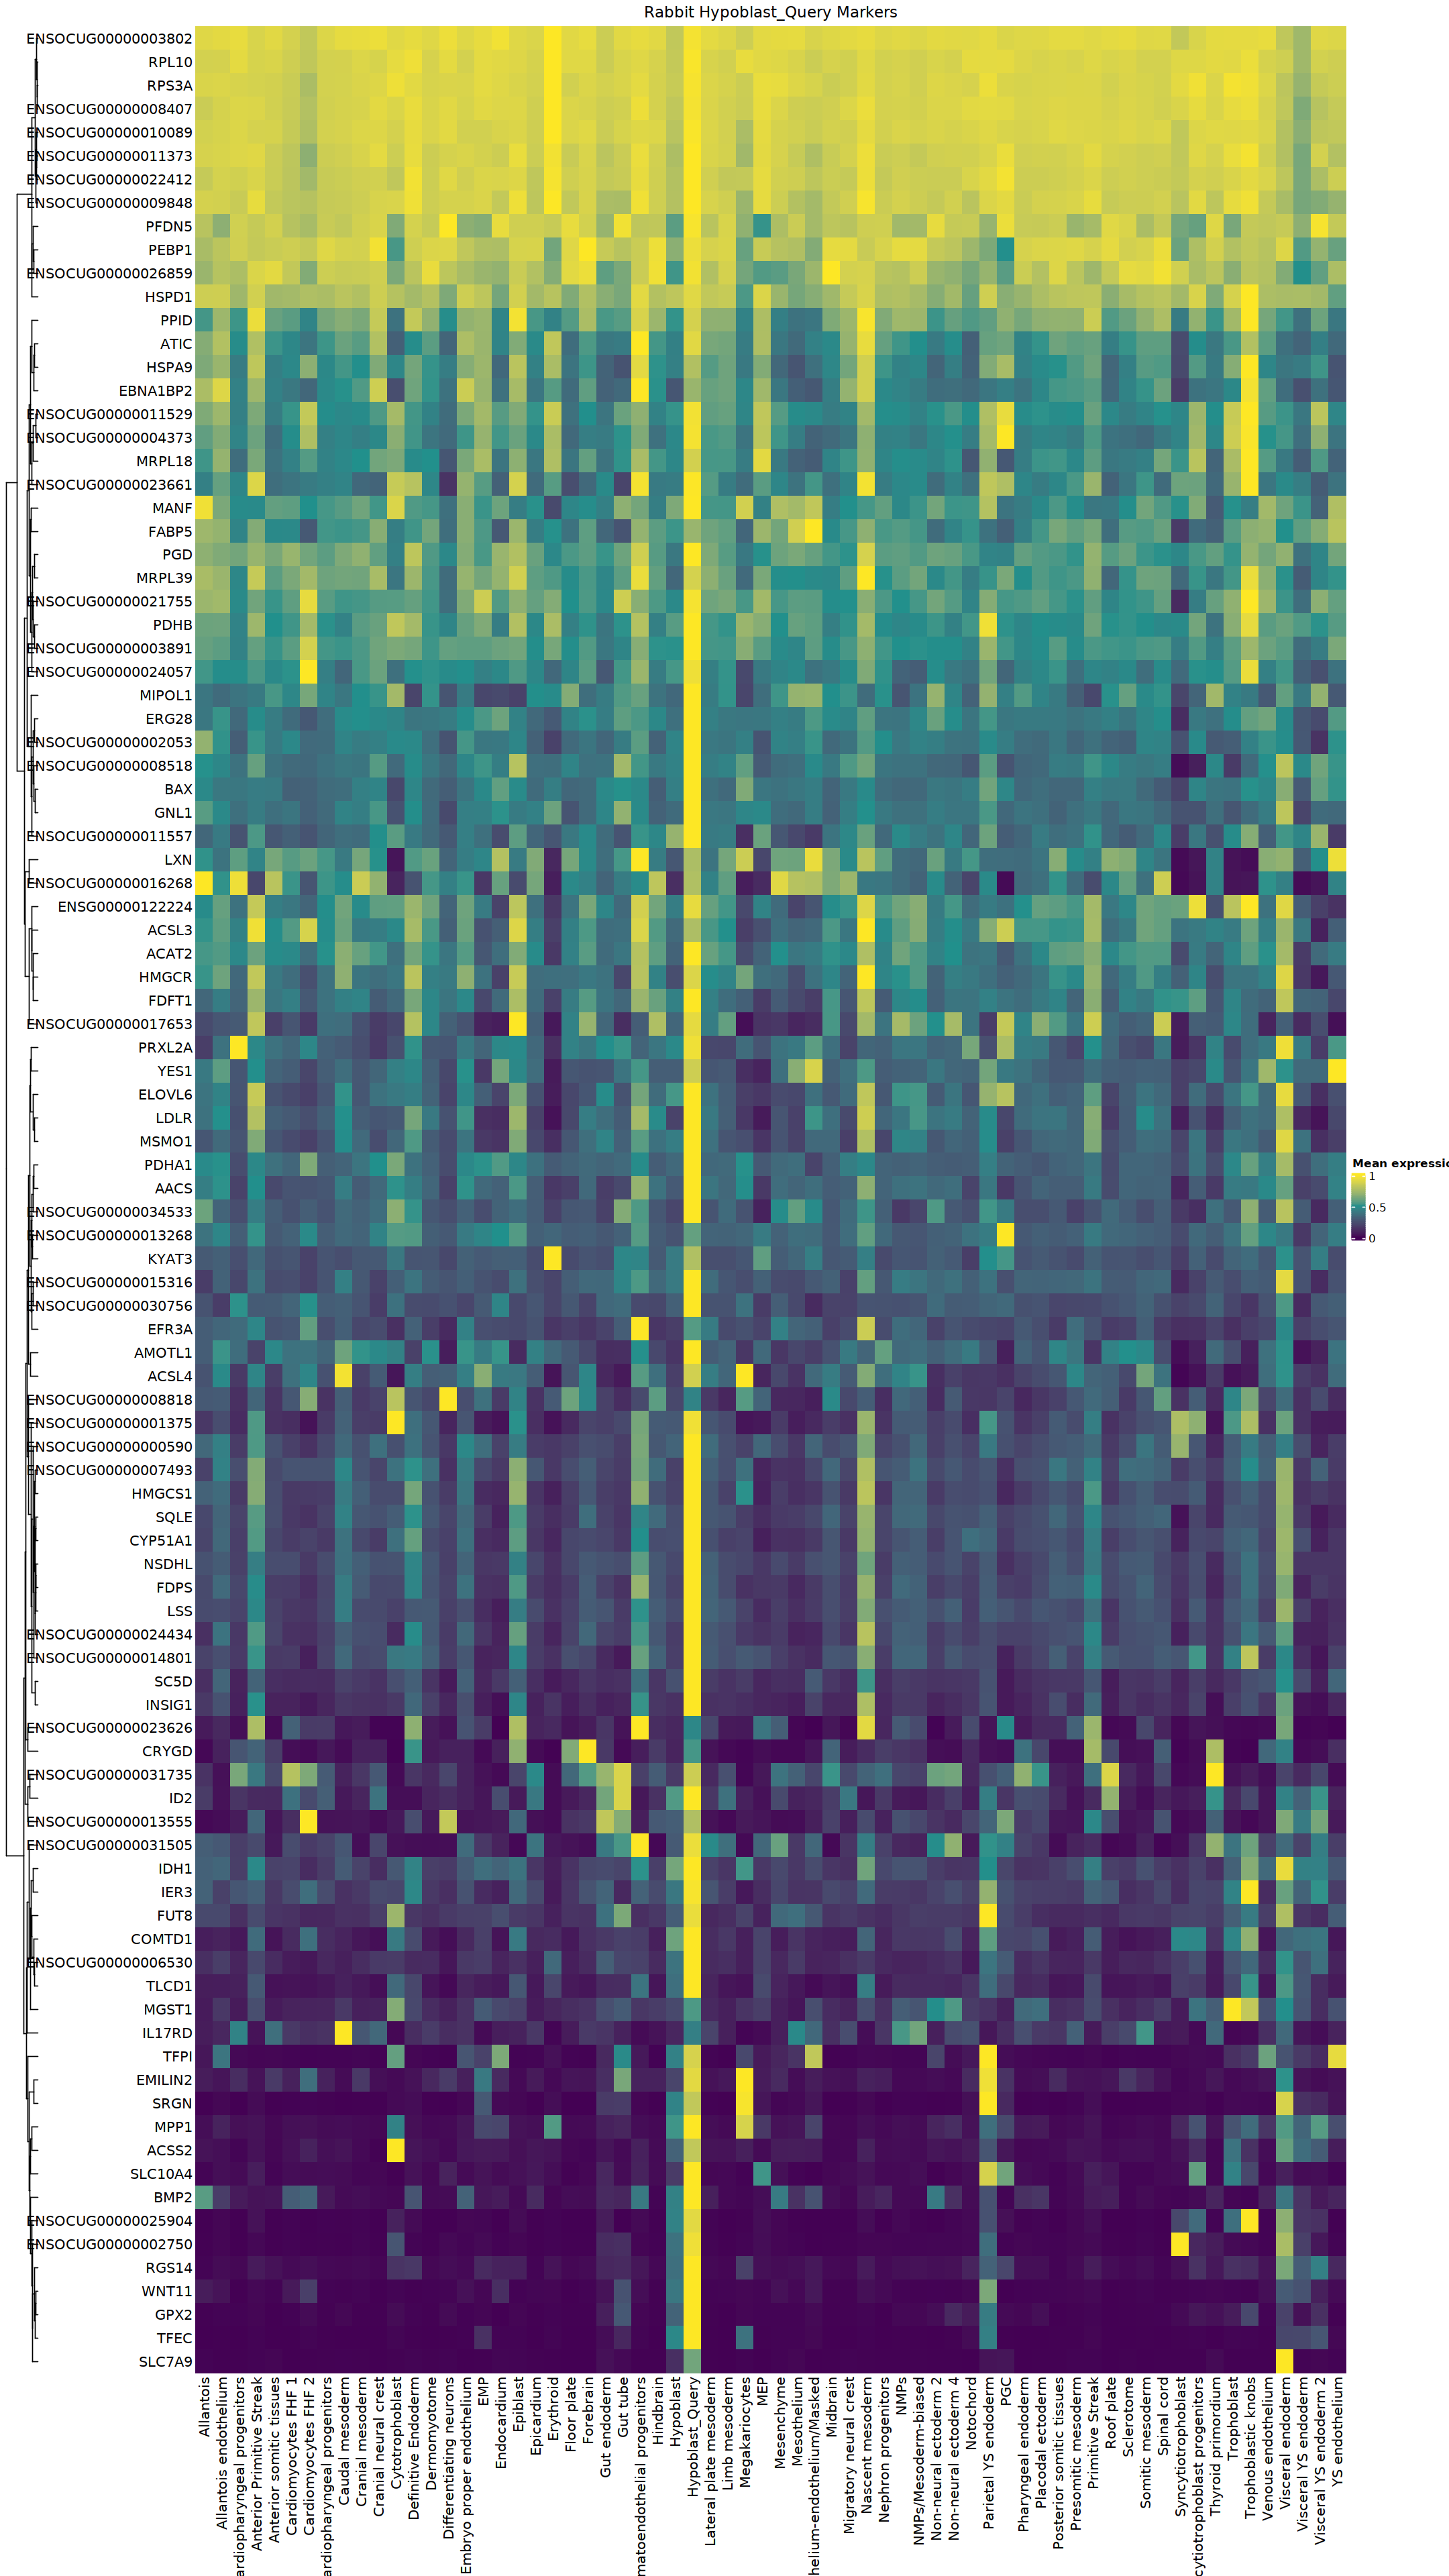

In [133]:
options(repr.plot.width=18, repr.plot.height=32)

r_hypo.exp <- getExpressionFast(r_data, rownames(hypo_query.markers$Hypoblast_Query)[1:100], group_by="celltype_temp",norm="min-max")

Heatmap(r_hypo.exp,
        name = "Mean expression",
        cluster_rows = T,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit Hypoblast_Query Markers",
        row_names_side = "left",
        row_labels = rownames(r_hypo.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))

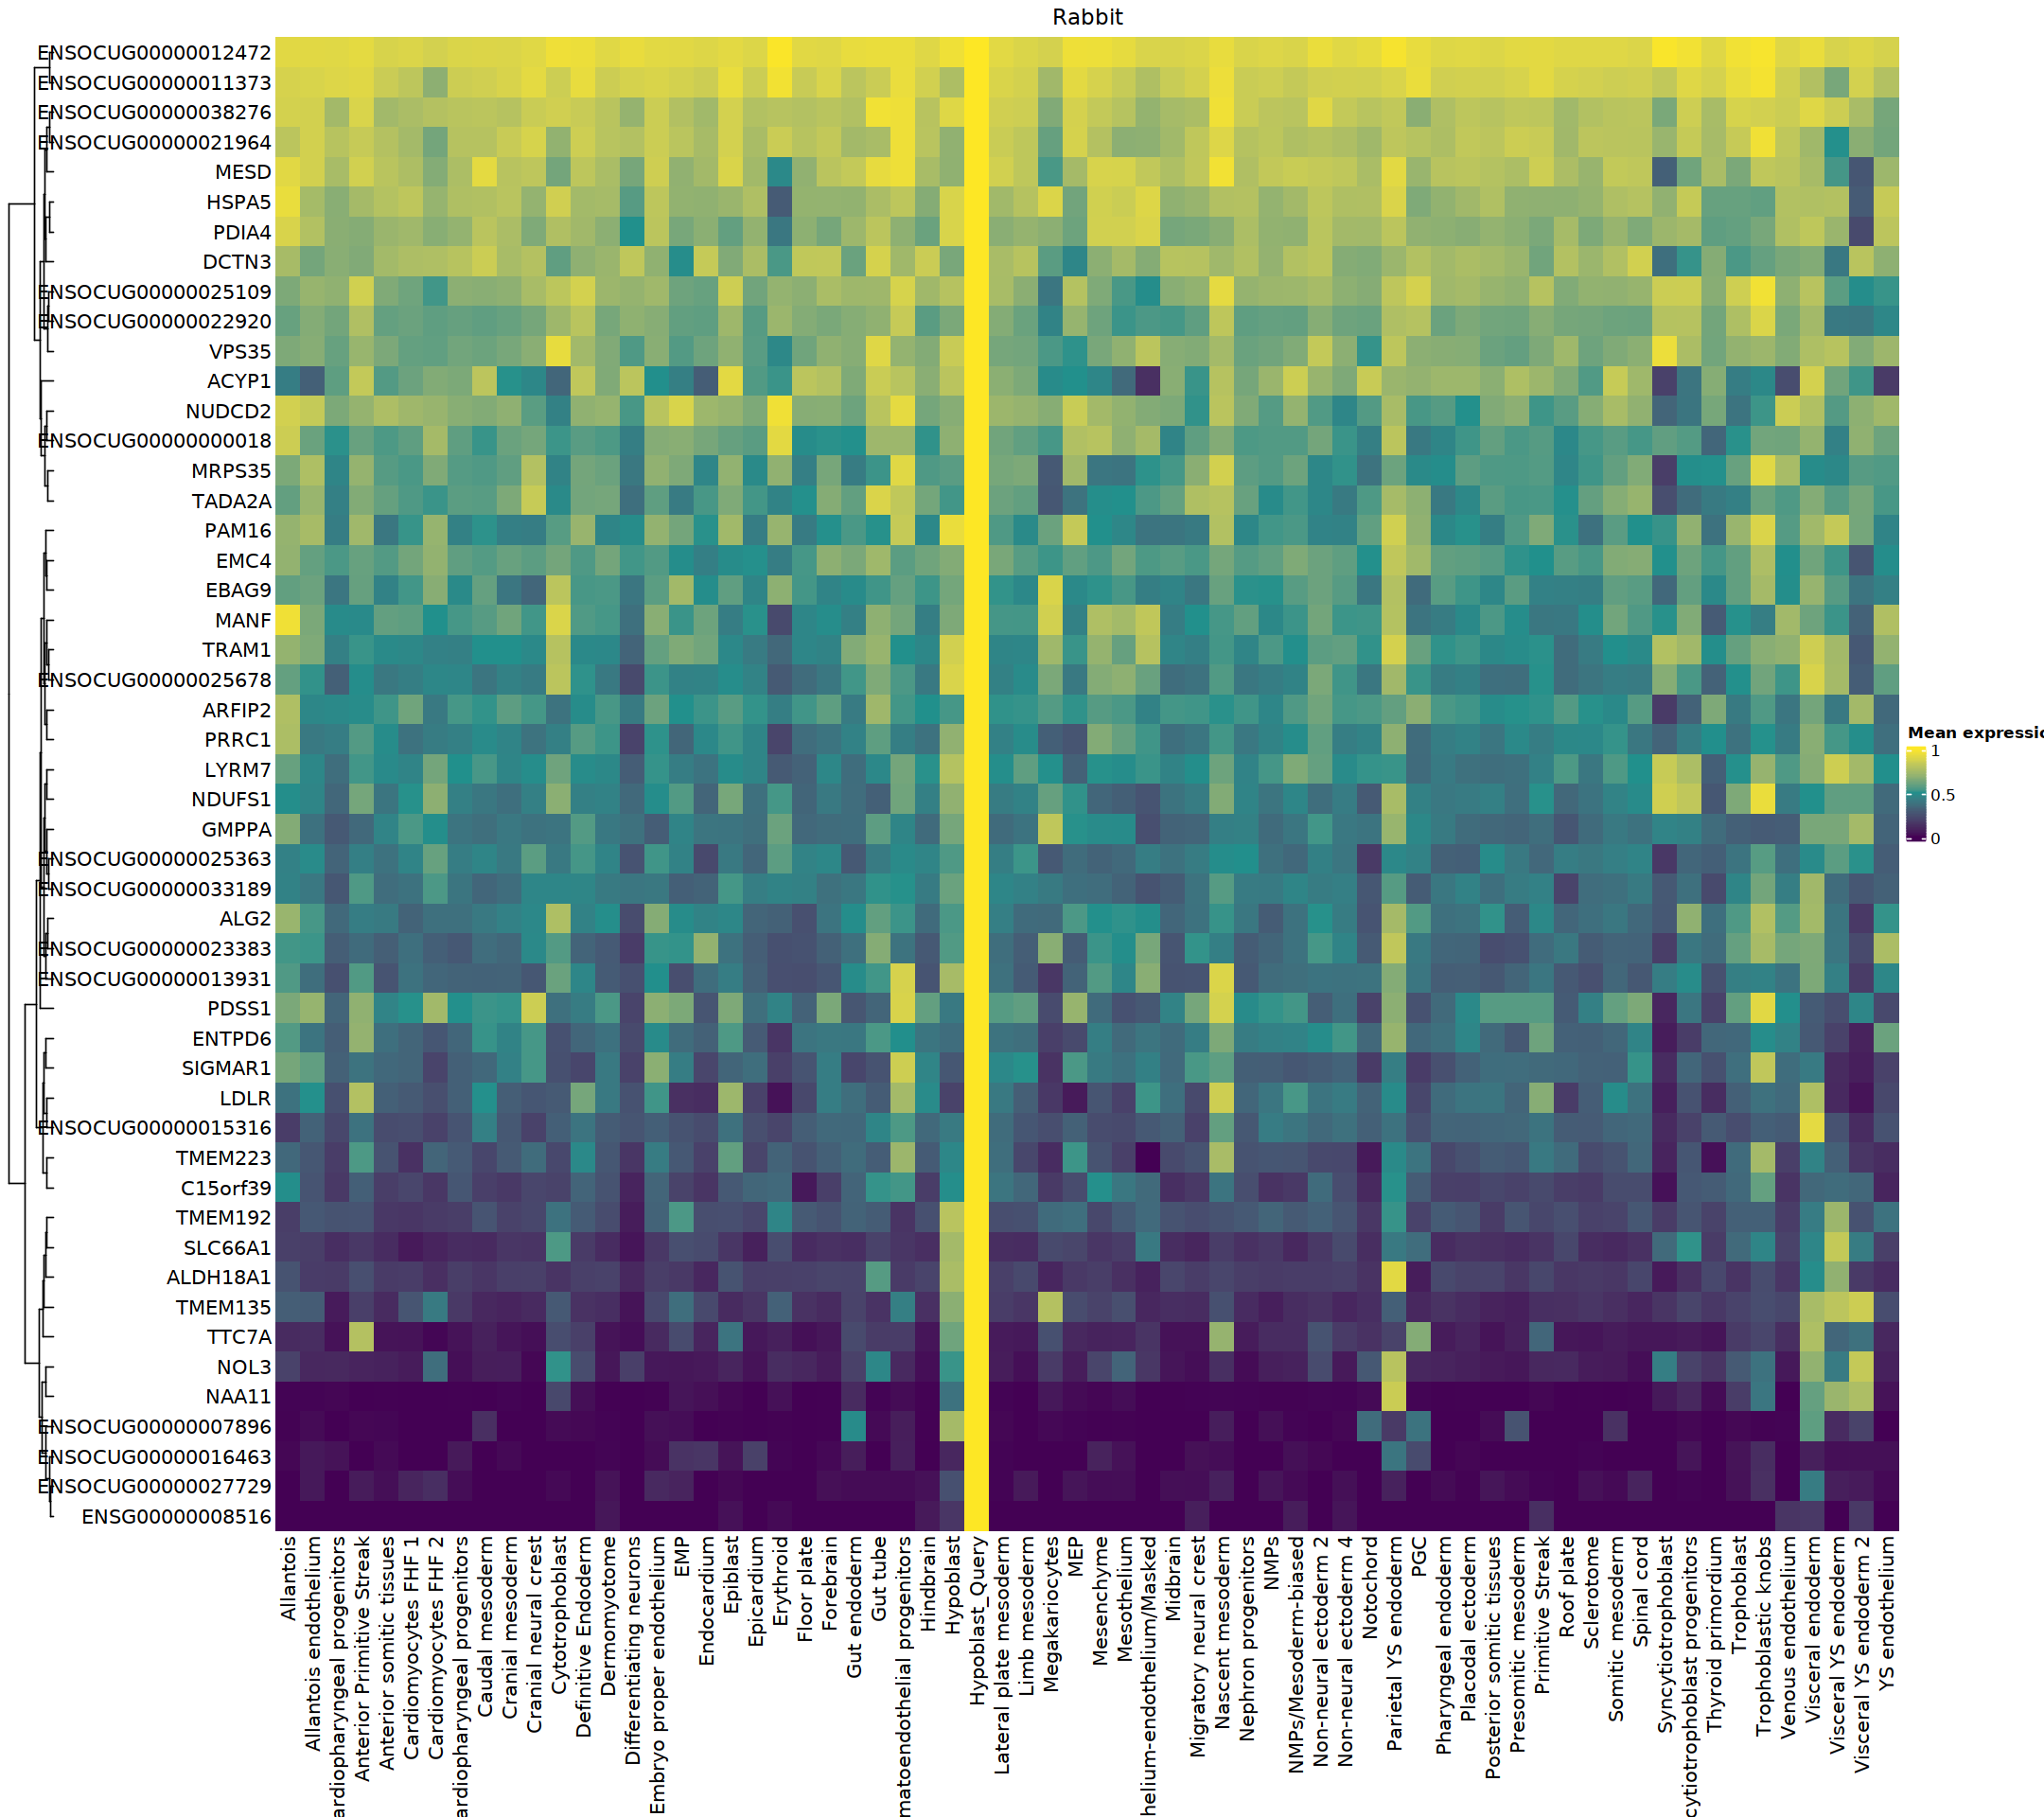

In [62]:
options(repr.plot.width=18, repr.plot.height=16)

r_hypo.exp <- getExpressionFast(r_data, rownames(markers$Hypoblast_Query)[201:250], group_by="celltype_temp", norm="min-max")

Heatmap(r_hypo.exp,
        name = "Mean expression",
        cluster_rows = T,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit",
        row_names_side = "left",
        row_labels = rownames(r_hypo.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))

In [60]:
markers$Hypoblast_Query[200:210,1:3]

DataFrame with 11 rows and 3 columns
                       p.value       FDR summary.logFC
                     <numeric> <numeric>     <numeric>
MYOT               0.000102120 0.0156881     0.0140339
TMEM192            0.000105026 0.0160544     0.0593244
ENSOCUG00000021964 0.000107562 0.0163607     0.0978289
PDIA4              0.000125518 0.0189978     0.3249327
HSPA5              0.000127212 0.0191597     0.3947044
ENSOCUG00000025678 0.000130168 0.0195094     0.1676829
ENSOCUG00000012472 0.000134667 0.0200856     0.0640148
ENSOCUG00000027729 0.000141205 0.0209590     0.0247131
ALDH18A1           0.000143885 0.0212542     0.0819032
TTC7A              0.000145542 0.0213961     0.2233932
ENSOCUG00000038276 0.000149029 0.0218044     0.1033112

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



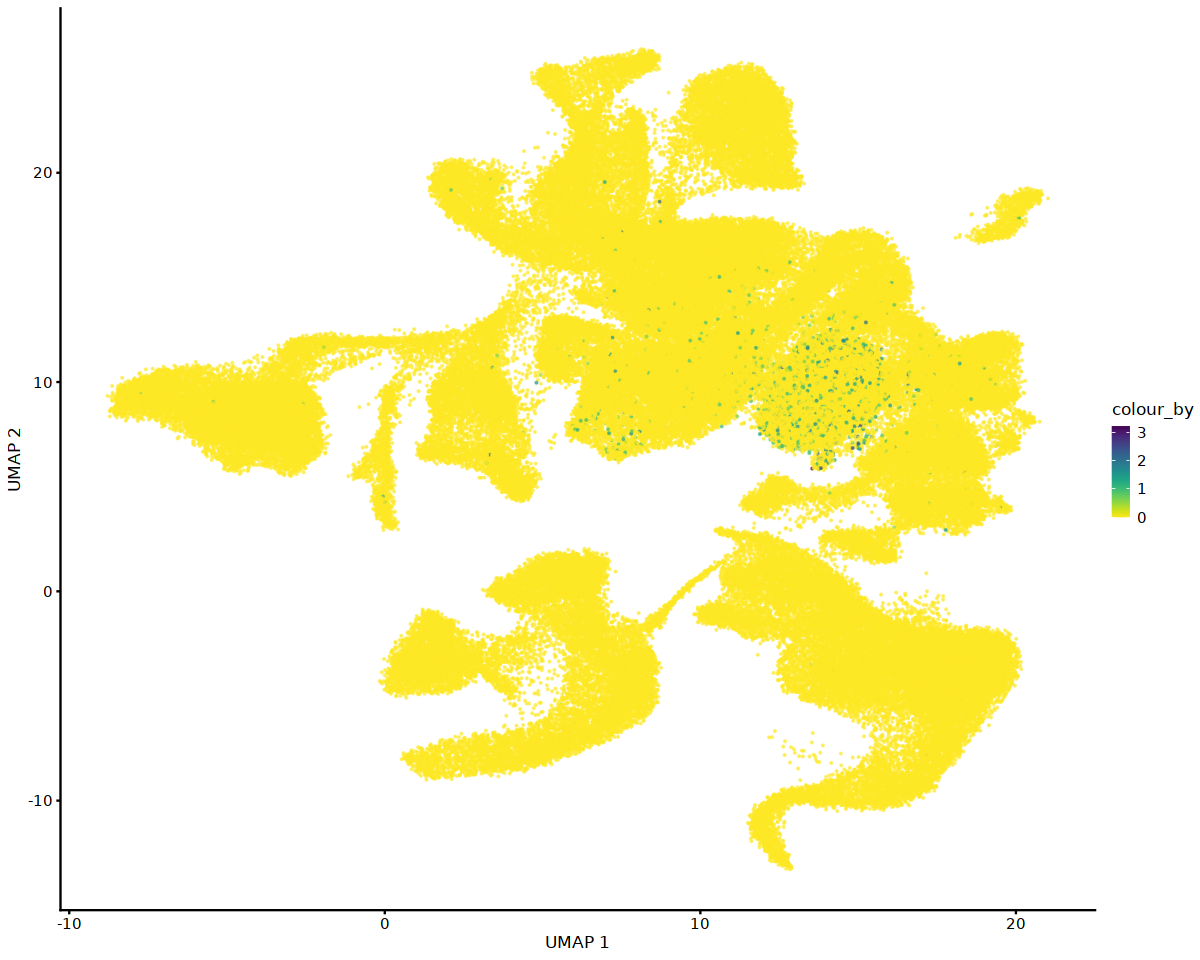

In [88]:
options(repr.plot.width=10, repr.plot.height=8)

plotReducedDim(r_data, "UMAP", colour_by="NKX6-1",point_size=0.1) + scale_colour_viridis(direction=-1)

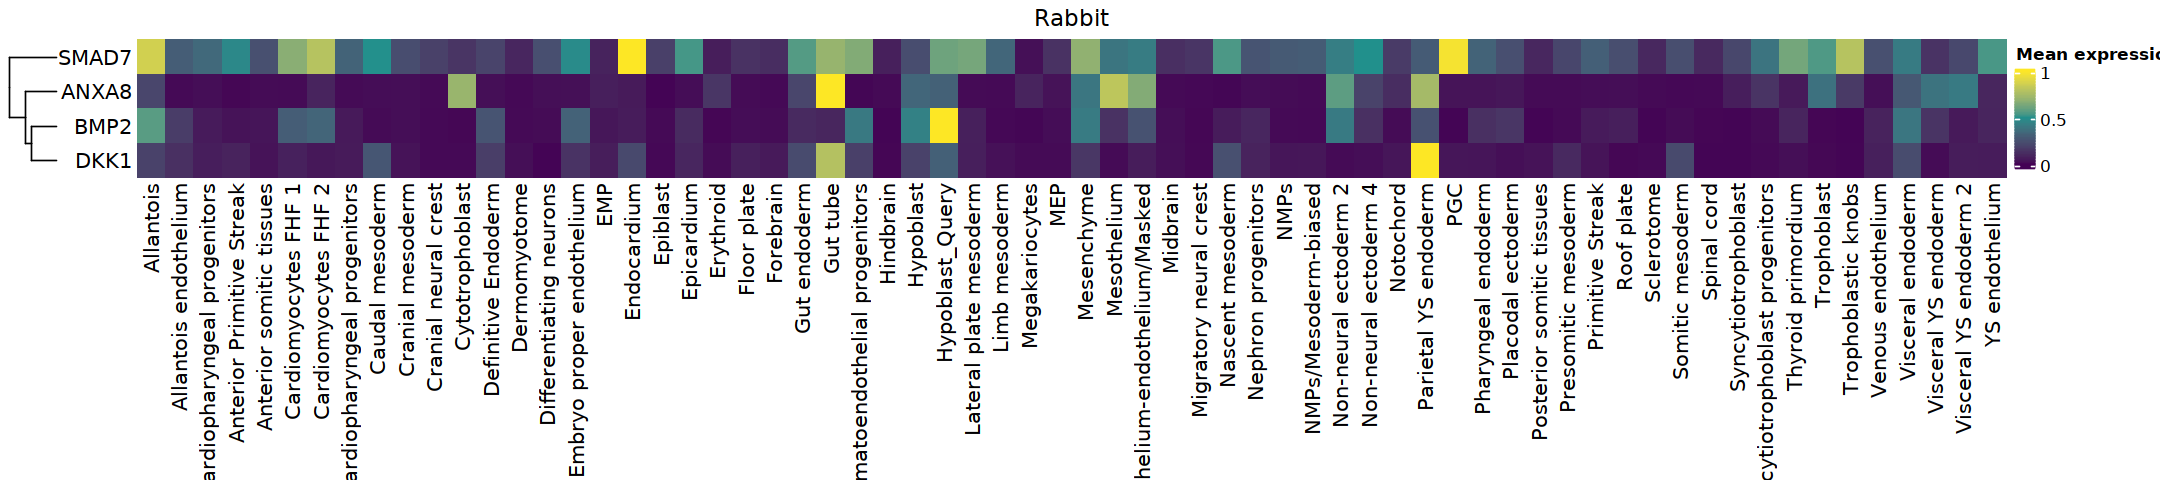

In [82]:
options(repr.plot.width=18, repr.plot.height=4)

r_hypo.exp <- getExpressionFast(r_data, c("BMP2", "DKK1","ANXA8","SMAD7" ),group_by="celltype_temp", norm="min-max")

Heatmap(r_hypo.exp,
        name = "Mean expression",
        cluster_rows = T,
        cluster_columns = F,
        cluster_row_slices = F,
        cluster_column_slices=F,
        column_title = "Rabbit",
        row_names_side = "left",
        row_labels = rownames(r_hypo.exp),
        row_gap = unit(10, "mm"),
        col=circlize::colorRamp2(c(0,0.5,1),
                                 viridis(3,option="D")))

In [61]:
# Unique blood cluster
r_blood <- r_data[,r_data$celltype=="Erythroid"]
markers <- scran::findMarkers(r_blood,groups=r_blood$rabbit_specific, pval.type="all",direction="up")
markers[["TRUE"]][1:10,1:3]

DataFrame with 10 rows and 3 columns
                     p.value       FDR summary.logFC
                   <numeric> <numeric>     <numeric>
RPL17-C18orf32             0         0      1.878579
ENSOCUG00000010546         0         0      0.720907
ENSOCUG00000022961         0         0      1.516459
ENSOCUG00000008507         0         0      0.718256
ZNF34                      0         0      0.678669
ENSOCUG00000016657         0         0      1.733246
ENSOCUG00000013915         0         0      0.639232
ENSOCUG00000029357         0         0      0.816028
ENSOCUG00000002150         0         0      0.663263
ENSOCUG00000002862         0         0      0.687519

In [66]:
rownames(markers[["TRUE"]])[1:100]

[1] "RPL17-C18orf32"     "ENSOCUG00000010546" "ENSOCUG00000022961"
  [4] "ENSOCUG00000008507" "ZNF34"              "ENSOCUG00000016657"
  [7] "ENSOCUG00000013915" "ENSOCUG00000029357" "ENSOCUG00000002150"
 [10] "ENSOCUG00000002862" "ENSOCUG00000001606" "ENSOCUG00000007536"
 [13] "ENSOCUG00000003613" "ENSOCUG00000010363" "ELOA"              
 [16] "ENSOCUG00000011509" "ENSOCUG00000009091" "ENSOCUG00000024833"
 [19] "ENSOCUG00000007825" "ENSOCUG00000005749" "ENSOCUG00000012476"
 [22] "ENSOCUG00000003068" "ENSOCUG00000003802" "ENSOCUG00000005442"
 [25] "ENSOCUG00000022412" "PFDN5"              "ENSOCUG00000006370"
 [28] "ENSOCUG00000026627" "ENSOCUG00000017386" "RPL12"             
 [31] "ENSOCUG00000028015" "ENSOCUG00000012472" "RPS5"              
 [34] "ENSOCUG00000002506" "RPS3A"              "ENSOCUG00000008407"
 [37] "ENSOCUG00000023680" "ENSOCUG00000027712" "ENSOCUG00000026336"
 [40] "RPS25"              "ENSOCUG00000002996" "RPLP1"             
 [43] "ENSOCUG00000035553" "ENSOCUG00000002074" "ENSOCUG00000000179"
 [46] "RPL28"              "ENSOCUG00000010089" "ENSOCUG00000005536"
 [49] "GLNB2"              "ENSOCUG00000002791" "ENSOCUG00000010552"
 [52] "ENSOCUG00000015749" "ENSOCUG00000005938" "RPL10"             
 [55] "ENSOCUG00000004065" "RPL13A"             "ENSOCUG00000027435"
 [58] "ENSOCUG00000009848" "RPL14"              "ENSOCUG00000022355"
 [61] "ENSOCUG00000021439" "ENSOCUG00000037702" "ENSOCUG00000021220"
 [64] "RPL26"              "BTF3"               "RPL37"             
 [67] "AHSP"               "ENSOCUG00000033056" "UROD"              
 [70] "ENSOCUG00000022930" "ENSOCUG00000028092" "PHGDH"             
 [73] "ENSOCUG00000025050" "ENSOCUG00000028136" "ENSOCUG00000000851"
 [76] "ENSOCUG00000010855" "RPL24"              "ENSOCUG00000009140"
 [79] "RPS21"              "ENSOCUG00000004394" "ENSOCUG00000027423"
 [82] "ENSOCUG00000022250" "ENSOCUG00000011373" "ENSOCUG00000014878"
 [85] "B2M"                "ENSOCUG00000004424" "ENSOCUG00000023692"
 [88] "HBZ"                "ENSOCUG00000027459" "ENSOCUG00000021109"
 [91] "RFESD"              "RPL32"              "ENSOCUG00000032278"
 [94] "LDHB"               "IDH2"               "EIF4EBP1"          
 [97] "ENSOCUG00000012850" "ENSOCUG00000015741" "HMBS"              
[100] "ENSOCUG00000000604"

In [67]:
rownames(markers[["FALSE"]])[1:100]

[1] "ND4L"               "ENSOCUG00000023661" "ND3"               
  [4] "ATP8"               "CYTB"               "ND1"               
  [7] "ATP6"               "ENSOCUG00000029097" "ENSOCUG00000009529"
 [10] "ND5"                "ENSOCUG00000029117" "HSP90AA1"          
 [13] "COX1"               "ENSOCUG00000025724" "KLNB1"             
 [16] "ENSOCUG00000029116" "ND2"                "ENSOCUG00000025641"
 [19] "ENSOCUG00000027691" "EIF4G2"             "ENSOCUG00000021273"
 [22] "APOA1"              "HNRNPU"             "HSPD1"             
 [25] "ENSOCUG00000026023" "ENSOCUG00000006945" "CAPRIN1"           
 [28] "ENSOCUG00000006592" "MRPL17"             "PKHD1L1"           
 [31] "DDX3X"              "LRPPRC"             "NCL"               
 [34] "LGALS3"             "ENSOCUG00000017008" "ENSOCUG00000033220"
 [37] "PRRC2C"             "ENSOCUG00000009399" "DAB2"              
 [40] "ENSOCUG00000009672" "ENSOCUG00000010524" "APOC1"             
 [43] "ND4"                "APOB"               "EPB41"             
 [46] "COX2"               "CPS1"               "CLTC"              
 [49] "ENSOCUG00000026992" "ENSOCUG00000035124" "TFRC"              
 [52] "ENSOCUG00000037867" "GOLGA5"             "HSPA5"             
 [55] "COL11A1"            "TNKS2"              "FABP3"             
 [58] "ENSOCUG00000000552" "KIF11"              "HSPH1"             
 [61] "DARS1"              "EIF4G1"             "H1-1"              
 [64] "EIF3A"              "ENSOCUG00000001165" "APOA2"             
 [67] "CTSV"               "SLC16A1"            "GART"              
 [70] "ENSOCUG00000011619" "ENSOCUG00000034496" "HSPA4"             
 [73] "SLC7A8"             "SMARCA5"            "KPNB1"             
 [76] "ENSOCUG00000031811" "ENSOCUG00000013123" "SLC39A8"           
 [79] "ENSOCUG00000011117" "AQP2"               "ITM2A"             
 [82] "XPO1"               "HSPA9"              "BMP2K"             
 [85] "MYH10"              "ATP5F1A"            "ENSOCUG00000010162"
 [88] "HUWE1"              "RAD23B"             "SPTBN1"            
 [91] "ENSOCUG00000035555" "ENSOCUG00000029095" "OPA1"              
 [94] "ENSOCUG00000022143" "LBR"                "DCTN4"             
 [97] "ENSOCUG00000007393" "SCAF11"             "ADAM10"            
[100] "GATA3"

In [70]:
# Unique mesenchyme cluster
r_mesen <- r_data[,r_data$celltype=="Mesenchyme"]
markers <- scran::findMarkers(r_mesen,groups=r_mesen$rabbit_specific, pval.type="all",direction="up")
rownames(markers[["TRUE"]])[1:100]

[1] "ITGA4"              "GLNB2"              "HBZ"               
  [4] "ANXA1"              "ITM2B"              "LOX"               
  [7] "UCHL1"              "DLK1"               "COL3A1"            
 [10] "ICE2"               "ENSOCUG00000024081" "ATOX1"             
 [13] "COL1A1"             "COL1A2"             "GLIPR1"            
 [16] "COL4A2"             "SMOC1"              "EPAS1"             
 [19] "ENSOCUG00000024096" "ENSOCUG00000027082" "TIMP1"             
 [22] "ACTA2"              "WNT2"               "HAPLN1"            
 [25] "PDIA6"              "PTGS1"              "ENSOCUG00000022888"
 [28] "ITGB1"              "COL5A2"             "TNC"               
 [31] "PPIB"               "DKK3"               "CAVIN3"            
 [34] "ENSOCUG00000018814" "MYADM"              "FOXO4"             
 [37] "TMED3"              "FN1"                "ENSOCUG00000008071"
 [40] "VCAN"               "PCGF5"              "COL4A1"            
 [43] "ENSOCUG00000025148" "JUN"                "CTSV"              
 [46] "PLA2R1"             "PRDX4"              "HSPB1"             
 [49] "ENSOCUG00000005899" "BZW2"               "APP"               
 [52] "CAPN2"              "COX1"               "MXD4"              
 [55] "AFP"                "ARL4A"              "GPX7"              
 [58] "TXN"                "GSN"                "CCN4"              
 [61] "ENSOCUG00000029097" "COX3"               "VIM"               
 [64] "TNFRSF12A"          "LAMB1"              "APLP2"             
 [67] "PAM"                "CALD1"              "SSR2"              
 [70] "TWSG1"              "CDH11"              "TGFBI"             
 [73] "TEP1"               "GNG11"              "AEBP1"             
 [76] "ENSOCUG00000017932" "LAMA1"              "CCDC80"            
 [79] "TTR"                "ENSOCUG00000006102" "TMBIM6"            
 [82] "ENSOCUG00000008560" "RCSD1"              "ANXA5"             
 [85] "PON2"               "SPARC"              "RAMP2"             
 [88] "FUT8"               "ENSOCUG00000016686" "RGS5"              
 [91] "ENSOCUG00000003764" "ZNF711"             "GOLIM4"            
 [94] "IL6ST"              "CALM1"              "ENSOCUG00000022364"
 [97] "GNAS"               "ENSOCUG00000026992" "VLDLR"             
[100] "SLC25A24"

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying KEGG_2021_Human... Done.
Parsing results... Done.


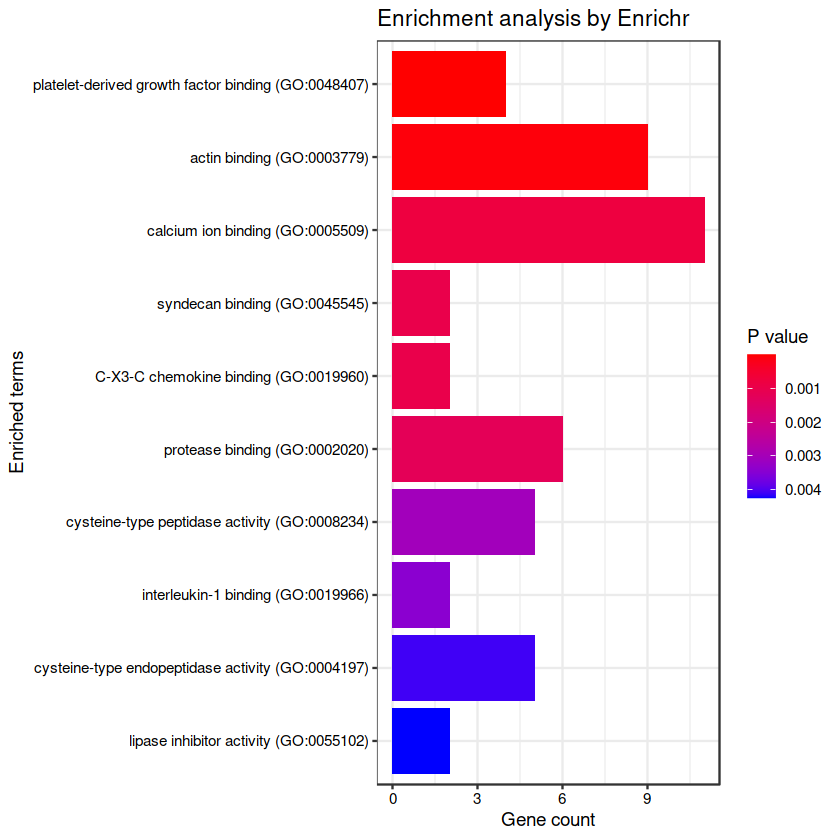

In [79]:
enriched <- enrichr(rownames(markers[["TRUE"]]), gene_lists)
plotEnrich(enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")

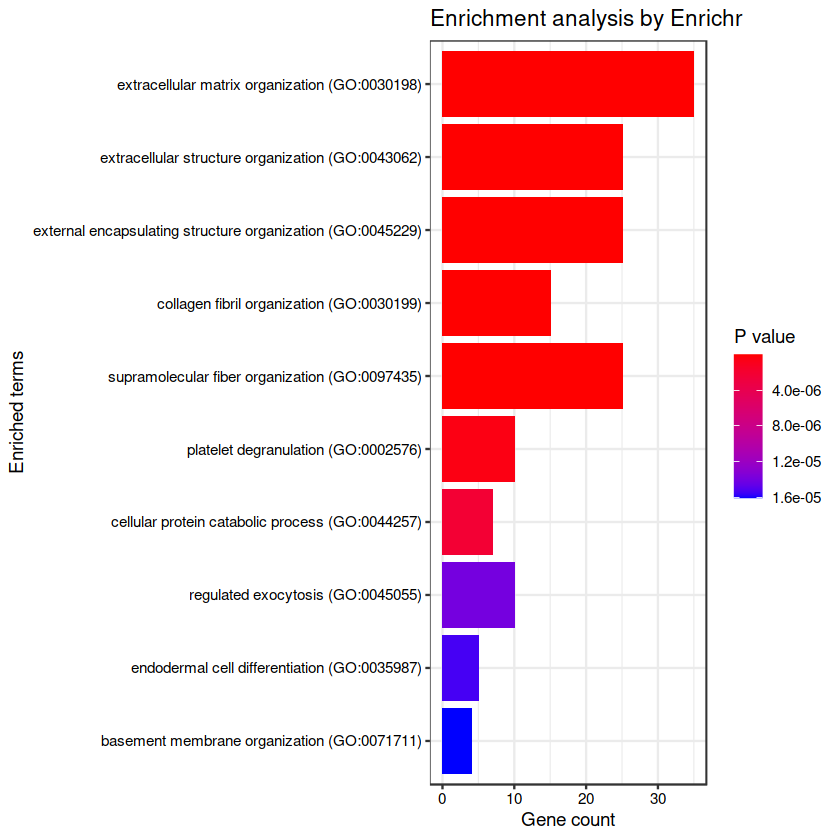

In [82]:
plotEnrich(enriched[[2]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")

In [ ]:
enriched <- enrichr(rownames(markers[["FALSE"]]), gene_lists)
plotEnrich(enriched[[1]], showTerms = 10, numChar = 60, y = "Count", 
                     orderBy = "P.value")

In [437]:
rownames(m_data) <- m_genes$gene_name

In [440]:
m_data

class: SingleCellExperiment 
dim: 23972 430339 
metadata(0):
assays(2): counts logcounts
rownames(23972): Cnnm3 Lman2l ... Cc2d2b Olfr1432
rowData names(0):
colnames(430339): cell_1 cell_2 ... ext_cell_351871 ext_cell_351872
colData names(1): celltype
reducedDimNames(0):
altExpNames(0):

In [441]:
m_genes[m_genes$gene_name == "Nes",]

ensembl_id         gene_name
Nes ENSMUSG00000004891 Nes

In [442]:
plotReducedDim(m_data, "UMAP", colour_by="Nes")

ERROR: Error in value[[3L]](cond): invalid subscript 'type' in 'reducedDim(<SingleCellExperiment>, type="character", ...)':
  'UMAP' not in 'reducedDimNames(<SingleCellExperiment>)'


## Explore trophoblast cell types

In [255]:
head(colData(r_data))

DataFrame with 6 rows and 14 columns
              cell          barcode    sample       stage     batch
       <character>      <character> <integer> <character> <integer>
cell_1      cell_1 AAACCCAAGCCTTCTC         1         GD7         1
cell_2      cell_2 AAACCCACACAATGAA         1         GD7         1
cell_4      cell_4 AAACCCAGTAGGTTTC         1         GD7         1
cell_5      cell_5 AAACCCATCTGGACTA         1         GD7         1
cell_6      cell_6 AAACGAAAGGTGAGAA         1         GD7         1
cell_9      cell_9 AAACGCTAGATGTAGT         1         GD7         1
       doub.density   doublet  stripped   cluster cluster.sub cluster.stage
          <numeric> <logical> <logical> <integer>   <numeric>     <numeric>
cell_1      6.36720     FALSE     FALSE         7           1             8
cell_2      0.00000     FALSE     FALSE        14           1            13
cell_4     43.04933     FALSE     FALSE         7           3             3
cell_5      8.40279     FALSE     FALSE

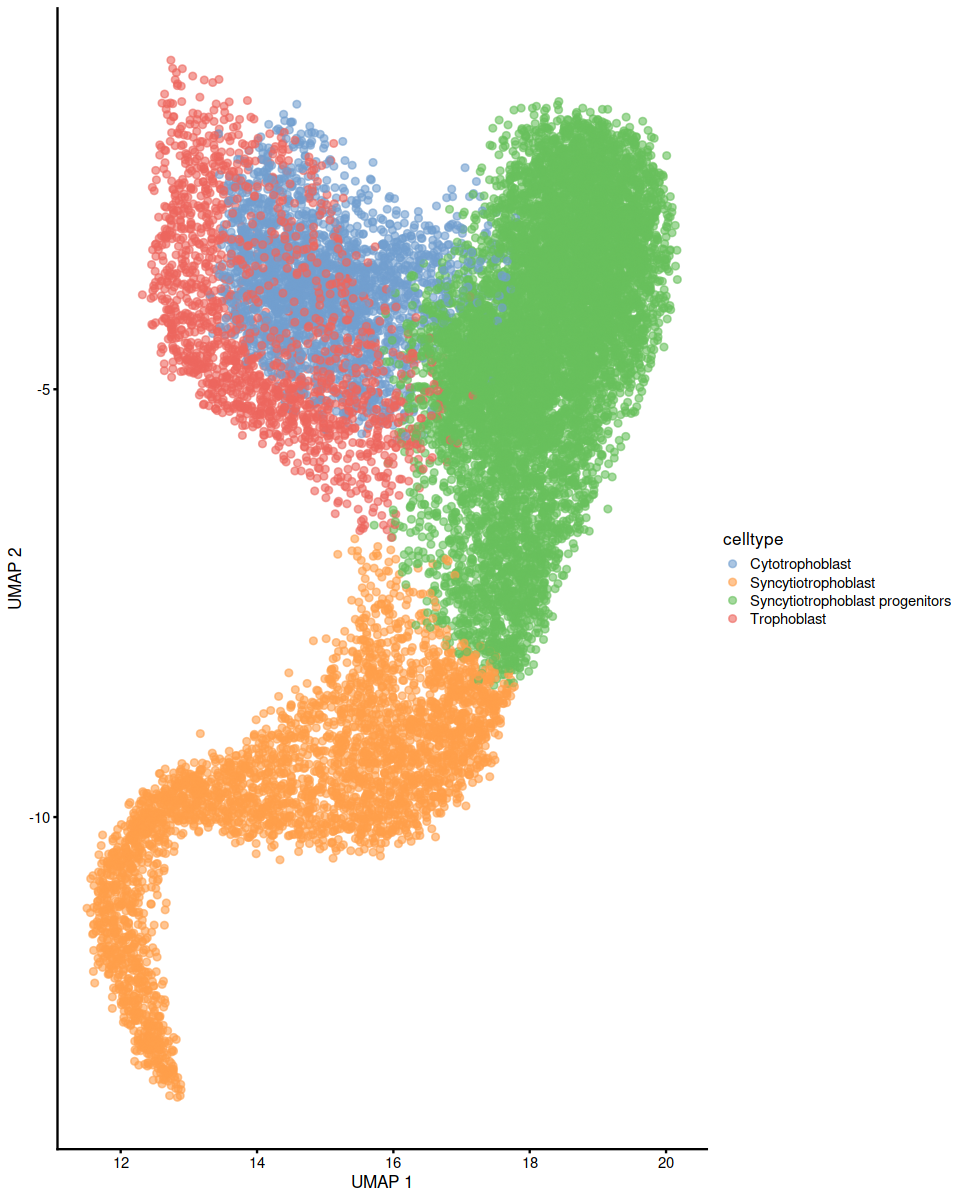

In [256]:
#temp
r_troph <- r_data[,r_data$celltype %in% c("Syncytiotrophoblast","Syncytiotrophoblast progenitors","Trophoblast", "Cytotrophoblast",)]
plotReducedDim(r_troph,"UMAP", colour_by="celltype")

In [478]:
r_troph.markers <- scran::findMarkers(r_troph, groups=r_troph$celltype, pval.type="all",direction="up")

In [485]:
enrichr_dbs = c("GO_Molecular_Function_2021","GO_Biological_Process_2021","MSigDB_Hallmark_2020",
                "Transcription_Factor_PPIs","WikiPathway_2021_Human","WikiPathways_2019_Mouse")
troph.de <- r_troph.markers$Cytotrophoblast
enriched <- enrichr(rownames(troph.de[(troph.de$FDR < 0.01),]), enrichr_dbs)

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Transcription_Factor_PPIs... Done.
  Querying WikiPathway_2021_Human... Done.
  Querying WikiPathways_2019_Mouse... Done.
Parsing results... Done.


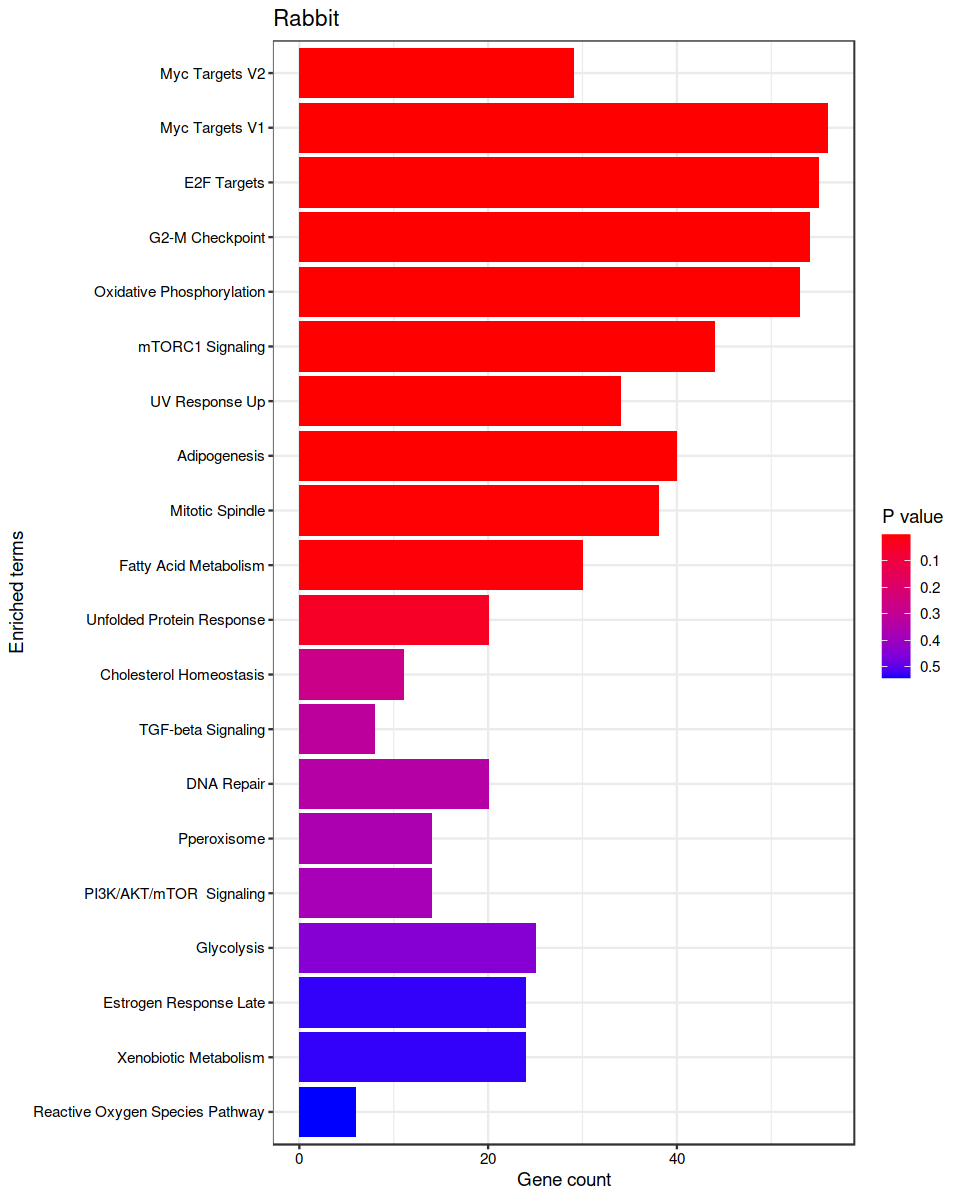

In [486]:
plotEnrich(enriched[[3]], showTerms = 20, numChar = 60, y = "Count", 
                     orderBy = "P.value",title="Rabbit")

In [412]:
head(enriched[[3]],8)

Term                      Overlap P.value      Adjusted.P.value Old.P.value
1 Protein Secretion         40/96   9.559871e-12 4.779935e-10     0          
2 Unfolded Protein Response 38/113  3.895651e-08 9.739128e-07     0          
3 heme Metabolism           50/200  9.086021e-06 1.514337e-04     0          
4 Mitotic Spindle           49/199  1.720392e-05 2.150490e-04     0          
5 mTORC1 Signaling          48/200  4.220346e-05 4.220346e-04     0          
6 Hypoxia                   42/200  2.233951e-03 1.861626e-02     0          
7 G2-M Checkpoint           41/200  3.933012e-03 2.809294e-02     0          
8 Apoptosis                 32/161  1.547336e-02 9.670849e-02     0          
  Old.Adjusted.P.value Odds.Ratio Combined.Score
1 0                    4.620477   117.237430    
2 0                    3.271391    55.812614    
3 0                    2.152542    24.988377    
4 0                    2.108697    23.133196    
5 0                    2.037478    20.523533    
6 0                    1.710629    10.441651    
7 0                    1.658678     9.186336    
8 0                    1.593054     6.640860    
  Genes                                                                                                                                                                                                                                                                                                               
1 NAPA;COPB2;TMED10;TSG101;COPB1;VPS4B;CLTC;USO1;CLCN3;RAB22A;LMAN1;SNX2;AP1G1;LAMP2;TMED2;ATP6V1H;ARFIP1;ATP7A;DNM1L;AP2M1;TPD52;MON2;BNIP3;STX7;GBF1;AP3B1;AP2B1;STAM;SOD1;GALC;RER1;RAB14;ZW10;DOP1A;YIPF6;VAMP4;SEC24D;RAB5A;ATP6V1B1;BET1                                                                        
2 ERO1A;SHC1;POP4;CEBPG;PARN;CXXC1;HSP90B1;HERPUD1;CKS1B;SERP1;BAG3;KIF5B;EXOSC9;EIF4EBP1;DNAJB9;EIF4E;SEC11A;TSPYL2;ZBTB17;TTC37;HSPA5;NFYA;EDEM1;PDIA6;YWHAZ;DNAJC3;CNOT6;SPCS1;CNOT2;HYOU1;KDELR3;ATP6V0D1;DCP1A;ATF6;TARS1;ATF3;DCP2;EIF4G1                                                                       
3 BACH1;HEBP1;CCND3;CA2;CDC27;LAMP2;CIR1;BTRC;RBM5;CTSB;CAST;HBZ;BNIP3L;GLRX5;NCOA4;SLC30A1;GAPVD1;DAAM1;TFDP2;ATG4A;TOP1;OPTN;SIDT2;USP15;EPB42;MGST3;HTRA2;FOXO3;PPOX;CLCN3;TRAK2;SPTA1;SDCBP;MARCHF8;E2F2;AHSP;DCAF11;SNCA;RIOK3;EIF2AK1;SLC10A3;CTNS;FBXO34;EPOR;SYNJ1;YPEL5;GCLM;LRP10;NFE2L1;PICALM             
4 CEP57;YWHAE;NUMA1;WASL;ARHGAP5;SMC4;PCM1;PPP4R2;CAPZB;KIF5B;CDC27;NCK2;NEK2;SPTAN1;DLGAP5;RALBP1;CSNK1D;DYNLL2;CLIP1;CTTN;BIN1;ARHGEF3;CDC42EP2;CDC42EP1;ATG4B;MAPRE1;ARF6;PAFAH1B1;STAU1;TUBGCP2;TTK;HDAC6;ABR;FGD4;CCNB2;RACGAP1;STK38L;FLNB;GSN;RANBP9;ARHGAP29;ARHGAP27;SSH2;NET1;MYO1E;ABI1;SASS6;CDK1;RAB3GAP1
5 ERO1A;GSK3B;RAB1A;PSMD12;TES;PSMD14;PITPNB;RPN1;USO1;UBE2D3;ARPC5L;ATP2A2;CORO1A;ADIPOR2;HSP90B1;GGA2;STIP1;SERP1;ME1;SLC37A4;ATP6V1D;SEC11A;NIBAN1;ACTR2;STARD4;TPI1;SDF2L1;RRM2;HSPA5;EDEM1;TXNRD1;IFRD1;IMMT;EIF2S2;PSMA3;RIT1;PSMA4;PSMC6;DDIT3;PSME3;CANX;PSMC2;NMT1;ETF1;NUPR1;SQSTM1;SKAP2;NFKBIB            
6 ERO1A;TES;BTG1;PFKFB3;ZNF292;FOXO3;NDRG1;ZFP36;FAM162A;GPC3;PIM1;HMOX1;ATP7A;SLC37A4;PPFIA4;ANKZF1;TPD52;BNIP3L;WSB1;TPI1;HSPA5;TIPARP;SIAH2;AMPD3;KLHL24;DCN;PNRC1;JMJD6;FOSL2;EXT1;ISG20;GRHPR;KLF6;NAGK;XPNPEP1;DDIT3;CCNG2;RRAGD;KDELR3;ATF3;CHST2;PFKP                                                         
7 NUMA1;YTHDC1;SUV39H1;TTK;CTCF;HMMR;SMC4;SLC7A1;AURKB;CKS1B;CCNB2;RPS6KA5;ORC6;RACGAP1;RAD21;KIF5B;CDC27;MAP3K20;E2F2;NEK2;E2F3;SRSF10;CASP8AP2;TLE3;SMARCC1;STIL;DR1;CDKN2C;UBE2C;CDC6;TRAIP;UCK2;SFPQ;CDK4;NUP50;MTF2;HNRNPD;CDK1;NUP98;TOP1;PAFAH1B1                                                              
8 SLC20A1;XIAP;PSEN1;LGALS3;PAK1;PEA15;LMNA;ERBB2;HMOX1;TIMP1;DNM1L;SPTAN1;MCL1;BCAP31;BNIP3L;ANXA1;GSN;GADD45A;LUM;PTK2;DCN;SOD1;ISG20;DNAJC3;CYLD;WEE1;DDIT3;CDK2;PDCD4;ETF1;SQSTM1;ATF3

In [488]:
head(troph.de[,1:3],10)

DataFrame with 10 rows and 3 columns
                        p.value          FDR summary.logFC
                      <numeric>    <numeric>     <numeric>
ENSOCUG00000011117 5.95153e-246 1.82861e-241      0.655665
ENSOCUG00000034585 1.04452e-229 1.60464e-225      1.171170
NUDC               1.68755e-207 1.72833e-203      0.913625
ENSOCUG00000013123 2.43204e-166 1.86811e-162      0.789268
ENSOCUG00000022009 1.13959e-151 7.00276e-148      1.088838
ENSOCUG00000021755 6.94065e-140 3.09255e-136      0.469122
ENSOCUG00000022961 7.04567e-140 3.09255e-136      0.520024
KLNB1              8.17156e-138 3.13839e-134      1.393122
ENSOCUG00000013846 7.41651e-137 2.53191e-133      1.377224
ENSOCUG00000017674 3.05989e-136 9.40151e-133      0.607054

In [487]:
troph.de["ENSOCUG00000029640",]

DataFrame with 1 row and 6 columns
                      p.value        FDR summary.logFC
                    <numeric>  <numeric>     <numeric>
ENSOCUG00000029640 0.00022473 0.00314285     0.0516724
                   logFC.Syncytiotrophoblast
                                   <numeric>
ENSOCUG00000029640                  0.224342
                   logFC.Syncytiotrophoblast progenitors logFC.Trophoblast
                                               <numeric>         <numeric>
ENSOCUG00000029640                              0.225618         0.0516724

In [82]:
zeb.sce <- readRDS("../../data/Raj_2020/sce_temp.rds")

ERROR: Error in readRDS("../../data/Raj_2020/sce_temp.rds"): unknown input format
